# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# link to dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.drop(columns=['id'], inplace=True)

In [4]:
df.shape

(5110, 11)

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# drop all null values
df = df.dropna().reset_index(drop=True)
df.shape

(4909, 11)

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# define variables
numeric = ['age', 'avg_glucose_level', 'bmi']
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
target = ['stroke']

In [9]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4909.000000   4909.000000    4909.000000        4909.000000   
mean     42.865374      0.091872       0.049501         105.305150   
std      22.555115      0.288875       0.216934          44.424341   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.070000   
50%      44.000000      0.000000       0.000000          91.680000   
75%      60.000000      0.000000       0.000000         113.570000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  4909.000000  
mean     28.893237     0.042575  
std       7.854067     0.201917  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [10]:
df.gender.value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [11]:
df.hypertension.value_counts()

hypertension
0    4458
1     451
Name: count, dtype: int64

In [12]:
df.heart_disease.value_counts()

heart_disease
0    4666
1     243
Name: count, dtype: int64

In [13]:
df.ever_married.value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [14]:
df.work_type.value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [15]:
df.Residence_type.value_counts()

Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

In [16]:
df.smoking_status.value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [17]:
df.stroke.value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

# Univariate Analysis

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\2557414240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=df, palette="Set2")
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\2557414240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=df, palette="Set2")
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\2557414240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=df, palette="Set2")


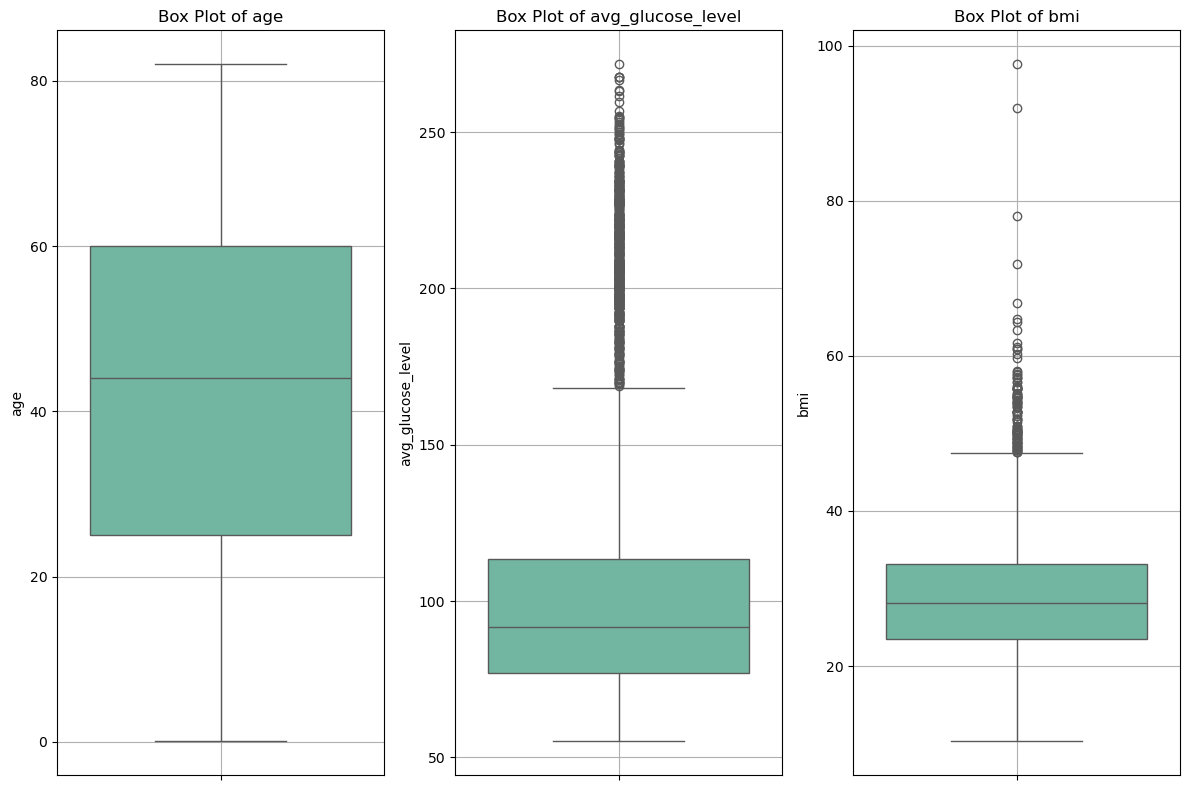

In [18]:
# Box plot for numeric variables

plt.figure(figsize=(12, 8))

for i, var in enumerate(numeric, 1):
    plt.subplot(1, len(numeric), i)
    sns.boxplot(y=var, data=df, palette="Set2")
    plt.title(f"Box Plot of {var}")
    plt.grid()
    
plt.tight_layout()
plt.show()

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\3018056871.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="coolwarm", edgecolor='royalblue')
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\3018056871.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="coolwarm", edgecolor='royalblue')
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\3018056871.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="coolwarm", edgecolor='royalblue')
C:\Users\anhph\AppData\Local

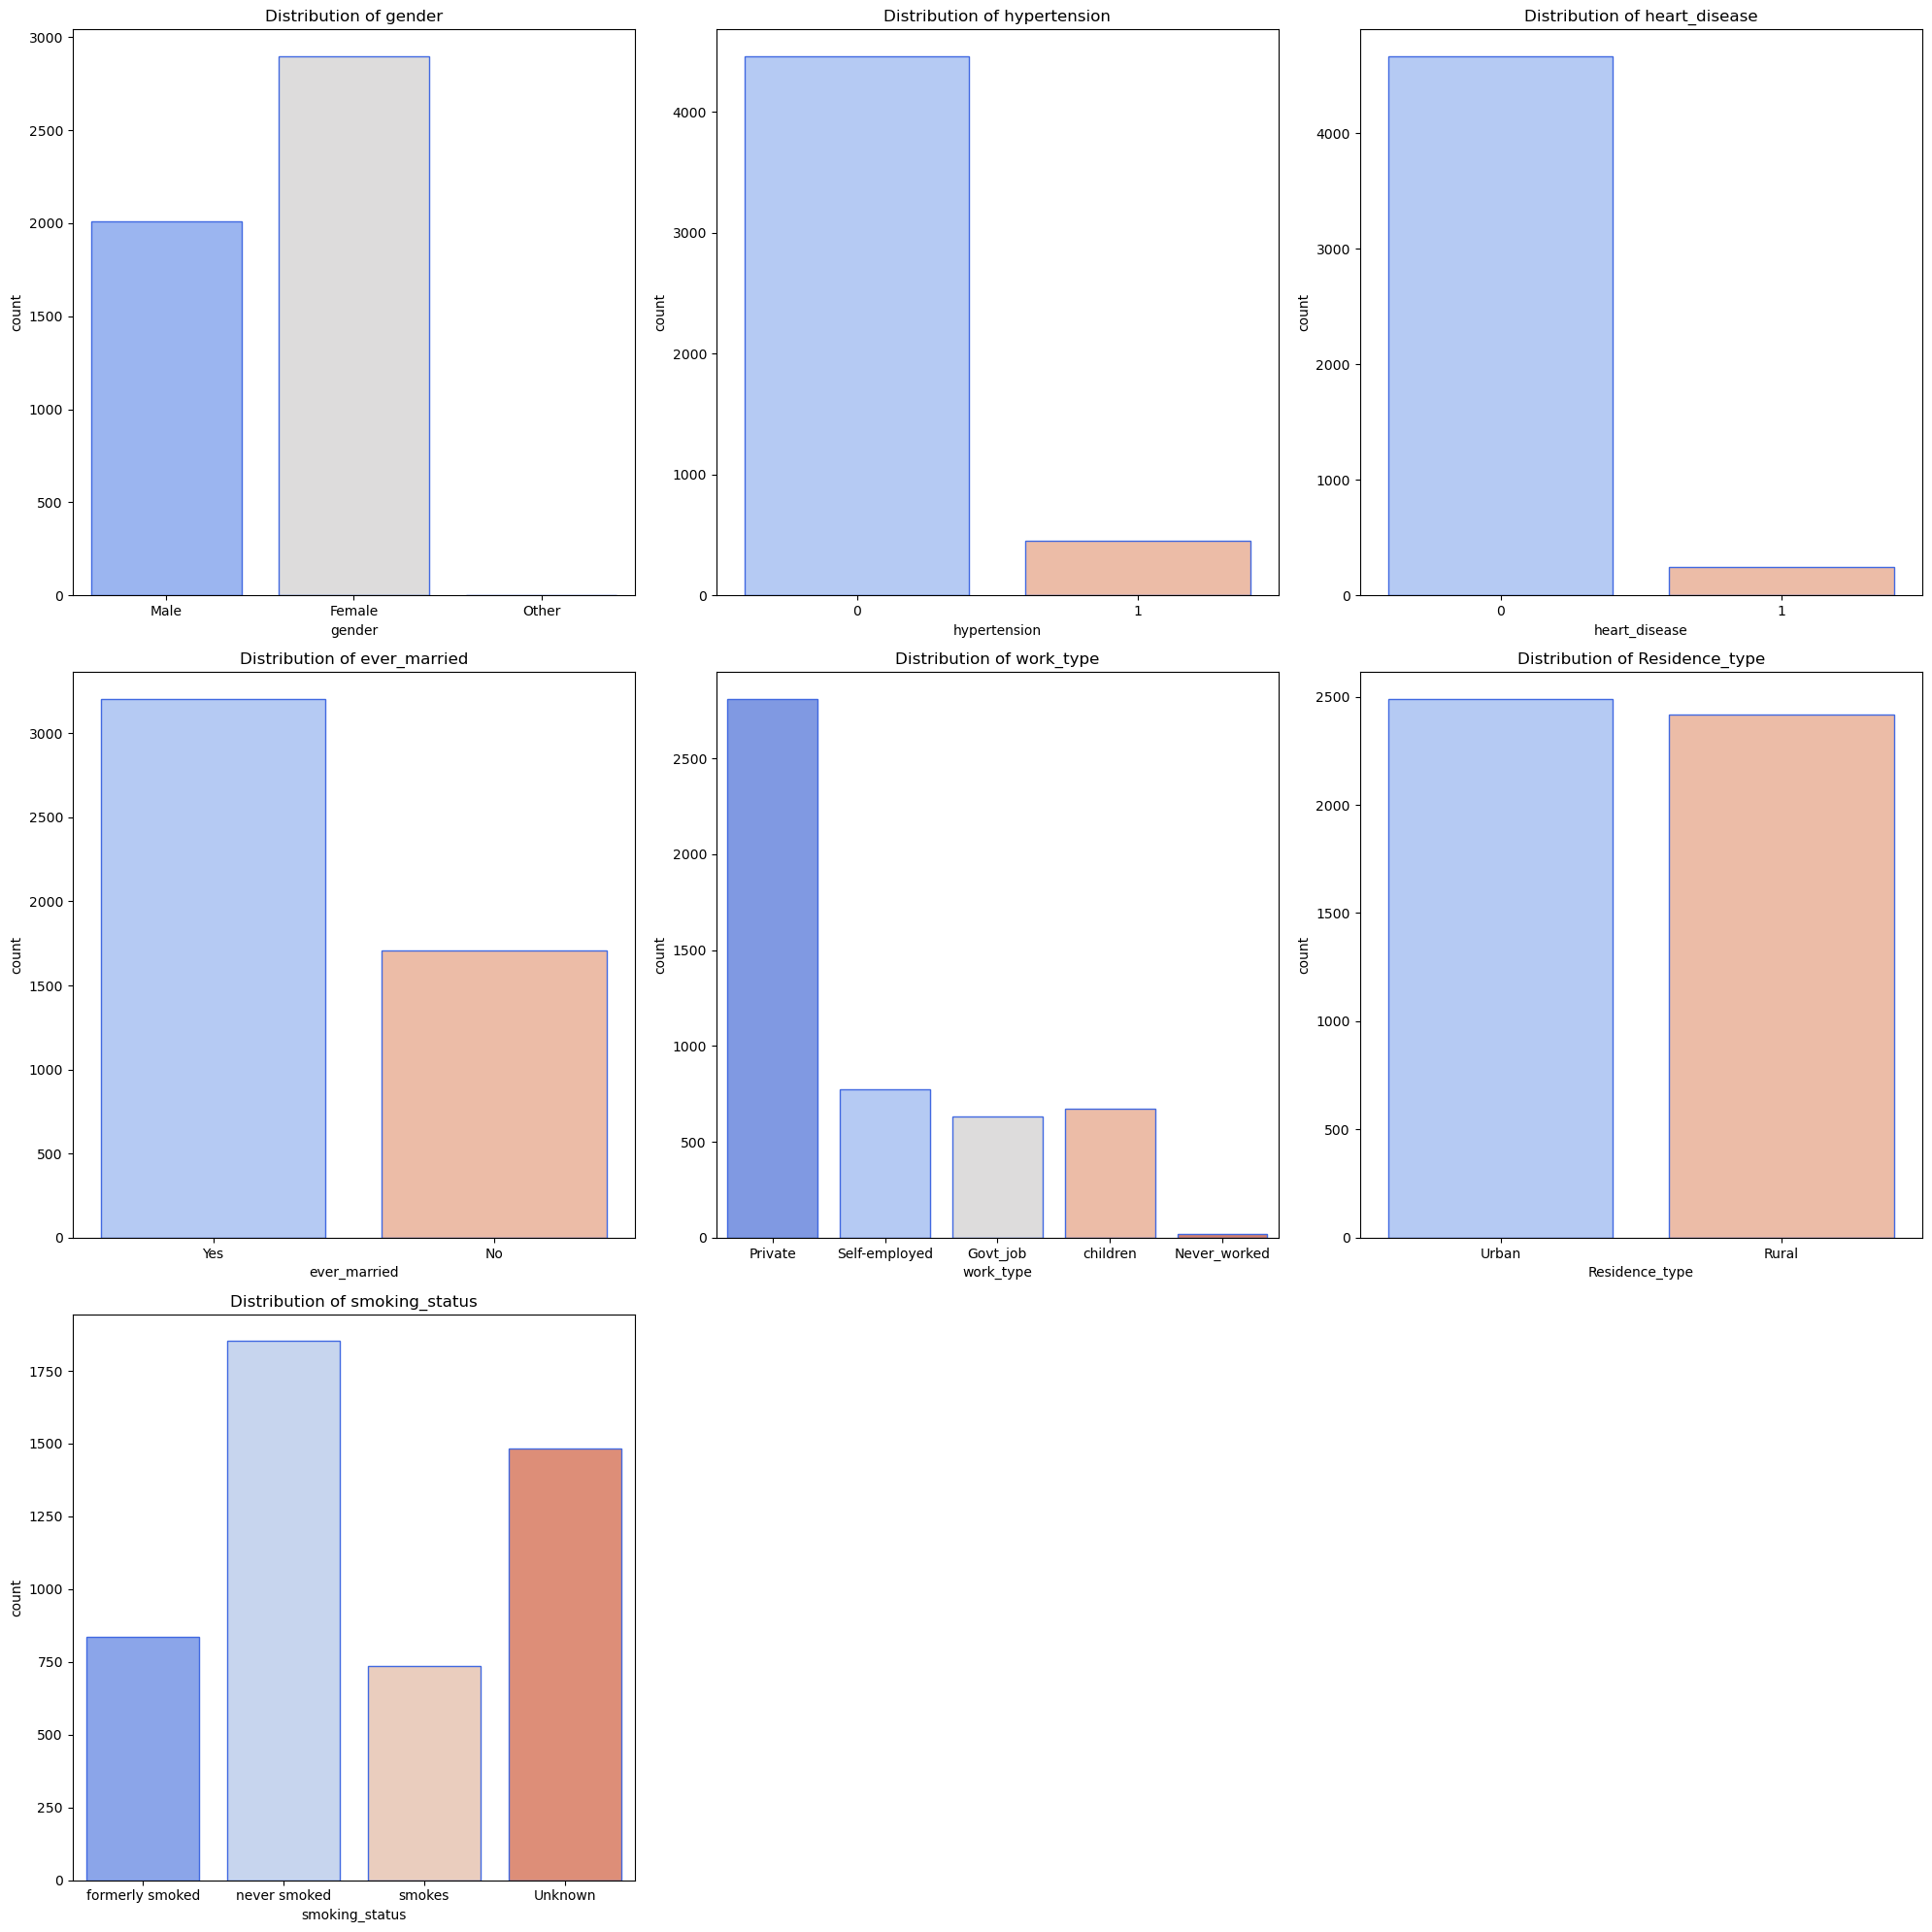

In [19]:
# Distribution plot for categorical variables\

plt.figure(figsize=(20, 20))

for i, var in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette="coolwarm", edgecolor='royalblue')
    plt.title(f"Distribution of {var}")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\298177793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stroke', data=df, palette=custom_palette,
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\298177793.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No", "Yes"], fontsize=16)


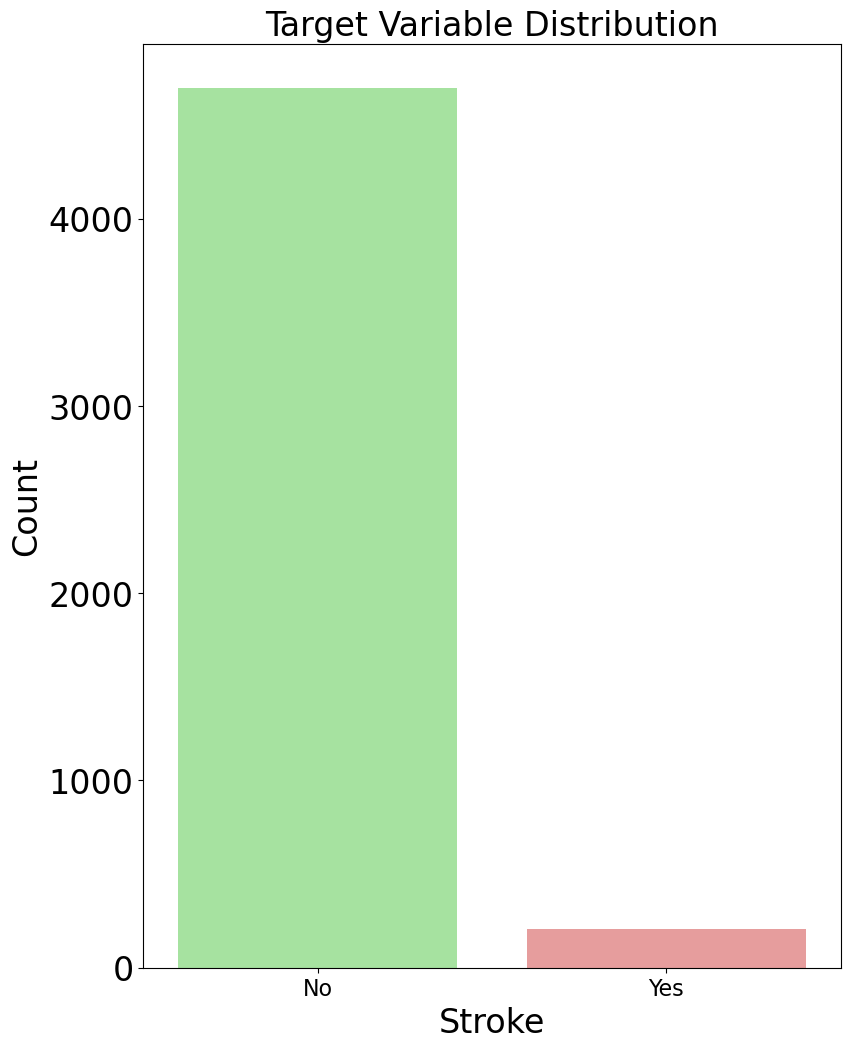

In [20]:
# Define custom colors for "No Stroke" and "Stroke"
custom_palette = {'0': "#9ded95", '1': "#f29191"}  # Green for No Stroke, Pink for Stroke

plt.figure(figsize=(9, 12))

# Create countplot with custom colors and labeled x-axis
ax = sns.countplot(x='stroke', data=df, palette=custom_palette, 
                #    edgecolor='royalblue'
                   )

# Set title and labels with increased font size
plt.title('Target Variable Distribution', fontsize=24)
plt.xlabel('Stroke', fontsize=24)
plt.ylabel('Count', fontsize=24)

# Set x-axis labels to "No" and "Yes"
ax.set_xticklabels(["No", "Yes"], fontsize=16)

# Adjust tick label font sizes
plt.yticks(fontsize=24)

plt.show()


In [21]:
df.stroke.value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

# Bivariate Analysis

## Correlation

Correlations with the target variable:
            Variable  Correlation
0                age     0.232331
1  avg_glucose_level     0.138936
2                bmi     0.042374


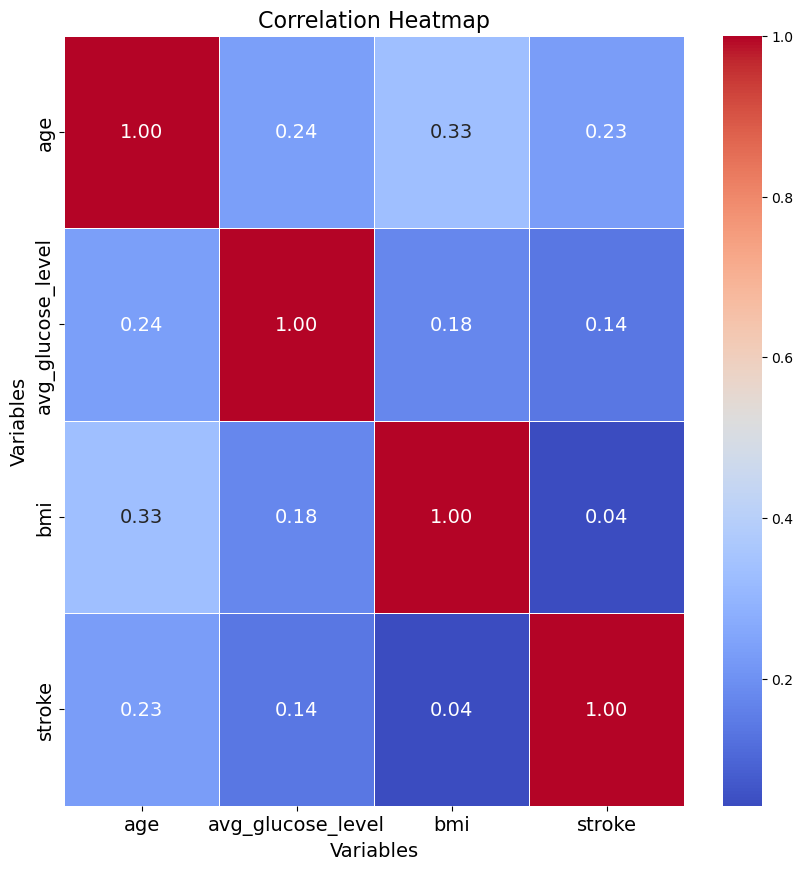

In [22]:
# Compute correlations
correlation_df = df[numeric + target].corr()

# Extract correlations of numeric variables with the target
target_correlations = correlation_df[target].drop(target).reset_index()
target_correlations.columns = ['Variable', 'Correlation']
print("Correlations with the target variable:")
print(target_correlations)

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 14})
plt.title("Correlation Heatmap", fontsize=16)

# Increase font size for axis labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Variables", fontsize=14)

# Adjust font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

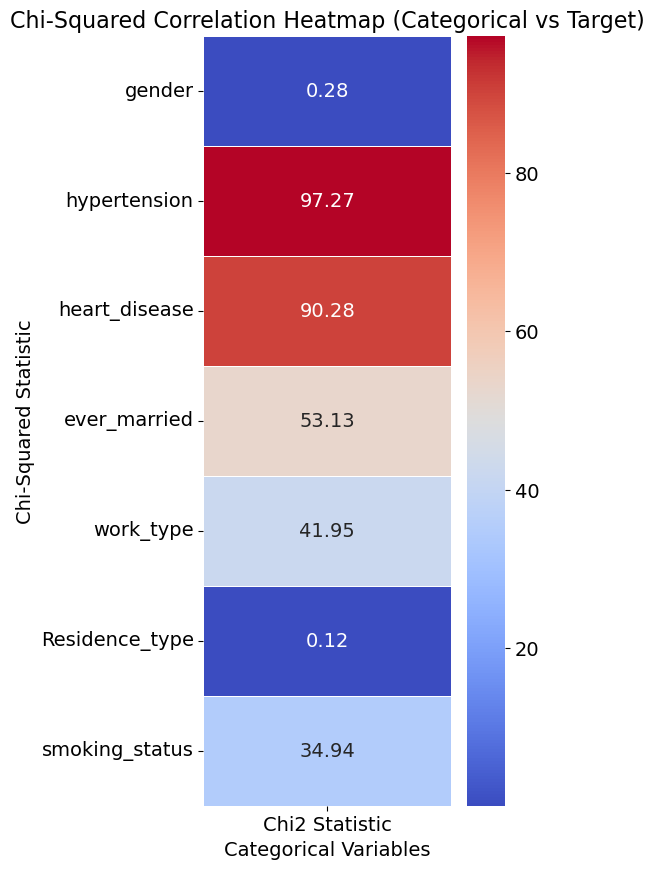

In [23]:
from scipy.stats import chi2_contingency

target = 'stroke'

# Function to calculate the chi-squared test between each categorical variable and target
def chi2_corr(df, categorical, target):
    chi2_values = {}
    p_values = {}
    
    for var in categorical:
        # Create contingency table
        contingency = pd.crosstab(df[var], df[target])
        
        # Perform Chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency)
        
        # Store the results
        chi2_values[var] = chi2
        p_values[var] = p
    
    return pd.DataFrame({'Chi2 Statistic': chi2_values, 'P-Value': p_values})

# Compute chi-squared test results
chi2_results = chi2_corr(df, categorical, target)

# Plot vertical heatmap for Chi-squared statistics
plt.figure(figsize=(4, 10))
sns.heatmap(chi2_results[['Chi2 Statistic']], annot=True, cmap='coolwarm', fmt=".2f", 
            cbar=True, linewidths=0.5, cbar_kws={'label': 'Chi-Squared Statistic'},
            annot_kws={"size": 14})

# Increase font size for labels
plt.title("Chi-Squared Correlation Heatmap (Categorical vs Target)", fontsize=16)
plt.xlabel("Categorical Variables", fontsize=14)
plt.ylabel("Chi-Squared Statistic", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=    0)

# Increase font size of the colorbar ticks
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label('')  # Remove the label
# cbar.set_label('Chi-Squared Statistic', fontsize=16)  # Increase the font size of the label

plt.show()


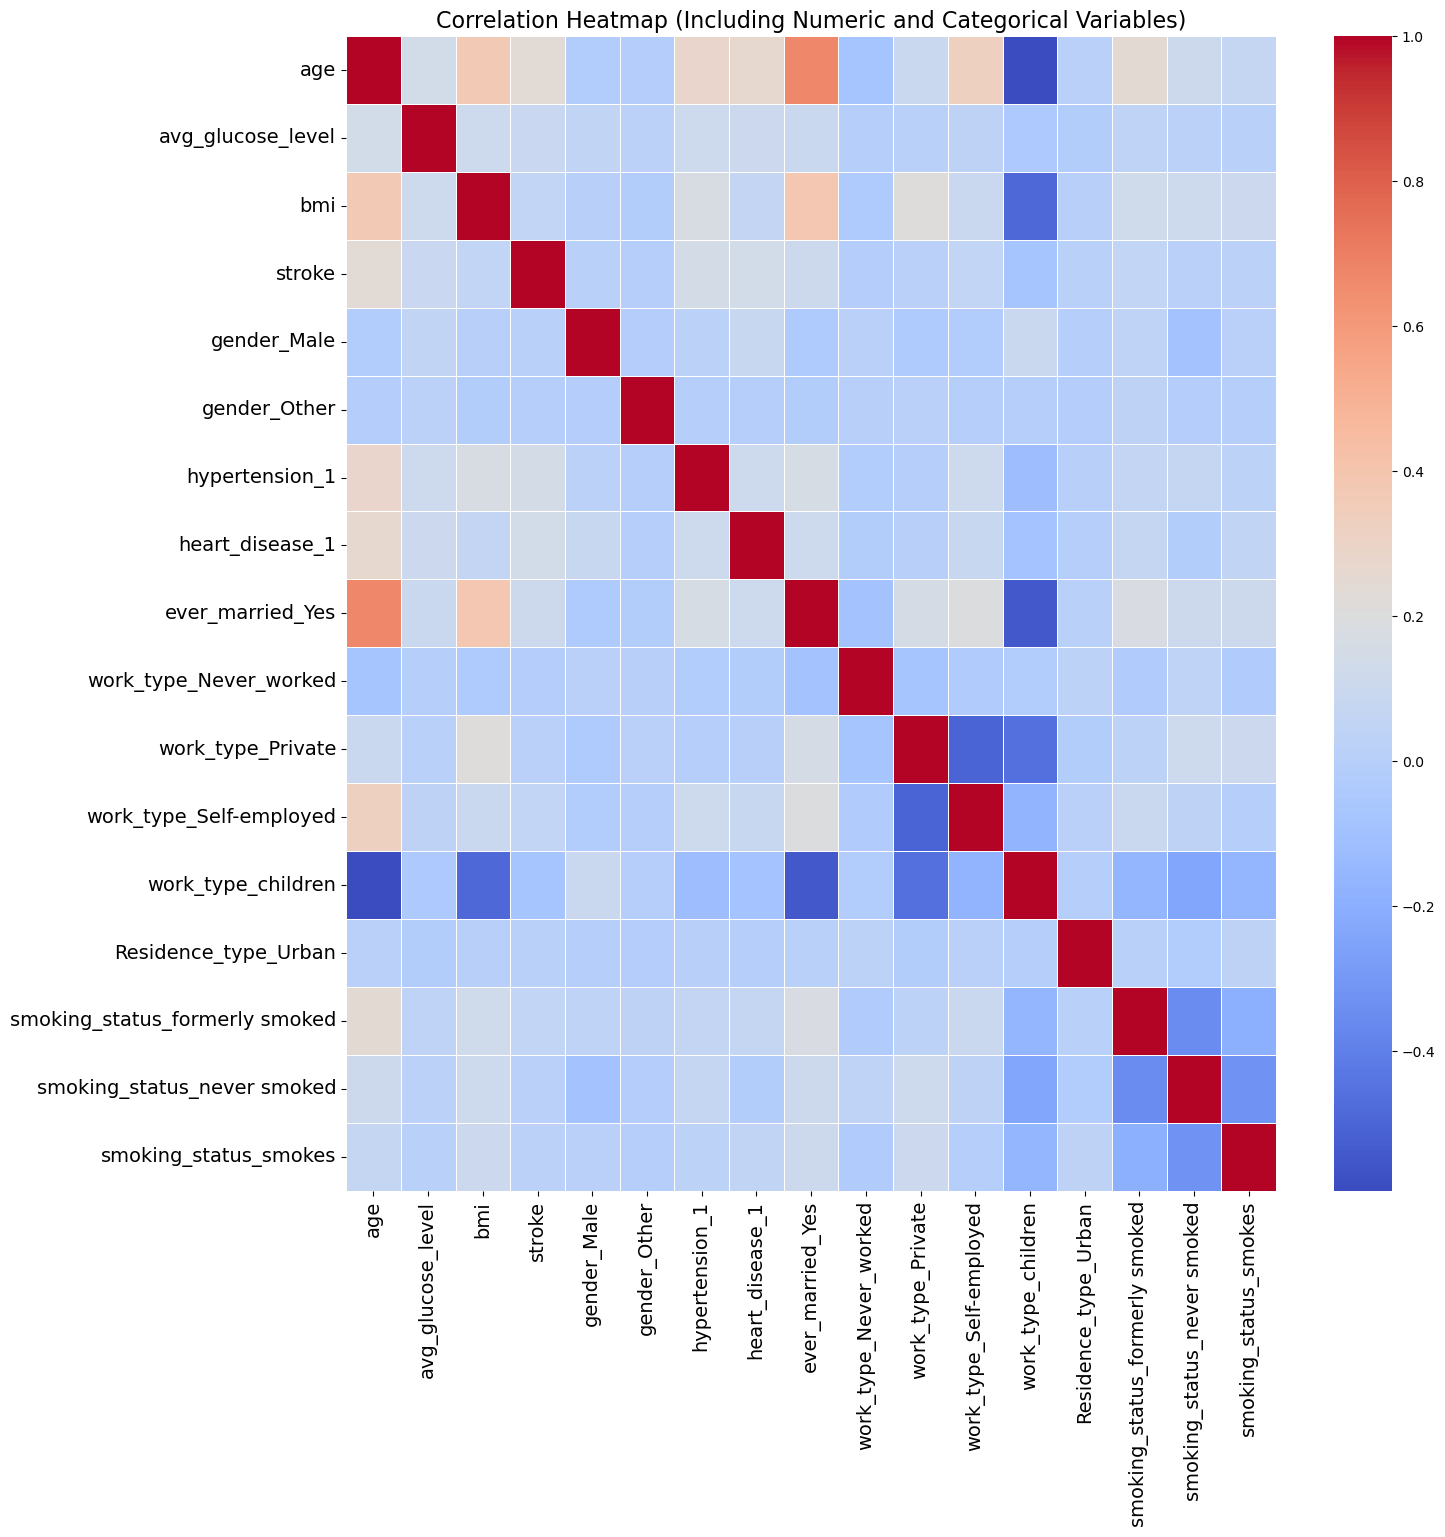

In [24]:
# Convert categorical variables into numerical representations using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

# Compute correlation matrix using Spearman correlation (better for categorical data)
correlation_matrix = df_encoded.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (Including Numeric and Categorical Variables)", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()


In [25]:
correlation_matrix[correlation_matrix>0.2]

age  avg_glucose_level       bmi  \
age                             1.000000                NaN  0.375650   
avg_glucose_level                    NaN                1.0       NaN   
bmi                             0.375650                NaN  1.000000   
stroke                          0.235070                NaN       NaN   
gender_Male                          NaN                NaN       NaN   
gender_Other                         NaN                NaN       NaN   
hypertension_1                  0.278756                NaN       NaN   
heart_disease_1                 0.261728                NaN       NaN   
ever_married_Yes                0.668354                NaN  0.385833   
work_type_Never_worked               NaN                NaN       NaN   
work_type_Private                    NaN                NaN  0.213132   
work_type_Self-employed         0.327143                NaN       NaN   
work_type_children                   NaN                NaN       NaN   
Residence_type_Urban                 NaN                NaN       NaN   
smoking_status_formerly smoked  0.242998                NaN       NaN   
smoking_status_never smoked          NaN                NaN       NaN   
smoking_status_smokes                NaN                NaN       NaN   

                                 stroke  gender_Male  gender_Other  \
age                             0.23507          NaN           NaN   
avg_glucose_level                   NaN          NaN           NaN   
bmi                                 NaN          NaN           NaN   
stroke                          1.00000          NaN           NaN   
gender_Male                         NaN          1.0           NaN   
gender_Other                        NaN          NaN           1.0   
hypertension_1                      NaN          NaN           NaN   
heart_disease_1                     NaN          NaN           NaN   
ever_married_Yes                    NaN          NaN           NaN   
work_type_Never_worked              NaN          NaN           NaN   
work_type_Private                   NaN          NaN           NaN   
work_type_Self-employed             NaN          NaN           NaN   
work_type_children                  NaN          NaN           NaN   
Residence_type_Urban                NaN          NaN           NaN   
smoking_status_formerly smoked      NaN          NaN           NaN   
smoking_status_never smoked         NaN          NaN           NaN   
smoking_status_smokes               NaN          NaN           NaN   

                                hypertension_1  heart_disease_1  \
age                                   0.278756         0.261728   
avg_glucose_level                          NaN              NaN   
bmi                                        NaN              NaN   
stroke                                     NaN              NaN   
gender_Male                                NaN              NaN   
gender_Other                               NaN              NaN   
hypertension_1                        1.000000              NaN   
heart_disease_1                            NaN         1.000000   
ever_married_Yes                           NaN              NaN   
work_type_Never_worked                     NaN              NaN   
work_type_Private                          NaN              NaN   
work_type_Self-employed                    NaN              NaN   
work_type_children                         NaN              NaN   
Residence_type_Urban                       NaN              NaN   
smoking_status_formerly smoked             NaN              NaN   
smoking_status_never smoked                NaN              NaN   
smoking_status_smokes                      NaN              NaN   

                                ever_married_Yes  work_type_Never_worked  \
age                                     0.668354                     NaN   
avg_glucose_level                            NaN                     NaN   
bmi                       

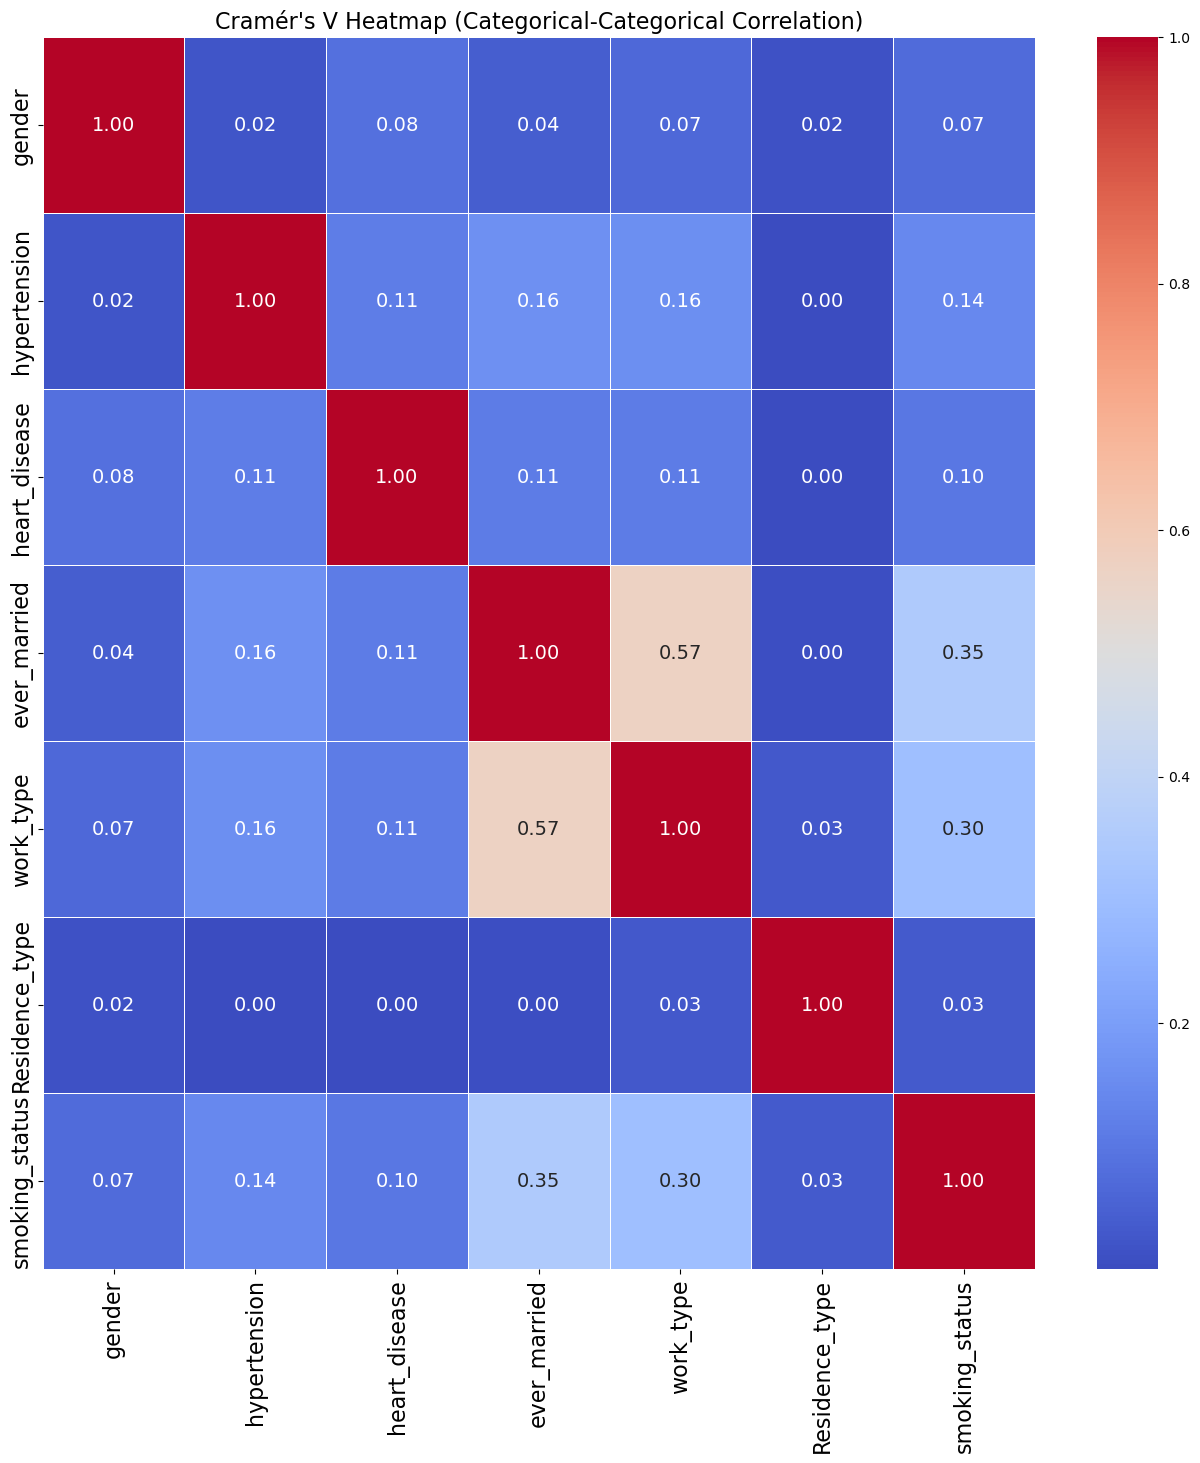

In [26]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér's V for all categorical variable pairs
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical), len(categorical))), 
                                index=categorical, columns=categorical)

for col1 in categorical:
    for col2 in categorical:
        if col1 != col2:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)
        else:
            cramers_v_matrix.loc[col1, col2] = 1  # Perfect correlation with itself

# Plot heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(cramers_v_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 14})

plt.title("Cramér's V Heatmap (Categorical-Categorical Correlation)", fontsize=16)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

In [27]:
cramers_v_matrix[cramers_v_matrix >= 0.2]

gender  hypertension  heart_disease  ever_married  work_type  \
gender             1.0           NaN            NaN           NaN        NaN   
hypertension       NaN           1.0            NaN           NaN        NaN   
heart_disease      NaN           NaN            1.0           NaN        NaN   
ever_married       NaN           NaN            NaN      1.000000   0.568546   
work_type          NaN           NaN            NaN      0.568546   1.000000   
Residence_type     NaN           NaN            NaN           NaN        NaN   
smoking_status     NaN           NaN            NaN      0.349370   0.303645   

                Residence_type  smoking_status  
gender                     NaN             NaN  
hypertension               NaN             NaN  
heart_disease              NaN             NaN  
ever_married               NaN        0.349370  
work_type                  NaN        0.303645  
Residence_type             1.0             NaN  
smoking_status             NaN        1.000000

## Variables Analysis based on Target

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1762248441.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No", "Yes"])  # Updating x-axis labels
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1762248441.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No", "Yes"])  # Updating x-axis labels
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1762248441.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No", "Yes"])  # Updating x-axis labels


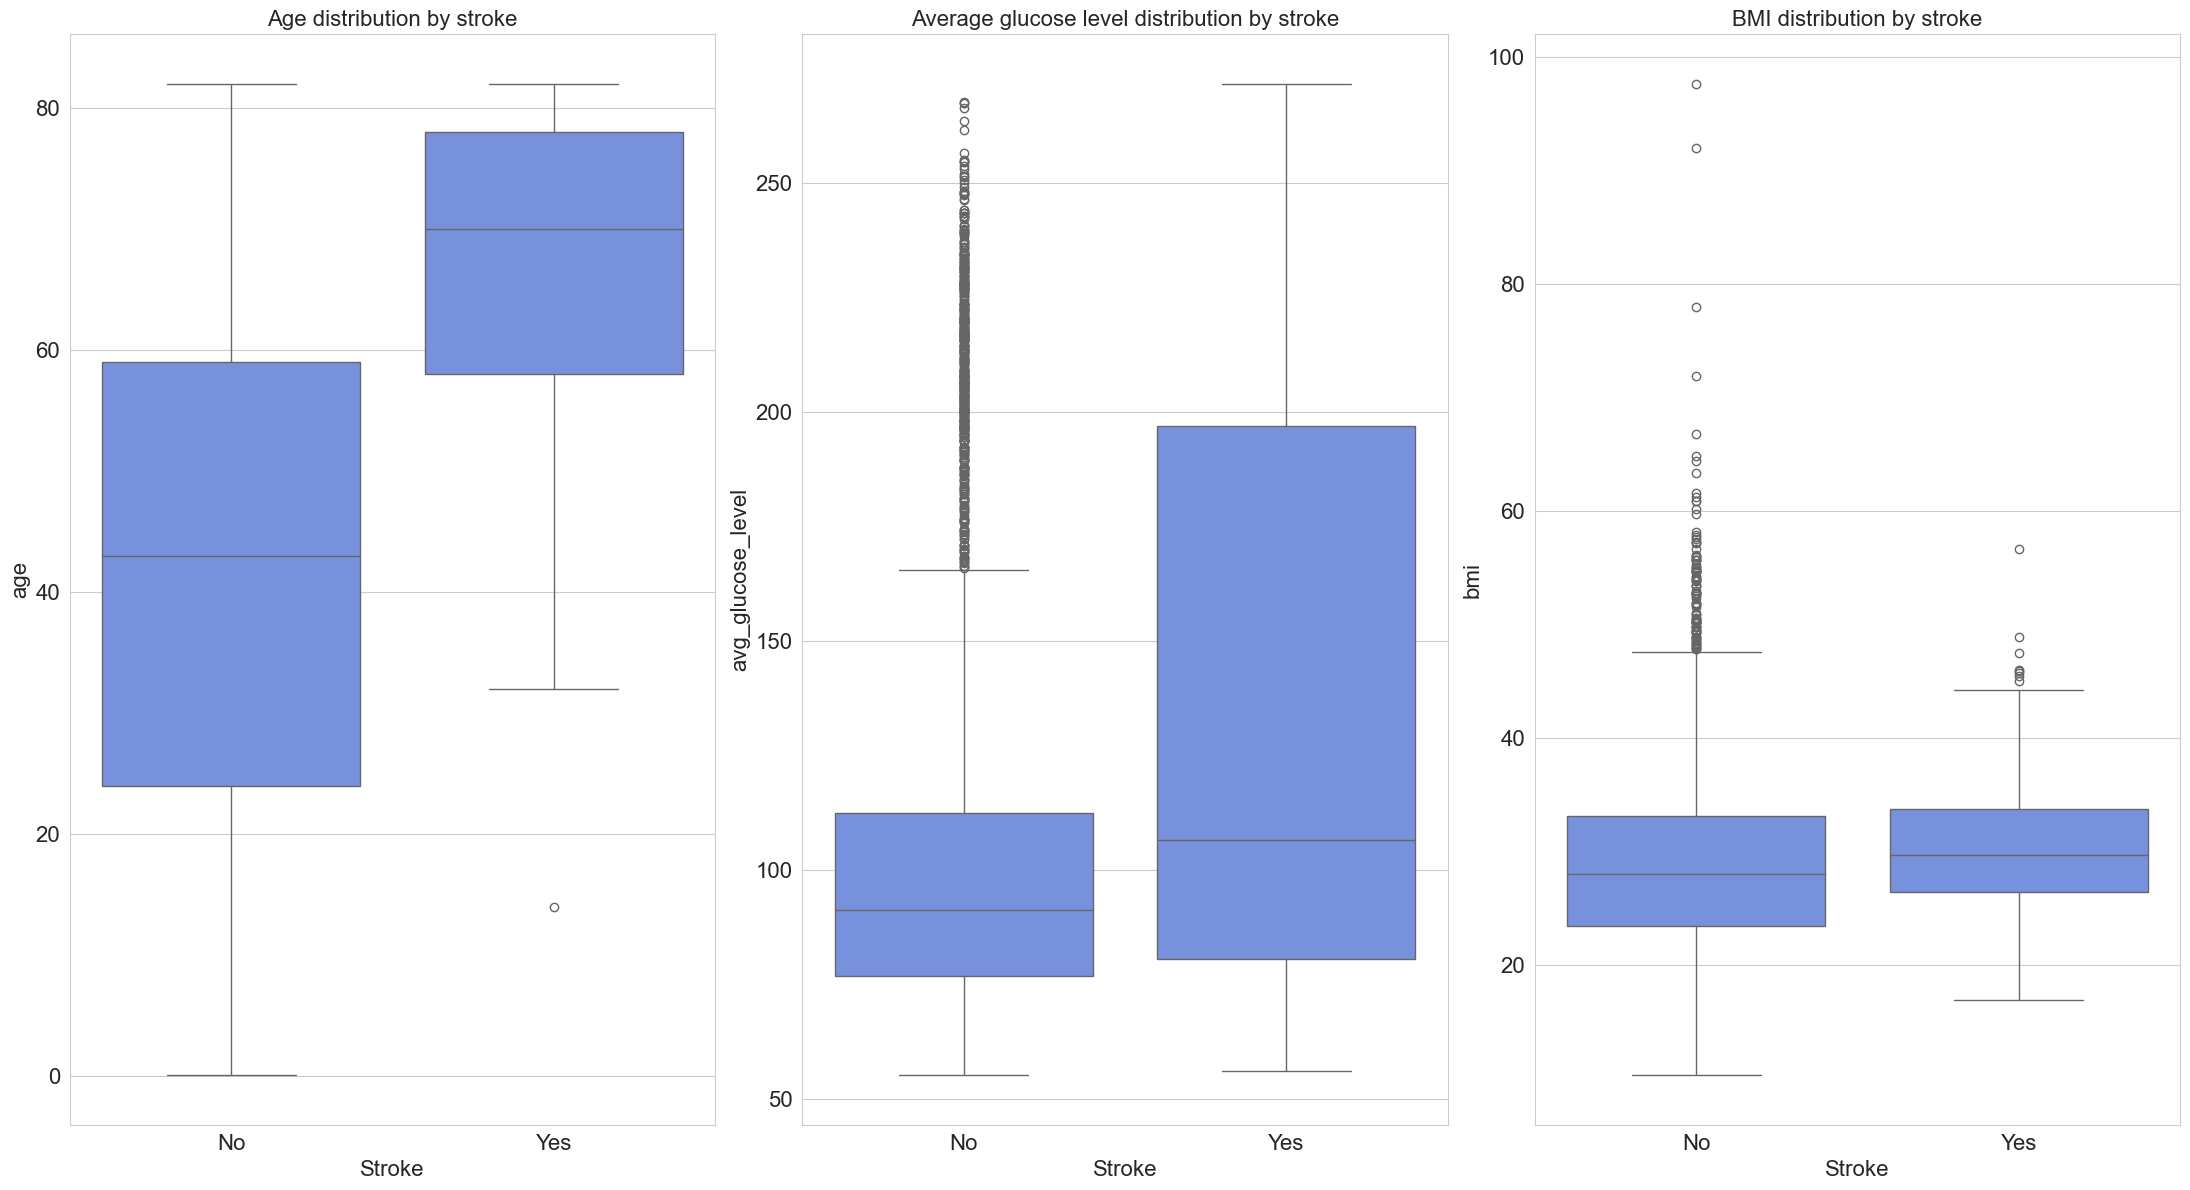

In [28]:
# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Define custom titles and x-axis labels
titles = ["Age distribution by stroke", 
          "Average glucose level distribution by stroke", 
          "BMI distribution by stroke"]
x_labels = {0: "No", 1: "Yes"}

# Boxplots for Numeric Variables
fig, axes = plt.subplots(nrows=1, ncols=len(numeric), figsize=(7 * len(numeric) + 1, 12))

for i, col in enumerate(numeric):
    sns.boxplot(x=df[target], y=df[col], ax=axes[i])
    axes[i].set_title(titles[i], fontsize=16)
    axes[i].set_xlabel("Stroke", fontsize=16)
    axes[i].set_ylabel(col, fontsize=16)
    axes[i].tick_params(axis='both', labelsize=16)
    axes[i].set_xticklabels(["No", "Yes"])  # Updating x-axis labels

plt.tight_layout()
plt.show()


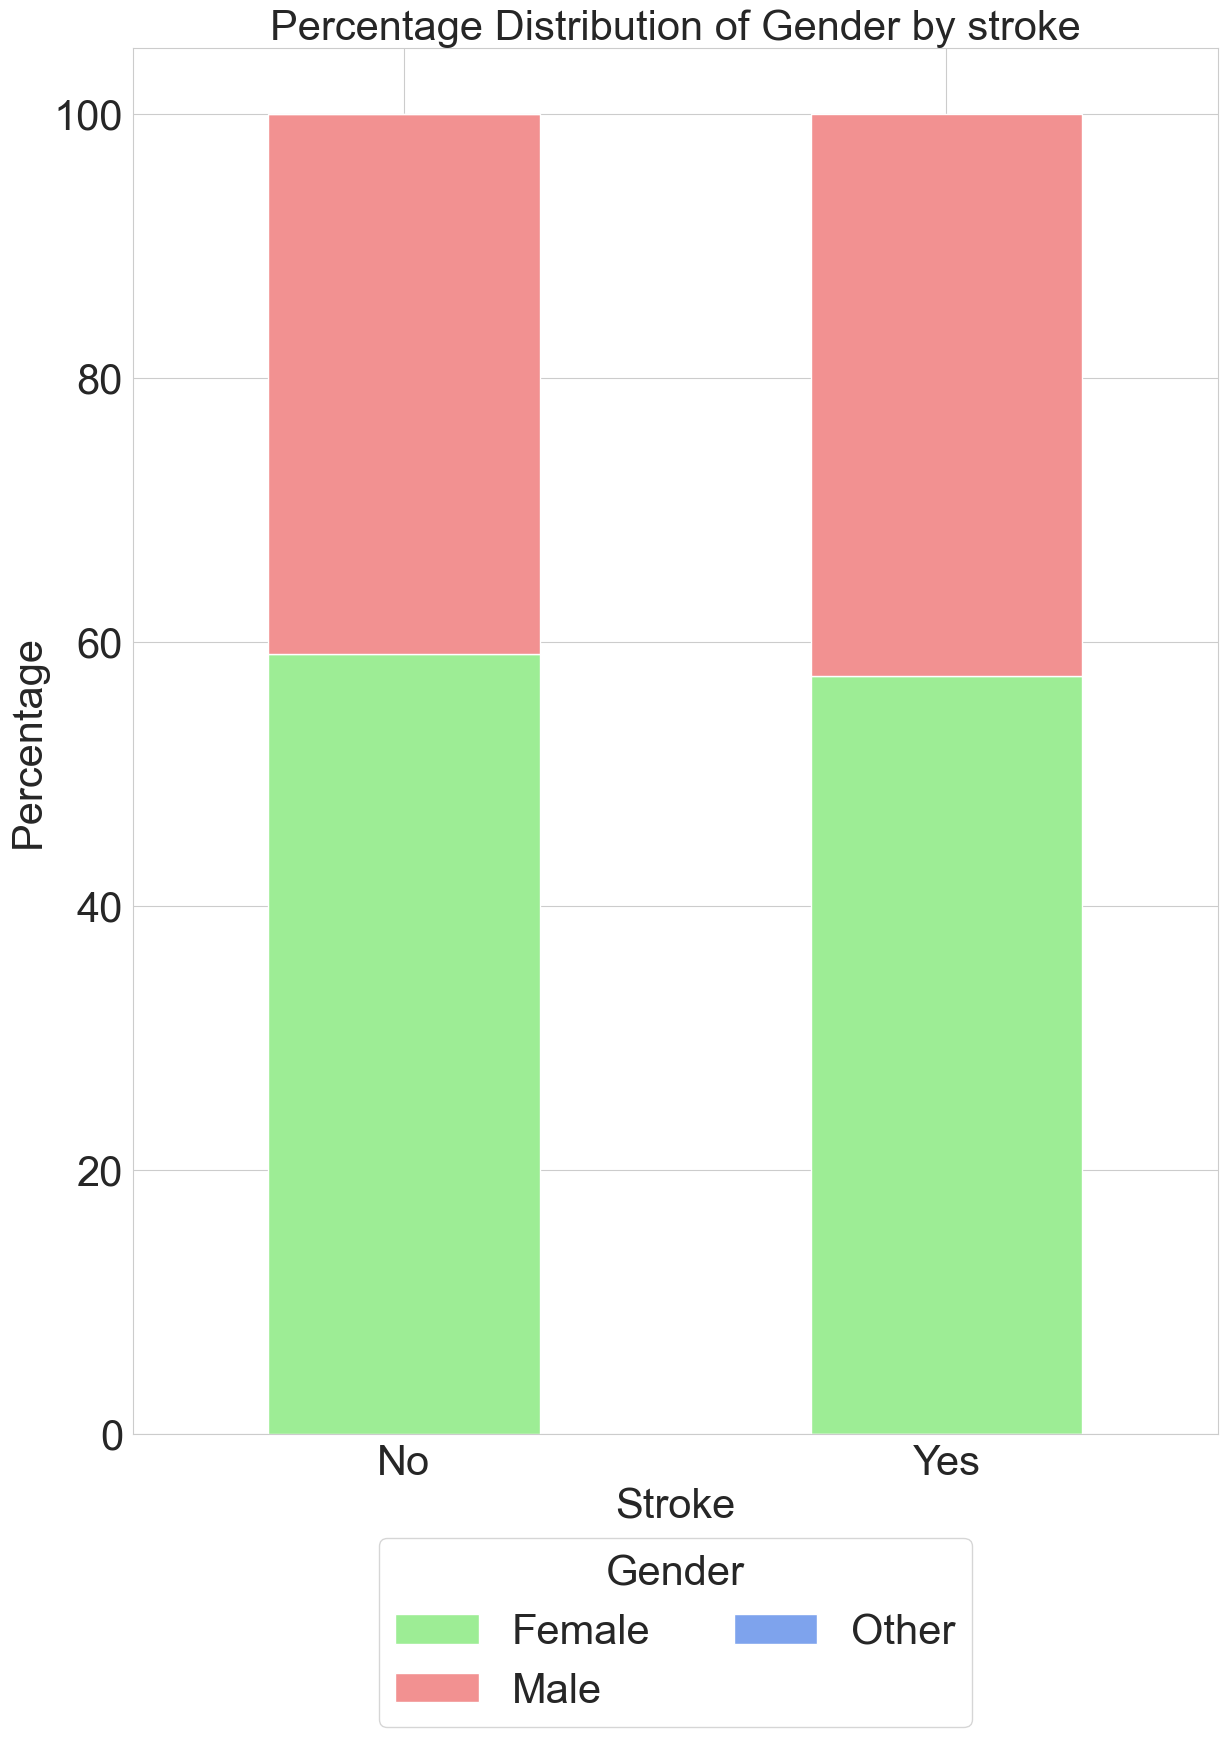

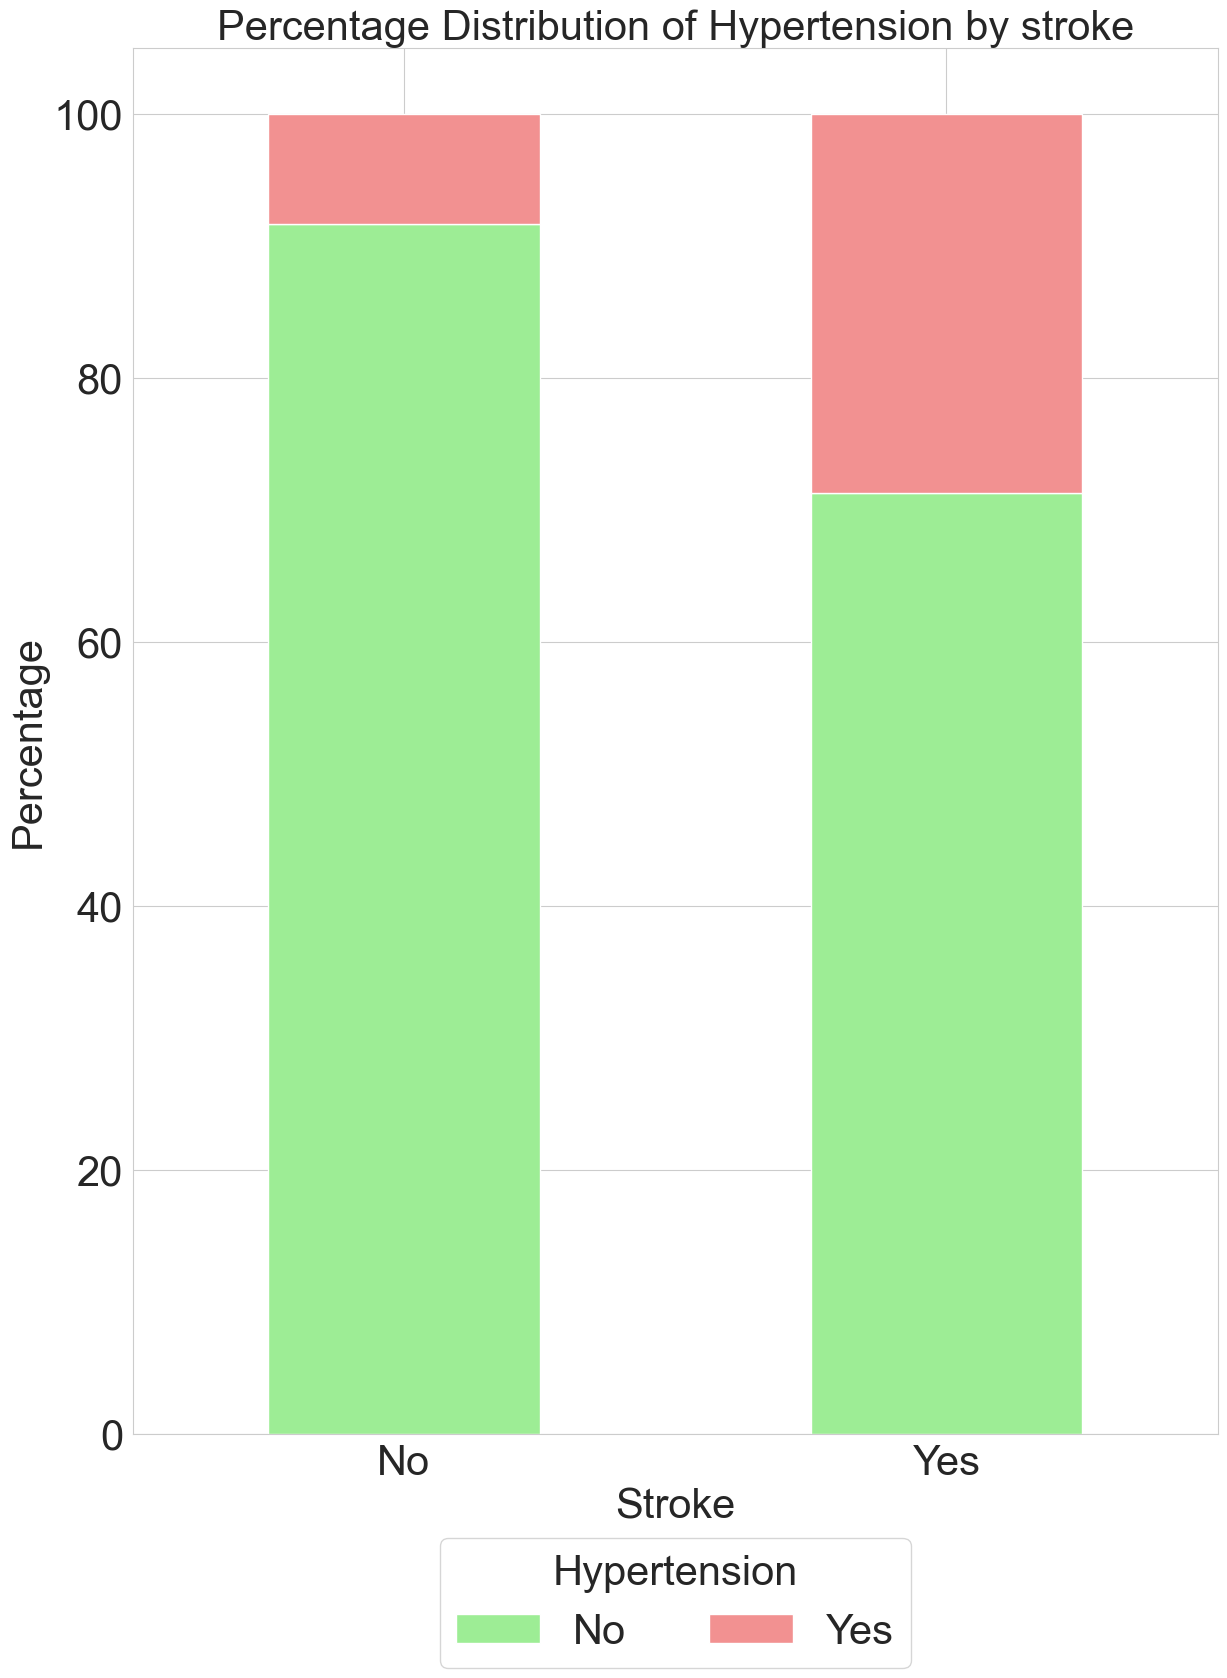

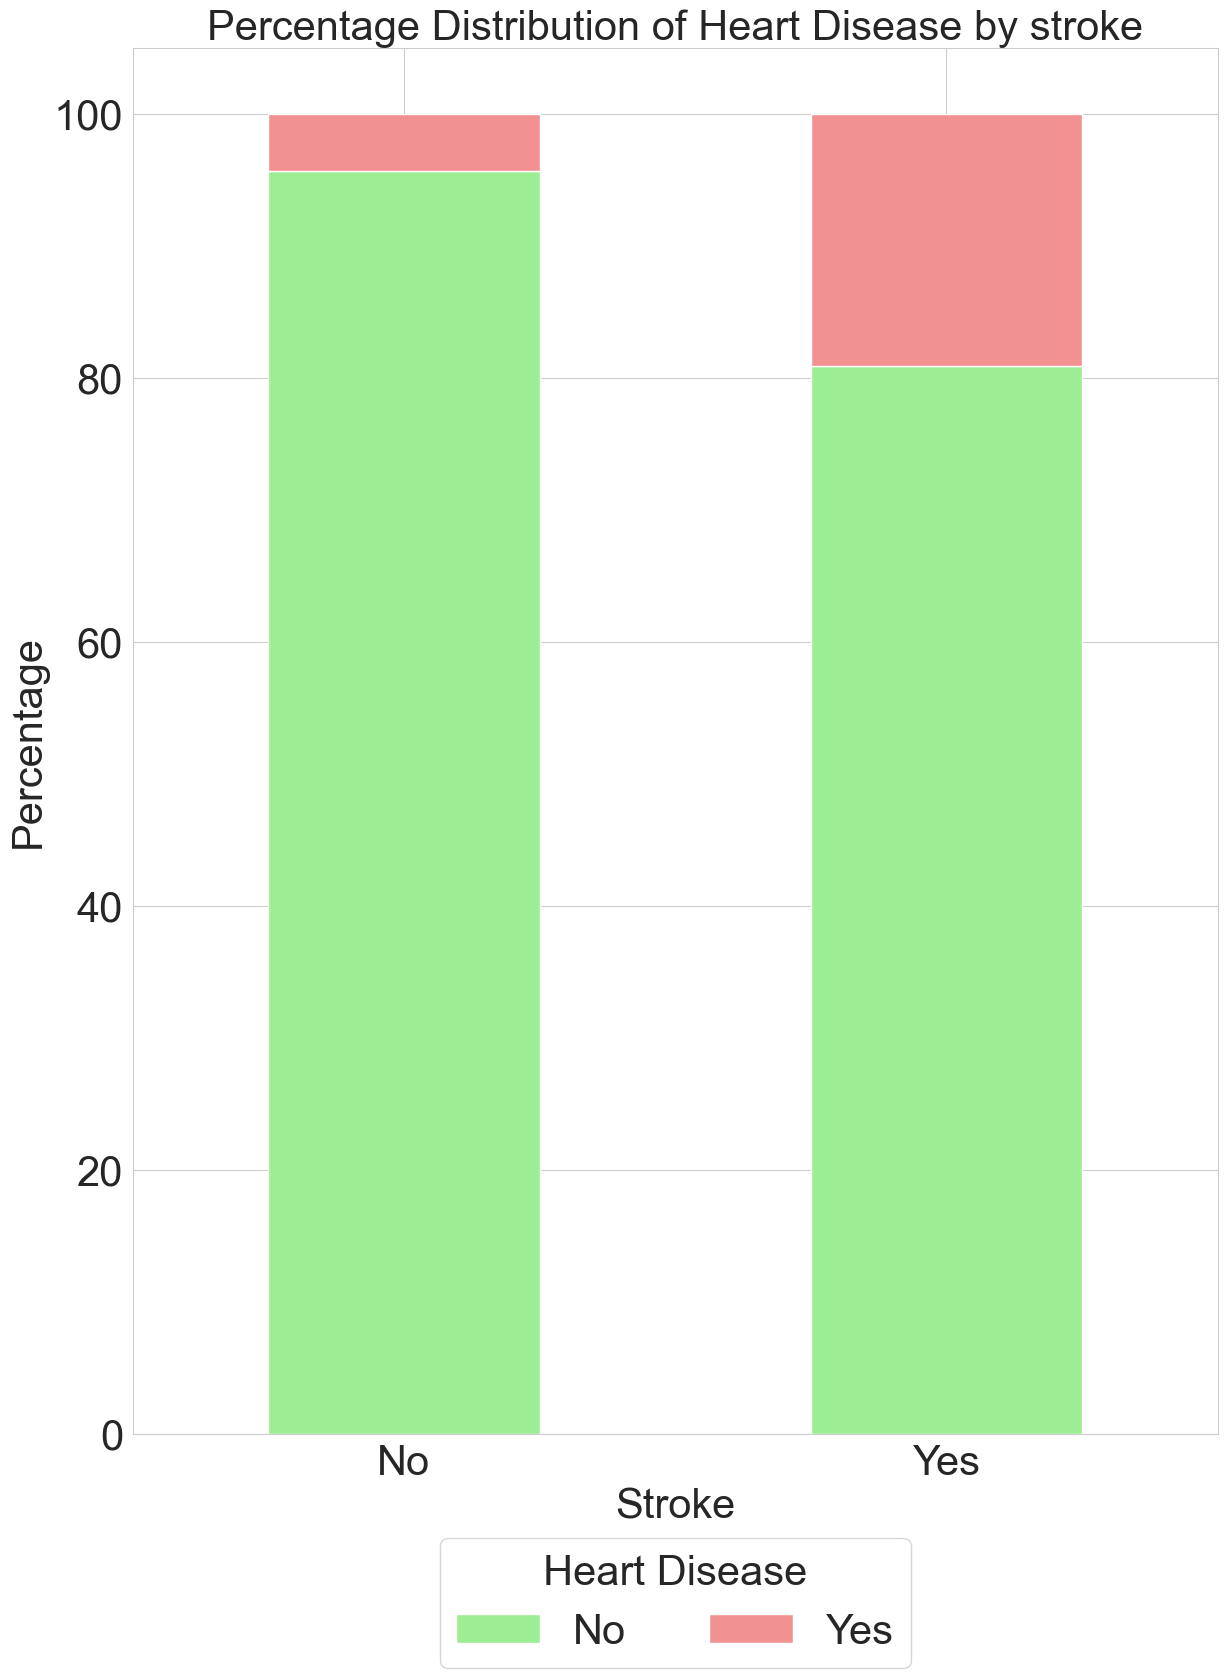

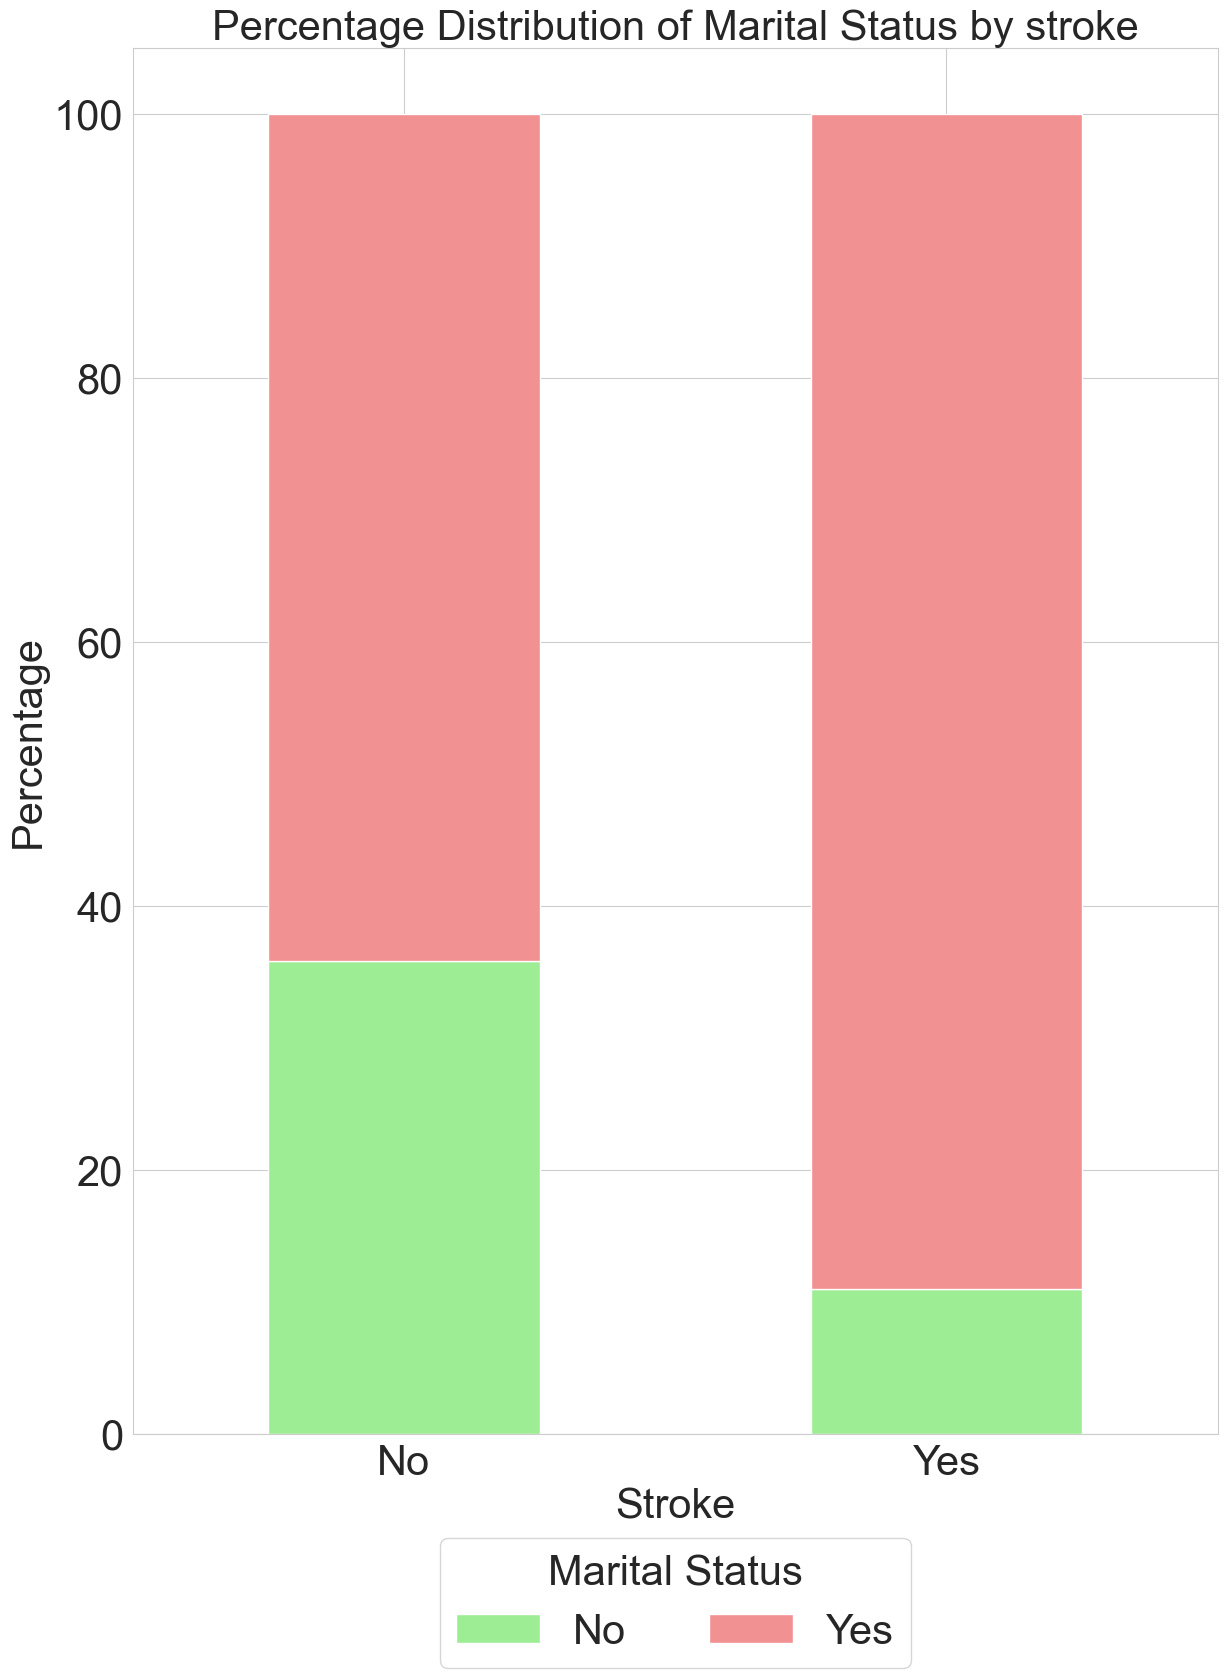

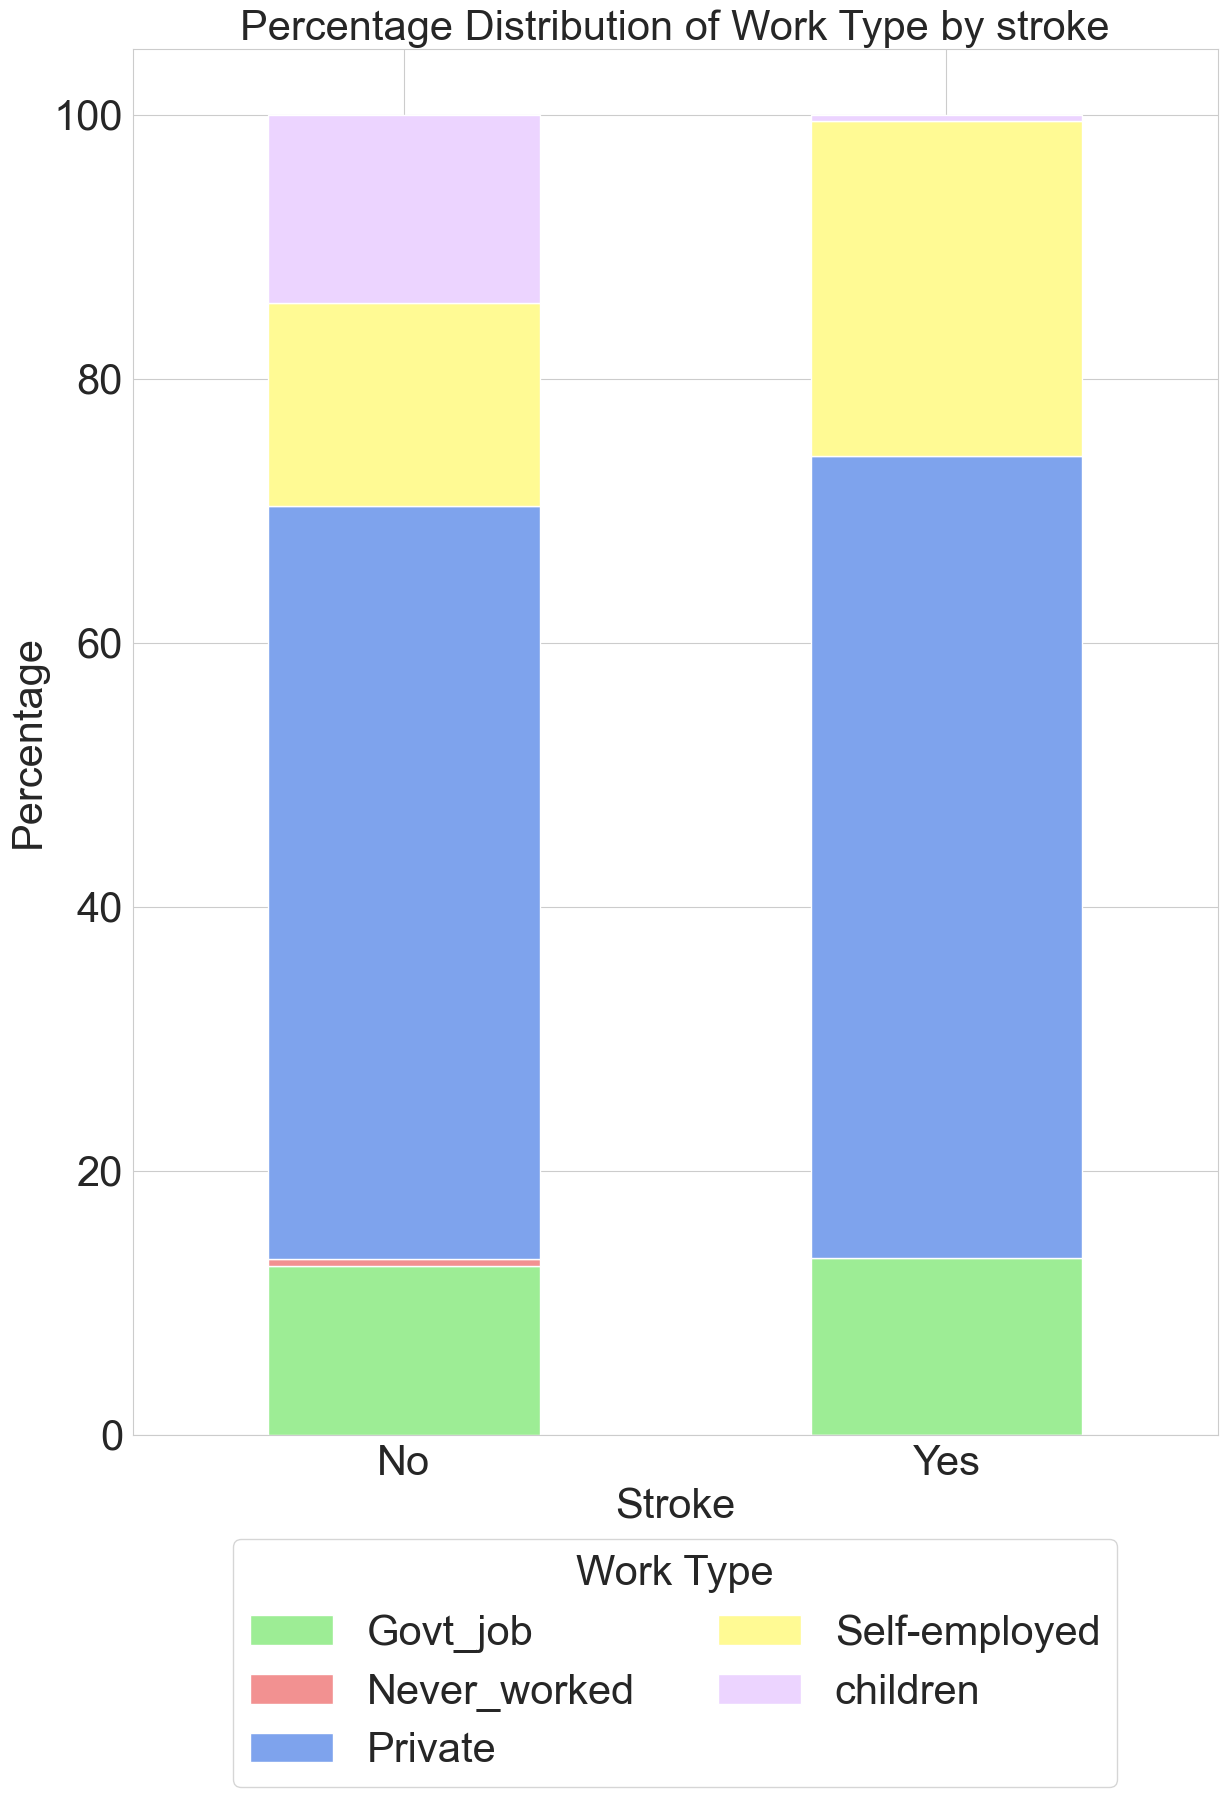

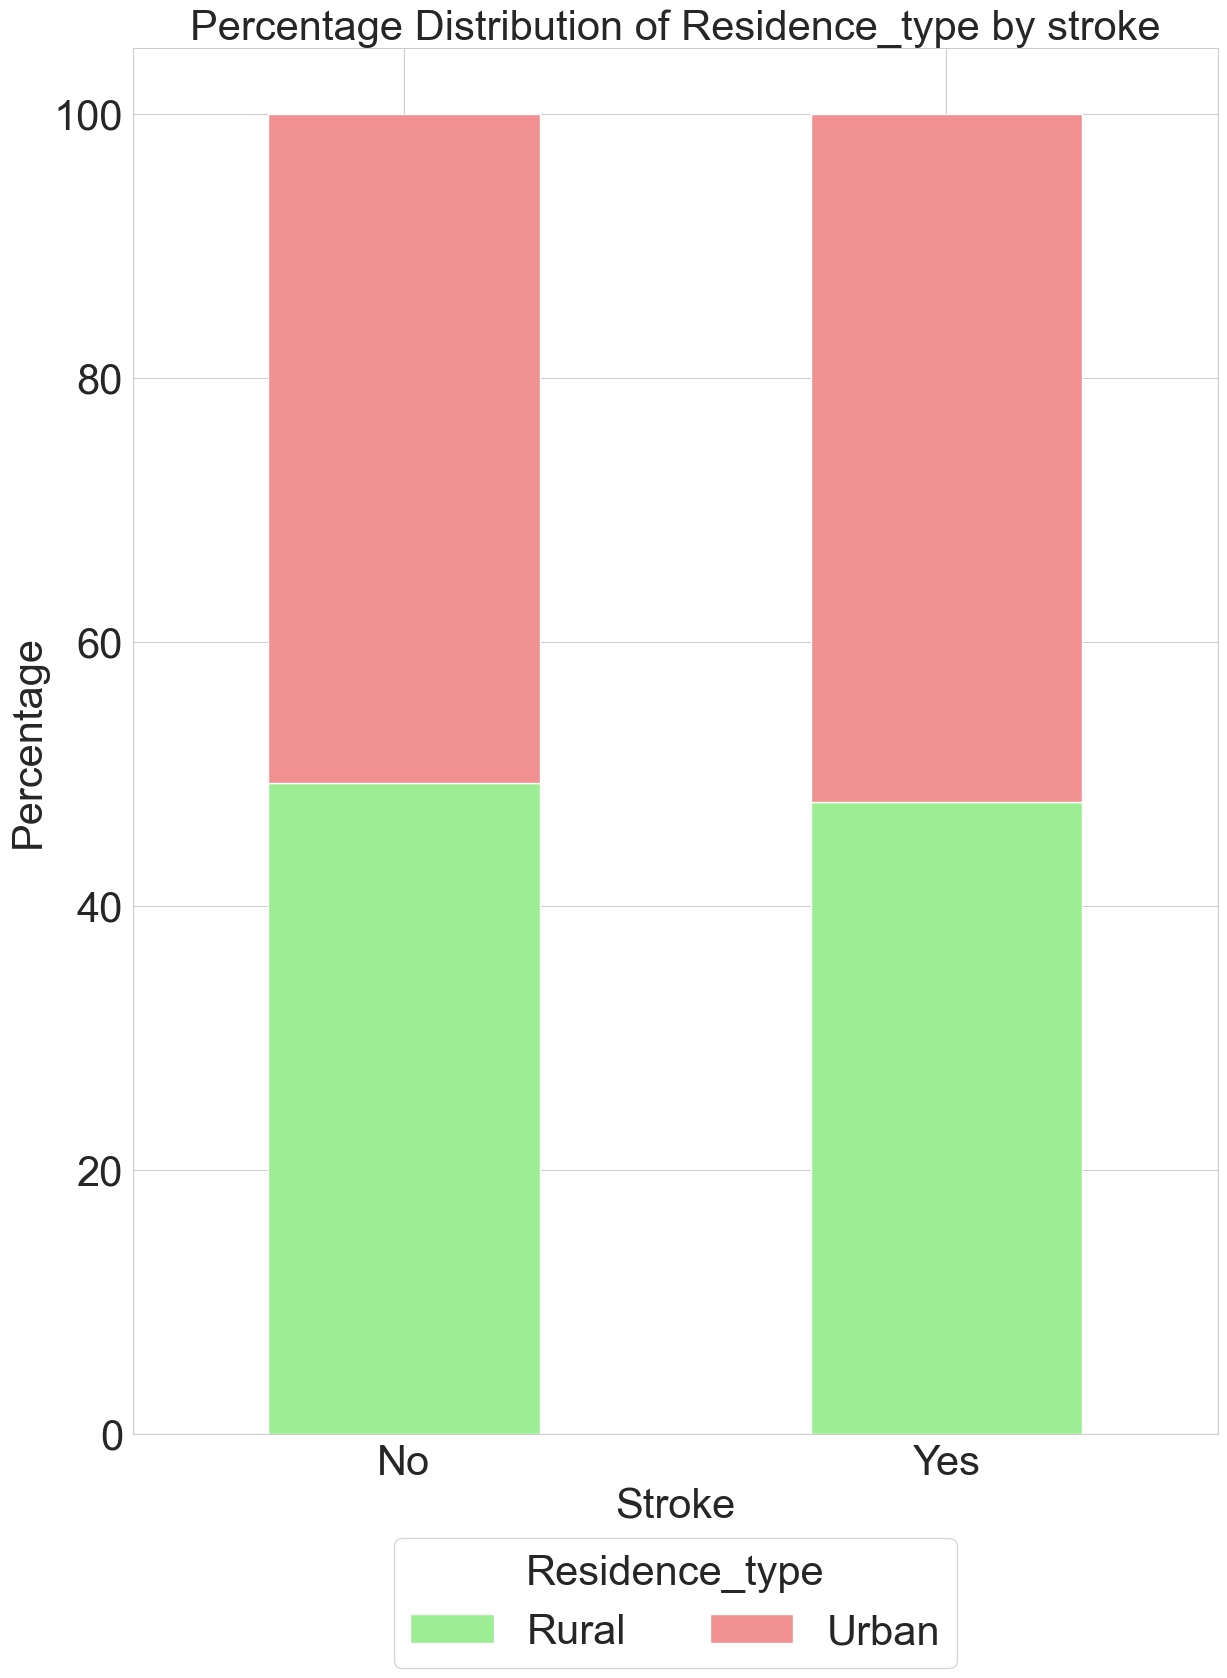

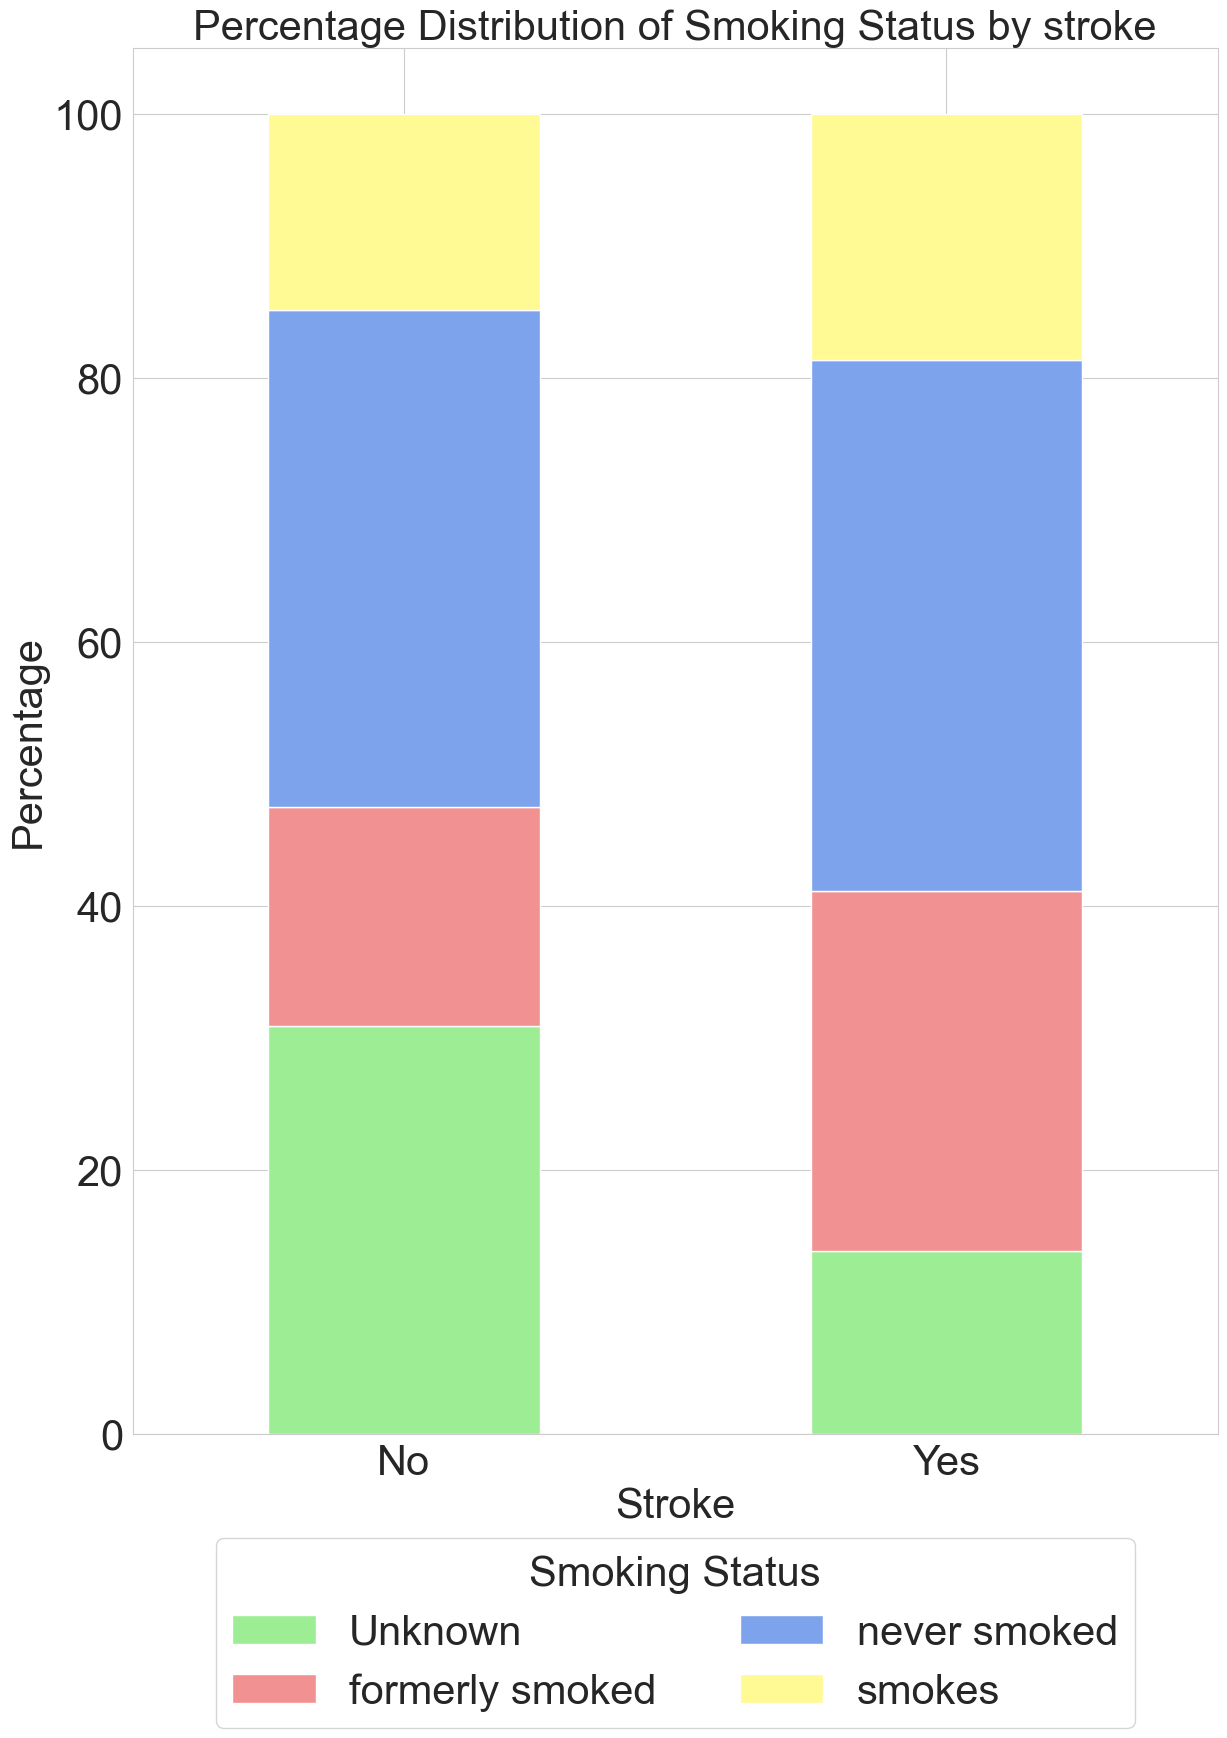

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Define a custom pastel color palette from your latest image
custom_pastel_palette = [
    "#9ded95",  # Pastel Green
    "#f29191",  # Soft Pink
    "#7ea3ed",  # Soft Blue
    "#fffa94",  # Light Yellow
    "#ecd4ff"   # Muted Purple
]

# Define a mapping from column names to custom titles
column_titles = {
    "gender": "Gender",
    "hypertension": "Hypertension",
    "heart_disease": "Heart Disease",
    "ever_married": "Marital Status",
    "work_type": "Work Type",
    "residence_type": "Residence Type",
    "smoking_status": "Smoking Status"
}

# Generate individual stacked bar plots for each categorical variable
for col in categorical:
    if col in column_titles:  # Ensure the column exists in the mapping
        title = column_titles[col]
    else:
        title = col  # Use the original name if no mapping is found

    # Calculate percentage distribution for each stroke category
    category_counts = df.groupby([target, col]).size().unstack()
    category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100  # Convert to percentage

    # Create a new figure and axes explicitly with fixed figsize (14x18)
    fig, ax = plt.subplots(figsize=(14, 18))  
    
    # Stacked bar plot using the new pastel colors
    category_percentage.plot(kind='bar', stacked=True, ax=ax, color=custom_pastel_palette) 
    
    # Formatting
    ax.set_title(f'Percentage Distribution of {title} by {target}', fontsize=30)
    ax.set_xlabel("Stroke", fontsize=30)
    ax.set_ylabel("Percentage", fontsize=30)
    ax.tick_params(axis='x', rotation=0, labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    
    # Set x-axis labels to "No" and "Yes"
    ax.set_xticklabels(["No", "Yes"])

    # Fix legend labels (0 -> No, 1 -> Yes)
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ["No" if lbl == "0" else "Yes" if lbl == "1" else lbl for lbl in labels]
    ax.legend(handles, new_labels, title=title, fontsize=30, title_fontsize=30, 
              loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=2)

    plt.show()


# Identify Stroke Risk Factors

## Chi-Square Test for Categorical Variables

In [30]:
import pandas as pd
import scipy.stats as stats

# Perform Chi-Square test for each categorical variable
chi_square_results = {}
for col in categorical:
    contingency_table = pd.crosstab(df[col], df['stroke'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi_square_results[col] = p  # Store p-value

# Convert to DataFrame and display only significant variables (p < 0.05)
chi_square_df = pd.DataFrame(chi_square_results.items(), columns=['Variable', 'P-Value'])
chi_square_df = chi_square_df[chi_square_df['P-Value'] < 0.05]

chi_square_df


Variable       P-Value
1    hypertension  6.033751e-23
2   heart_disease  2.067778e-21
3    ever_married  3.128341e-13
4       work_type  1.705567e-08
6  smoking_status  1.252202e-07

## T-Test / Mann-Whitney U Test for Numeric Variables

In [31]:
numeric_test_results = {}
for col in numeric:
    stroke_group = df[df['stroke'] == 1][col]
    non_stroke_group = df[df['stroke'] == 0][col]
    
    # Use T-test if normally distributed, else use Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(stroke_group, non_stroke_group, alternative='two-sided')
    
    numeric_test_results[col] = p_value

# Convert to DataFrame and display only significant variables (p < 0.05)
numeric_test_df = pd.DataFrame(numeric_test_results.items(), columns=['Variable', 'P-Value'])
numeric_test_df = numeric_test_df[numeric_test_df['P-Value'] < 0.05]

numeric_test_df

Variable       P-Value
0                age  6.200260e-61
1  avg_glucose_level  8.168450e-10
2                bmi  1.026429e-04

## Odds Ratios for Binary Variables

In [32]:
odds_ratios = {}
for col in ['hypertension', 'heart_disease']:  # Binary categorical variables
    contingency_table = pd.crosstab(df[col], df['stroke'])
    odds_ratio = (contingency_table.iloc[1,1] / contingency_table.iloc[1,0]) / \
                 (contingency_table.iloc[0,1] / contingency_table.iloc[0,0])
    odds_ratios[col] = odds_ratio

# Convert to DataFrame
odds_ratio_df = pd.DataFrame(odds_ratios.items(), columns=['Variable', 'Odds Ratio'])
odds_ratio_df

Variable  Odds Ratio
0   hypertension    4.437769
1  heart_disease    5.243245

# Preprocessing

## Categorical Variable

In [33]:
df_cleaned = df.copy()

In [34]:
df_cleaned = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df_cleaned['ever_married'] = df_cleaned['ever_married'].map({'No': 0, 'Yes': 1})
df_cleaned['gender'] = df_cleaned['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

df_cleaned.head()

gender   age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0       0  67.0             0              1             1             228.69   
1       0  80.0             0              1             1             105.92   
2       1  49.0             0              0             1             171.23   
3       1  79.0             1              0             1             174.12   
4       0  81.0             0              0             1             186.21   

    bmi  stroke  work_type_Never_worked  work_type_Private  \
0  36.6       1                   False               True   
1  32.5       1                   False               True   
2  34.4       1                   False               True   
3  24.0       1                   False              False   
4  29.0       1                   False               True   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                    False               False                  True   
1                    False               False                 False   
2                    False               False                  True   
3                     True               False                 False   
4                    False               False                  True   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                            True                        False   
1                           False                         True   
2                           False                        False   
3                           False                         True   
4                            True                        False   

   smoking_status_smokes  
0                  False  
1                  False  
2                   True  
3                  False  
4                  False

## Define features (X) and target (y)

In [35]:
X = df_cleaned.drop(columns=['stroke'])
y = df_cleaned[target]

In [36]:
df_cleaned.stroke.value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

## Oversampling with SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Numeric Variable

In [38]:
# Define a function to count outliers using the IQR method
def count_outliers(df, numeric_columns):
    outlier_counts = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outlier_count
    
    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

# Get the exact number of outliers for numeric variables
outlier_df = count_outliers(df, numeric)

outlier_df

Outlier Count
age                            0
avg_glucose_level            567
bmi                          110

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()  # Use RobustScaler due to outliers
X_resampled[numeric] = scaler.fit_transform(X_resampled[numeric])

## Split the Dataset

In [40]:
from sklearn.model_selection import train_test_split

# First option: Full dataset
X_full = X_resampled  # All features
y = y_resampled

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
                                                        X_full, y, test_size=0.2, random_state=42, stratify=y
                                                        )

# Second option: Dataset without 'gender' and 'Residence_type'
X_reduced = X_resampled.drop(columns=['gender', 'Residence_type_Urban'])  # Exclude specified columns

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes of the resulting datasets
(X_train_full.shape, X_test_full.shape), (X_train_reduced.shape, X_test_reduced.shape)


(((7520, 15), (1880, 15)), ((7520, 13), (1880, 13)))

# Model Fitting

In [41]:
# Model Training Function

def train_model(model, X_train, y_train):
    """Train the given model and return the trained model."""
    model.fit(X_train, y_train)
    return model

In [42]:
# Model Evaluation Function

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def evaluate_model(model, X_train, X_test, y_train, y_test, dataset_name, model_name):
    """Evaluate the model and return performance metrics."""
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]  # Probability for ROC Curve

    # Compute Metrics
    metrics = {
        "Dataset": dataset_name,
        "Model": model_name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "AUC-ROC": roc_auc_score(y_test, y_test_prob)
    }
    
    return metrics, y_test, y_test_pred, y_test_prob

In [43]:
# Visualization functions

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def plot_confusion_matrix(y_test, y_test_pred, model_name, dataset_name):
    """Plot Confusion Matrix with increased font size."""
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", 
                xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"],
                annot_kws={"size": 16})  # Increase text inside the heatmap

    plt.xlabel("Predicted", fontsize=16)
    plt.ylabel("Actual", fontsize=16)
    plt.title(f"Confusion Matrix - {model_name} ({dataset_name})", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()


def plot_roc_curve(y_test, y_test_prob, model_name, dataset_name):
    """Plot AUC-ROC Curve with increased font size."""
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    plt.figure(figsize=(12, 9))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc_score(y_test, y_test_prob):.2f}", linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.title(f"AUC-ROC Curve - {model_name} ({dataset_name})", fontsize=16)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()


In [44]:
# Functio

import shap

def compute_shap_values(model, X_train, X_test, model_name, dataset_name):
    """Compute and visualize SHAP values for a trained model."""
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)

    # Global Feature Importance (Summary Plot)
    plt.figure(figsize=(15, 9))
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f"SHAP Summary Plot - {model_name} ({dataset_name})", fontsize=16)
    plt.show()

    # Local Explanation (Waterfall Plot for a single prediction)
    plt.figure(figsize=(15, 9))
    shap.waterfall_plot(shap.Explanation(values=shap_values[0].values, 
                                         base_values=shap_values[0].base_values, 
                                         feature_names=X_train.columns))
    plt.title(f"SHAP Waterfall Plot - {model_name} ({dataset_name})", fontsize=16)
    plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

#  Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier()
}


# Split datasets
datasets = {
    "Full Dataset": train_test_split(X_full, y, test_size=0.2, random_state=42, stratify=y),
    "Reduced Dataset": train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
}

In [46]:
from sklearn.calibration import calibration_curve

# Function to plot model calibration curve
def plot_calibration_curve(y_test, y_test_prob, model_name, dataset_name):
    """Plot Calibration Curve to check probability reliability."""
    prob_true, prob_pred = calibration_curve(y_test, y_test_prob, n_bins=10, strategy="uniform")

    plt.figure(figsize=(10, 6))
    plt.plot(prob_pred, prob_true, marker="o", linestyle="-", label="Calibration Curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfectly Calibrated")
    
    plt.xlabel("Predicted Probability", fontsize=14)
    plt.ylabel("Observed Probability", fontsize=14)
    plt.title(f"Calibration Curve - {model_name} ({dataset_name})", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()



🔹 Training Logistic Regression on Full Dataset...


C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1403070590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")


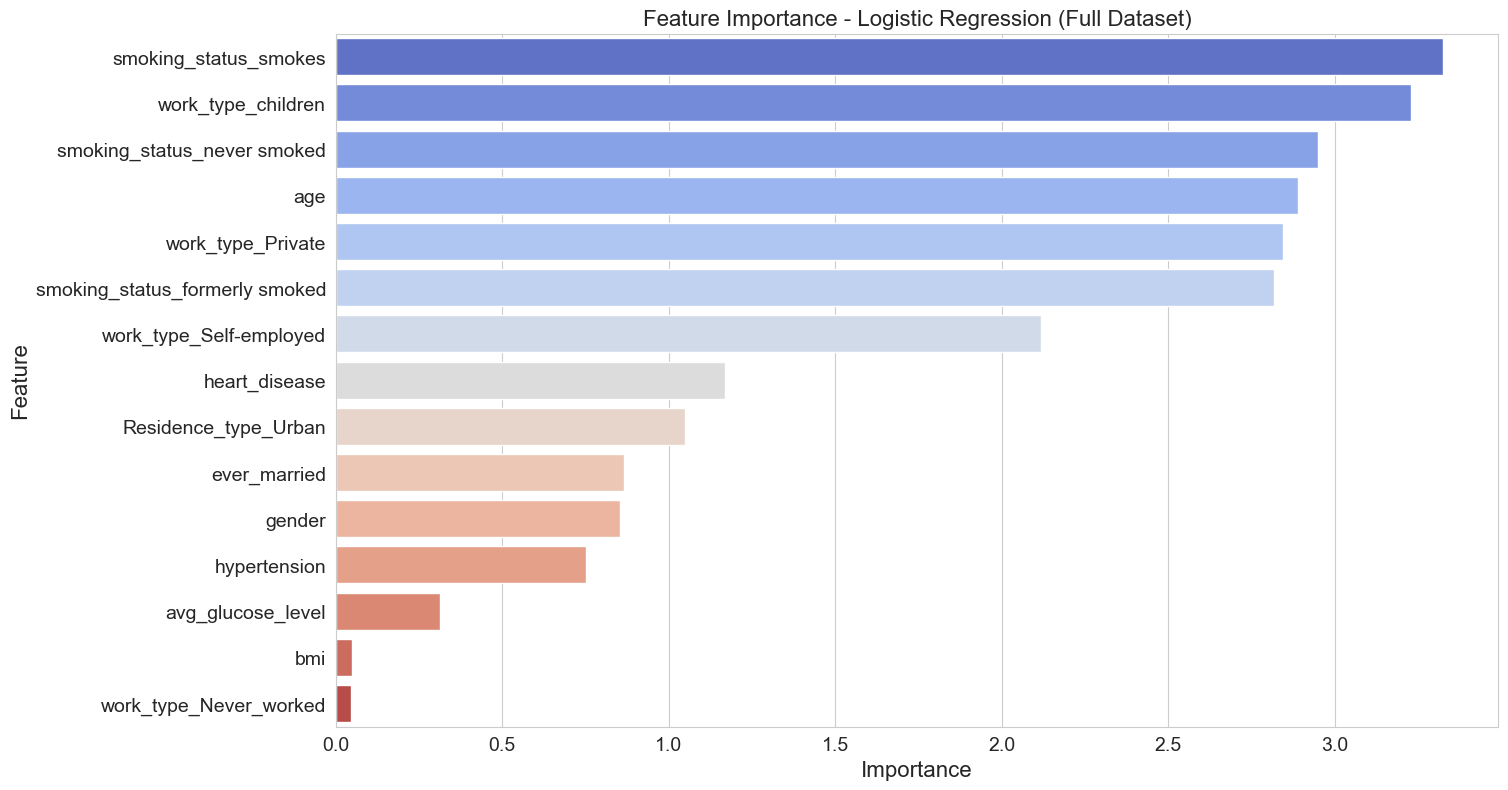

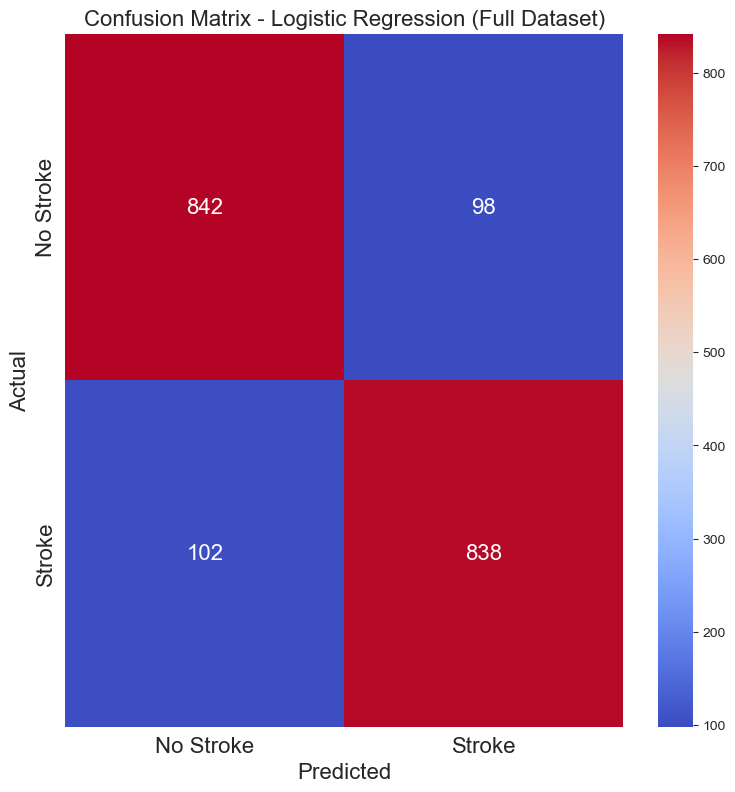

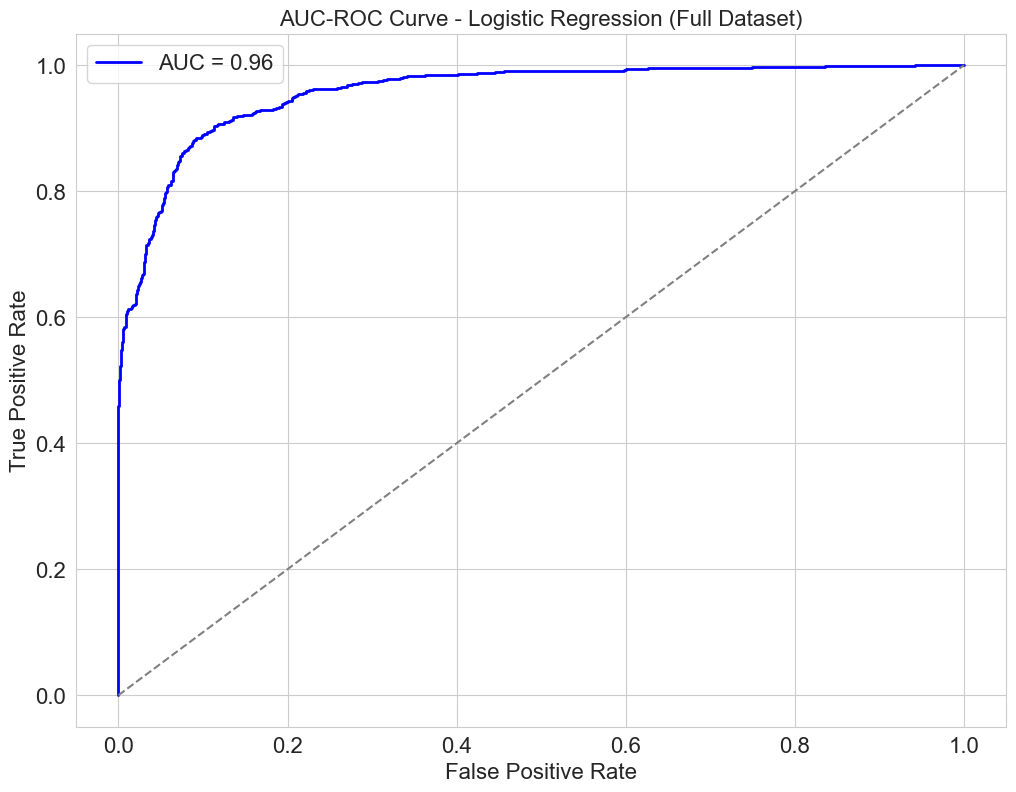

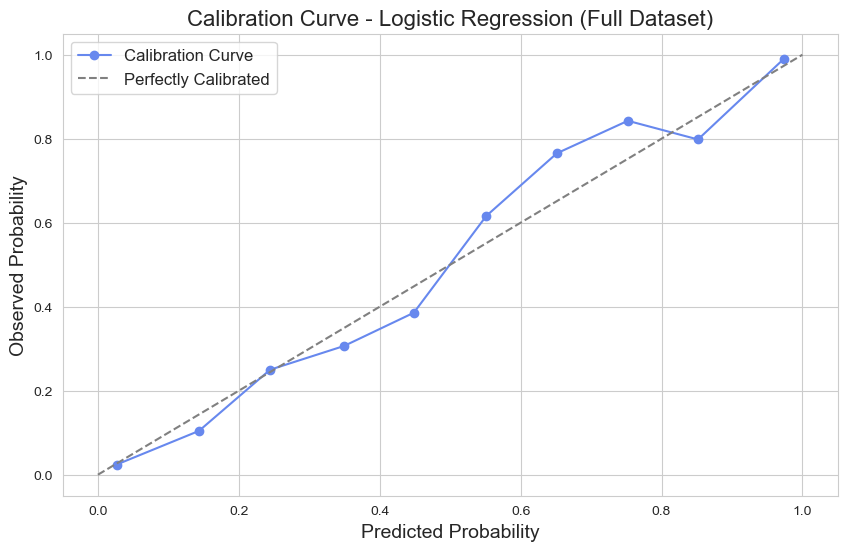


False Negatives Summary:
           gender         age  hypertension  heart_disease  ever_married  \
count  102.000000  102.000000    102.000000     102.000000    102.000000   
mean     0.627451   -0.029272      0.088235       0.068627      0.823529   
std      0.485871    0.407494      0.285037       0.254068      0.383103   
min      0.000000   -1.400762      0.000000       0.000000      0.000000   
25%      0.000000   -0.272013      0.000000       0.000000      1.000000   
50%      1.000000   -0.062256      0.000000       0.000000      1.000000   
75%      1.000000    0.275535      0.000000       0.000000      1.000000   
max      1.000000    0.684817      1.000000       1.000000      1.000000   

       avg_glucose_level         bmi  True_Label  Predicted_Probability  \
count         102.000000  102.000000       102.0             102.000000   
mean            0.133568    0.235510         1.0               0.286964   
std             0.719178    0.738626         0.0               0

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1403070590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")


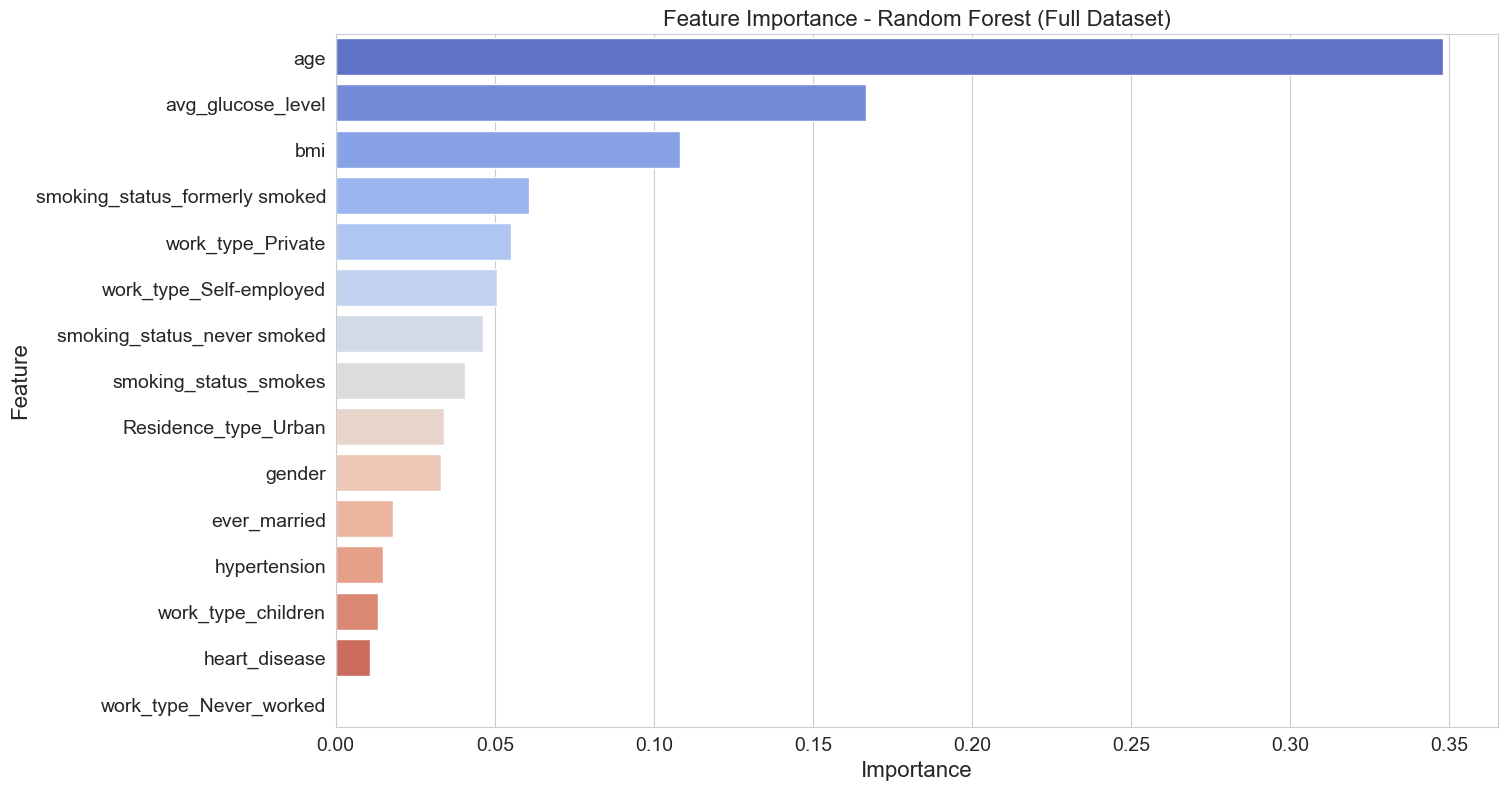

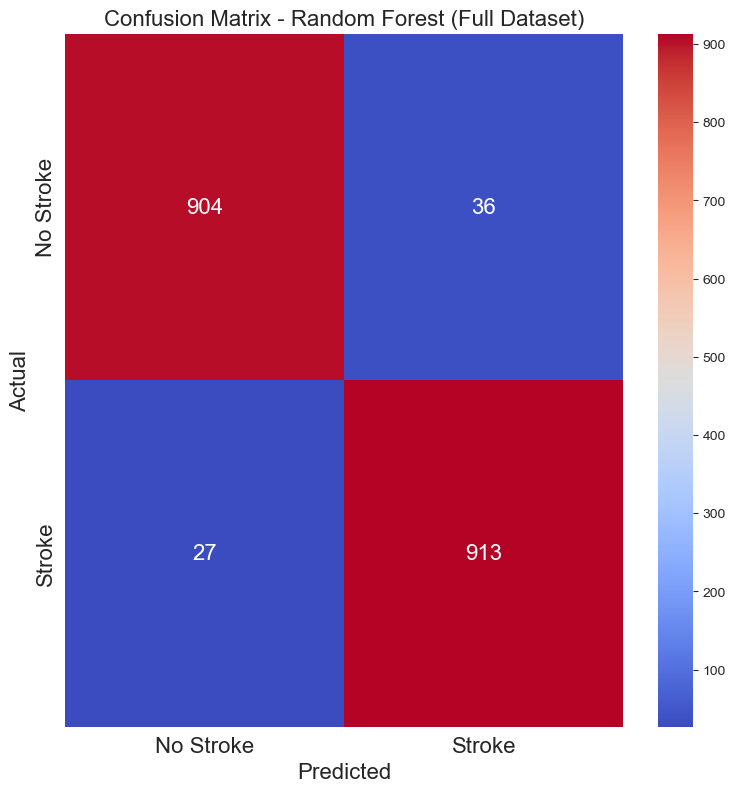

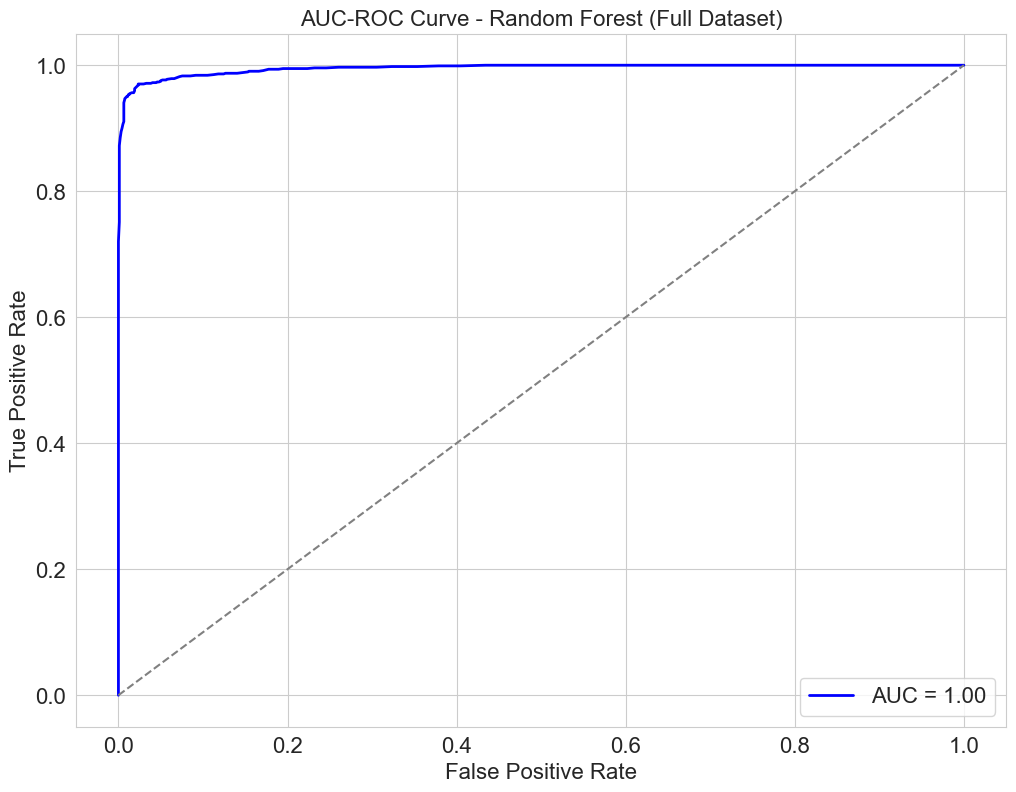

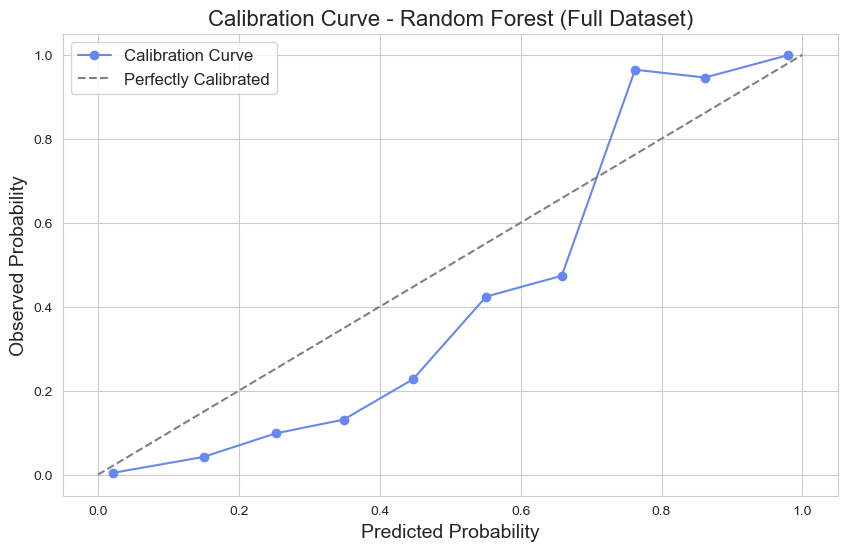


False Negatives Summary:
          gender        age  hypertension  heart_disease  ever_married  \
count  27.000000  27.000000     27.000000      27.000000     27.000000   
mean    0.518519   0.009676      0.111111       0.037037      0.777778   
std     0.509175   0.555920      0.320256       0.192450      0.423659   
min     0.000000  -1.400762      0.000000       0.000000      0.000000   
25%     0.000000  -0.256374      0.000000       0.000000      1.000000   
50%     1.000000   0.124512      0.000000       0.000000      1.000000   
75%     1.000000   0.425464      0.000000       0.000000      1.000000   
max     1.000000   0.653689      1.000000       1.000000      1.000000   

       avg_glucose_level        bmi  True_Label  Predicted_Probability  \
count          27.000000  27.000000        27.0              27.000000   
mean            0.215356   0.423786         1.0               0.286296   
std             0.715323   0.693665         0.0               0.125641   
min        

c:\Users\anhph\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:30] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1403070590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")


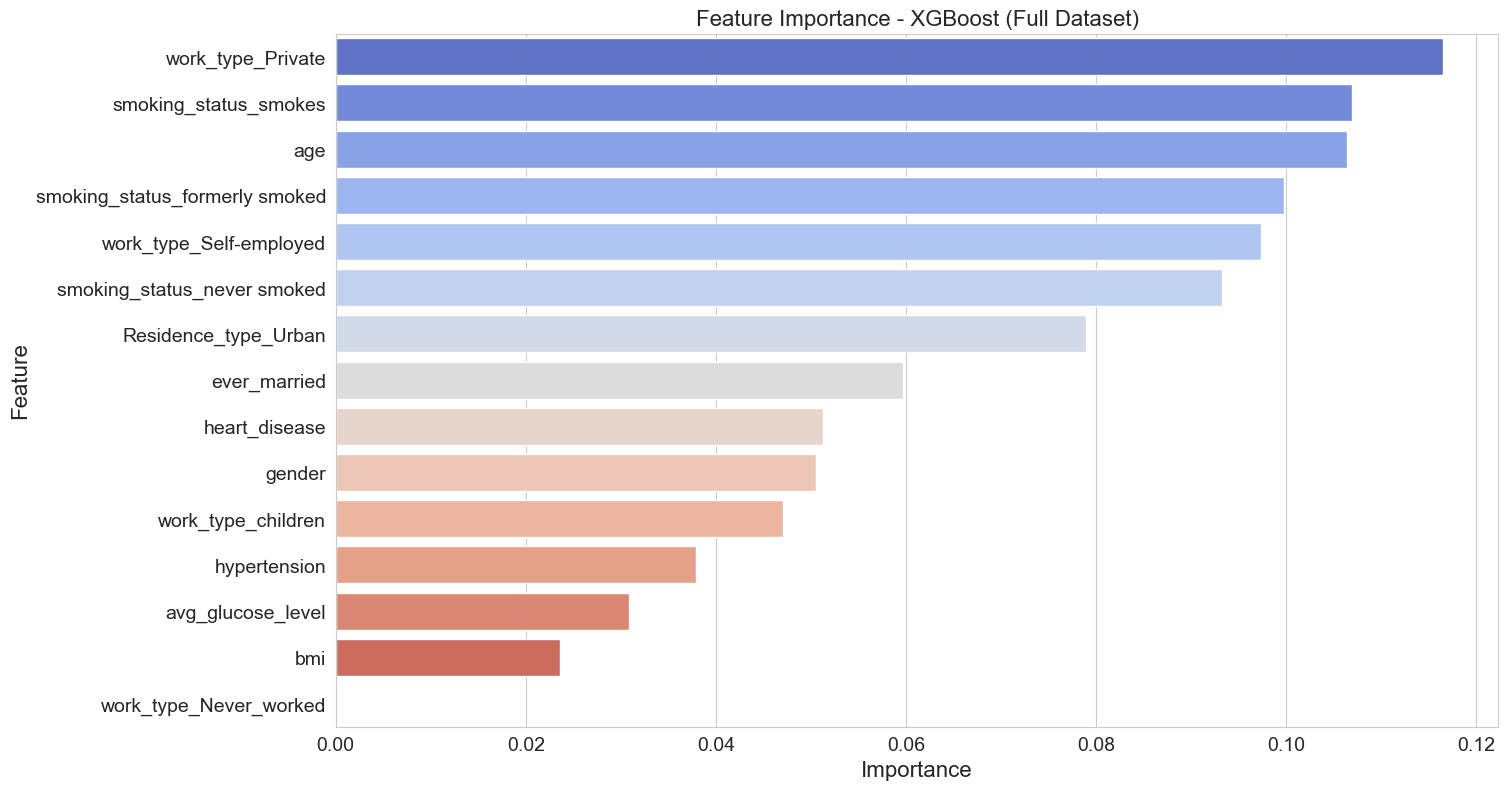

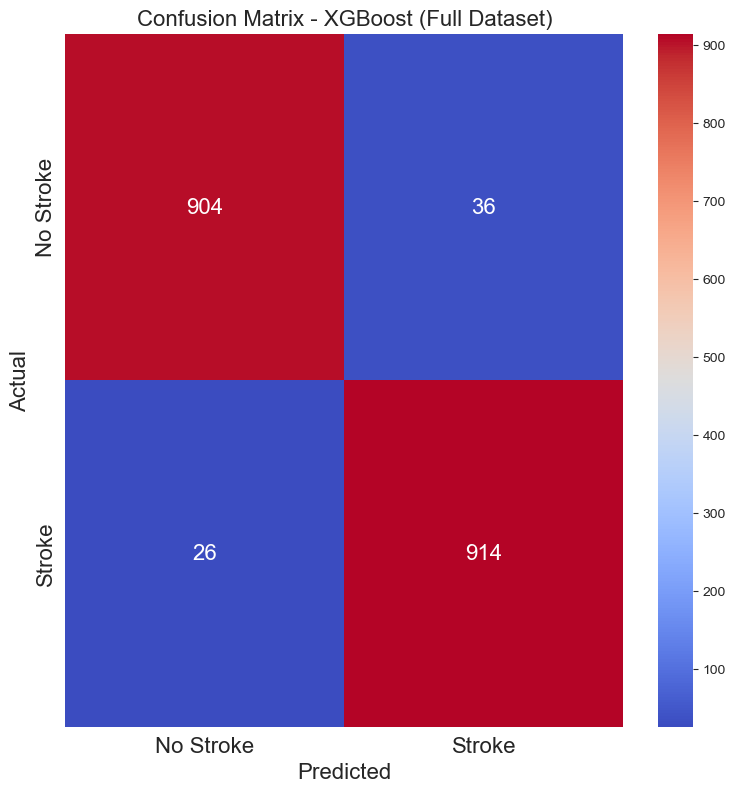

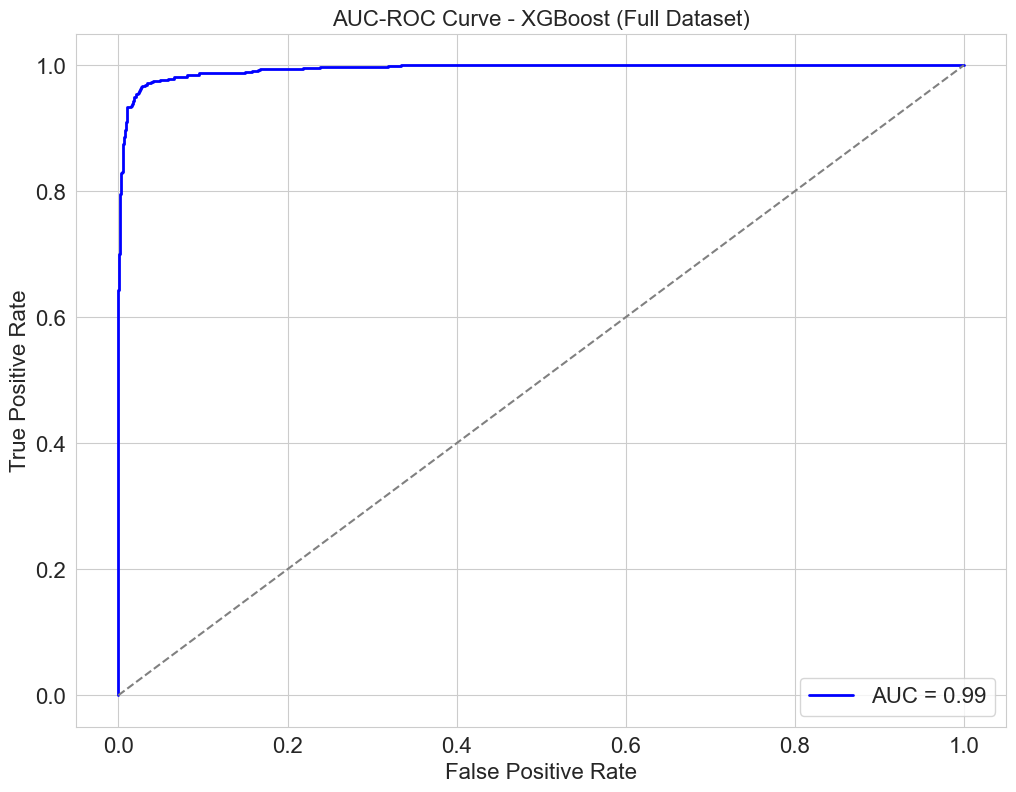

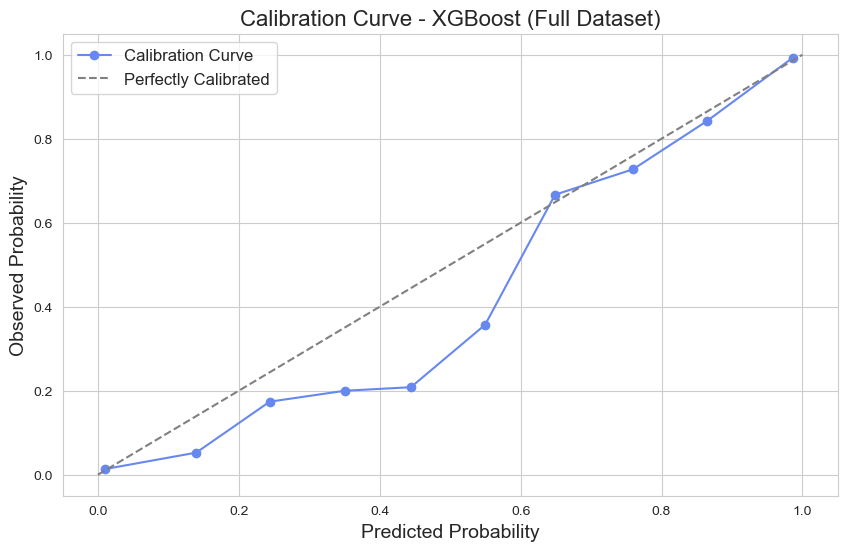


False Negatives Summary:
          gender        age  hypertension  heart_disease  ever_married  \
count  26.000000  26.000000     26.000000      26.000000     26.000000   
mean    0.653846  -0.025888      0.115385       0.076923      0.807692   
std     0.485165   0.544872      0.325813       0.271746      0.401918   
min     0.000000  -1.400762      0.000000       0.000000      0.000000   
25%     0.000000  -0.372203      0.000000       0.000000      1.000000   
50%     1.000000   0.026586      0.000000       0.000000      1.000000   
75%     1.000000   0.461477      0.000000       0.000000      1.000000   
max     1.000000   0.653689      1.000000       1.000000      1.000000   

       avg_glucose_level        bmi  True_Label  Predicted_Probability  \
count          26.000000  26.000000        26.0              26.000000   
mean           -0.039052   0.311083         1.0               0.208077   
std             0.560738   0.644194         0.0               0.159419   
min        

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1403070590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")


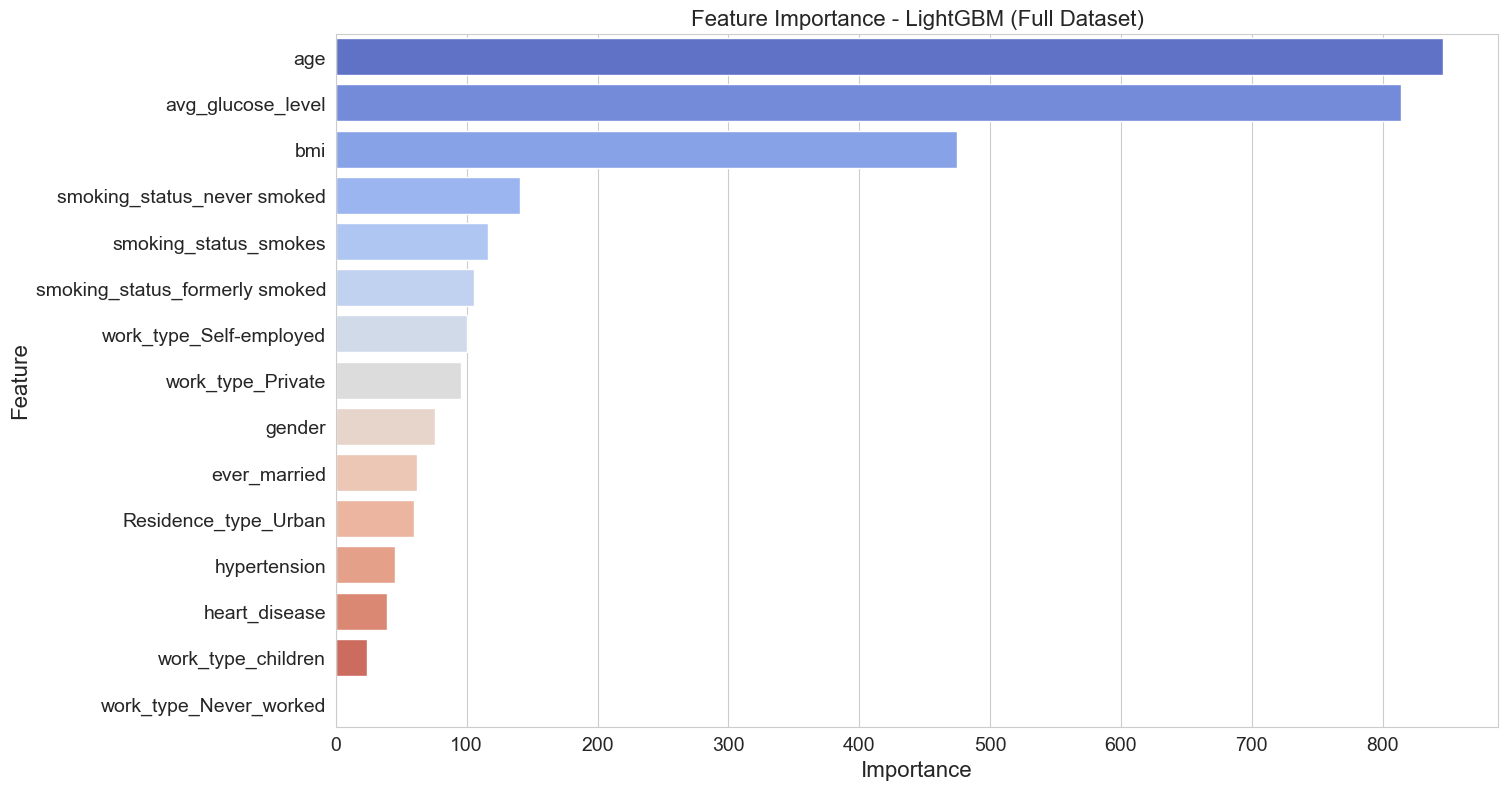

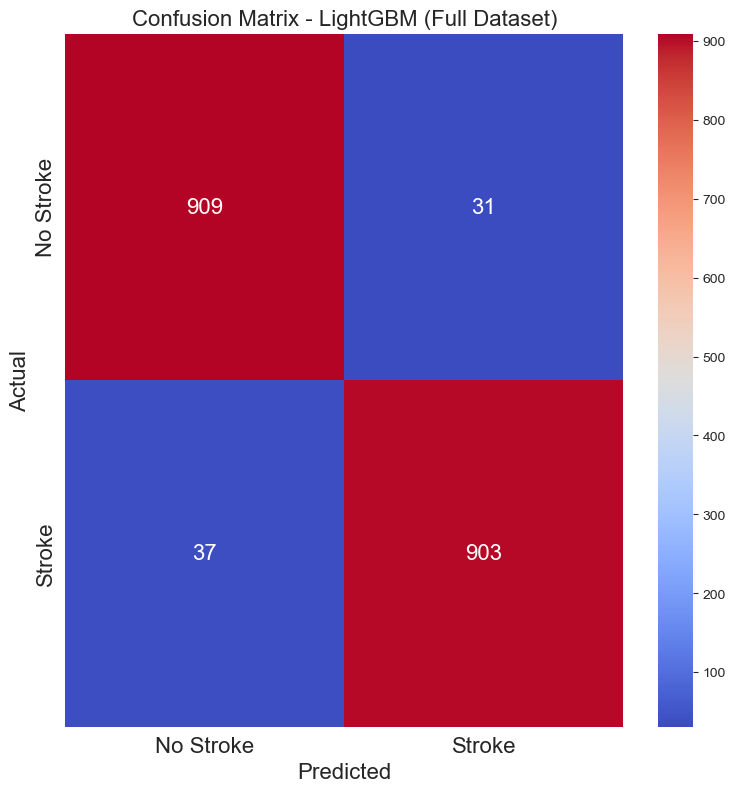

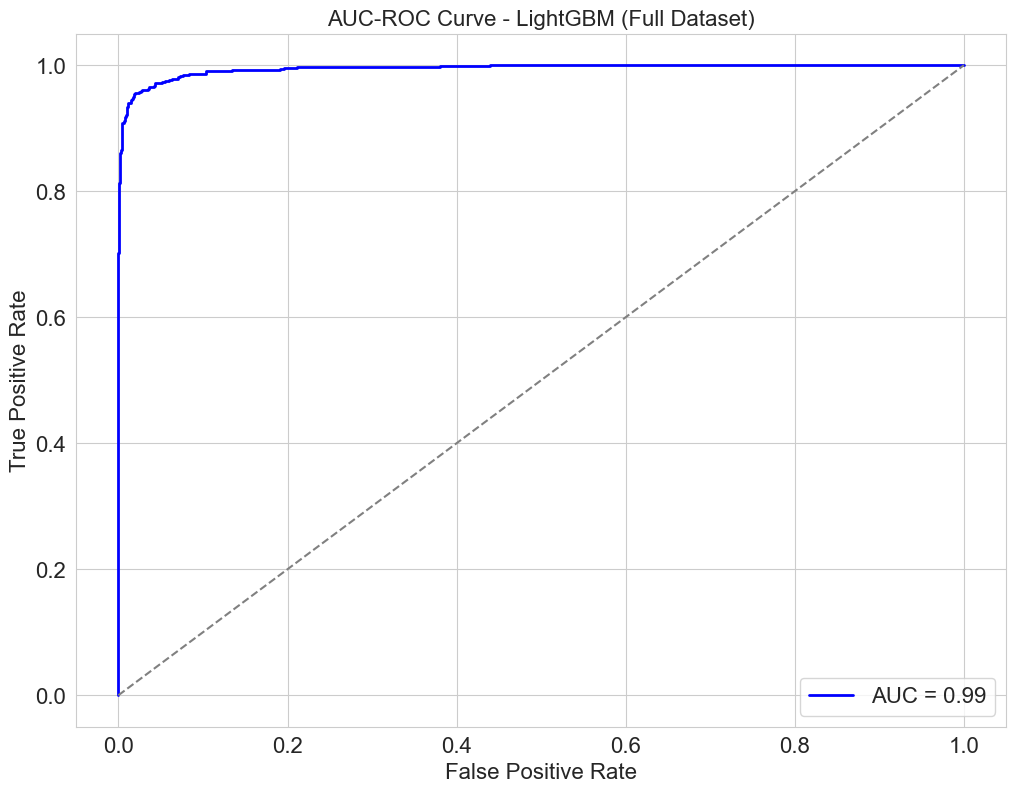

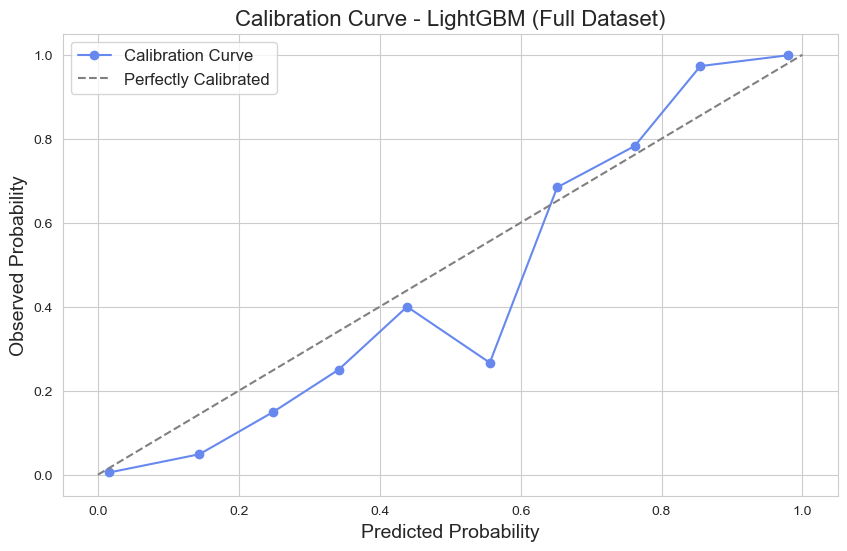


False Negatives Summary:
          gender        age  hypertension  heart_disease  ever_married  \
count  37.000000  37.000000     37.000000      37.000000     37.000000   
mean    0.567568  -0.028762      0.108108       0.081081      0.837838   
std     0.502247   0.526956      0.314800       0.276725      0.373684   
min     0.000000  -1.400762      0.000000       0.000000      0.000000   
25%     0.000000  -0.404665      0.000000       0.000000      1.000000   
50%     1.000000   0.022045      0.000000       0.000000      1.000000   
75%     1.000000   0.404665      0.000000       0.000000      1.000000   
max     1.000000   0.653689      1.000000       1.000000      1.000000   

       avg_glucose_level        bmi  True_Label  Predicted_Probability  \
count          37.000000  37.000000        37.0              37.000000   
mean            0.040195   0.269773         1.0               0.309376   
std             0.599589   0.710542         0.0               0.136441   
min        

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1403070590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")


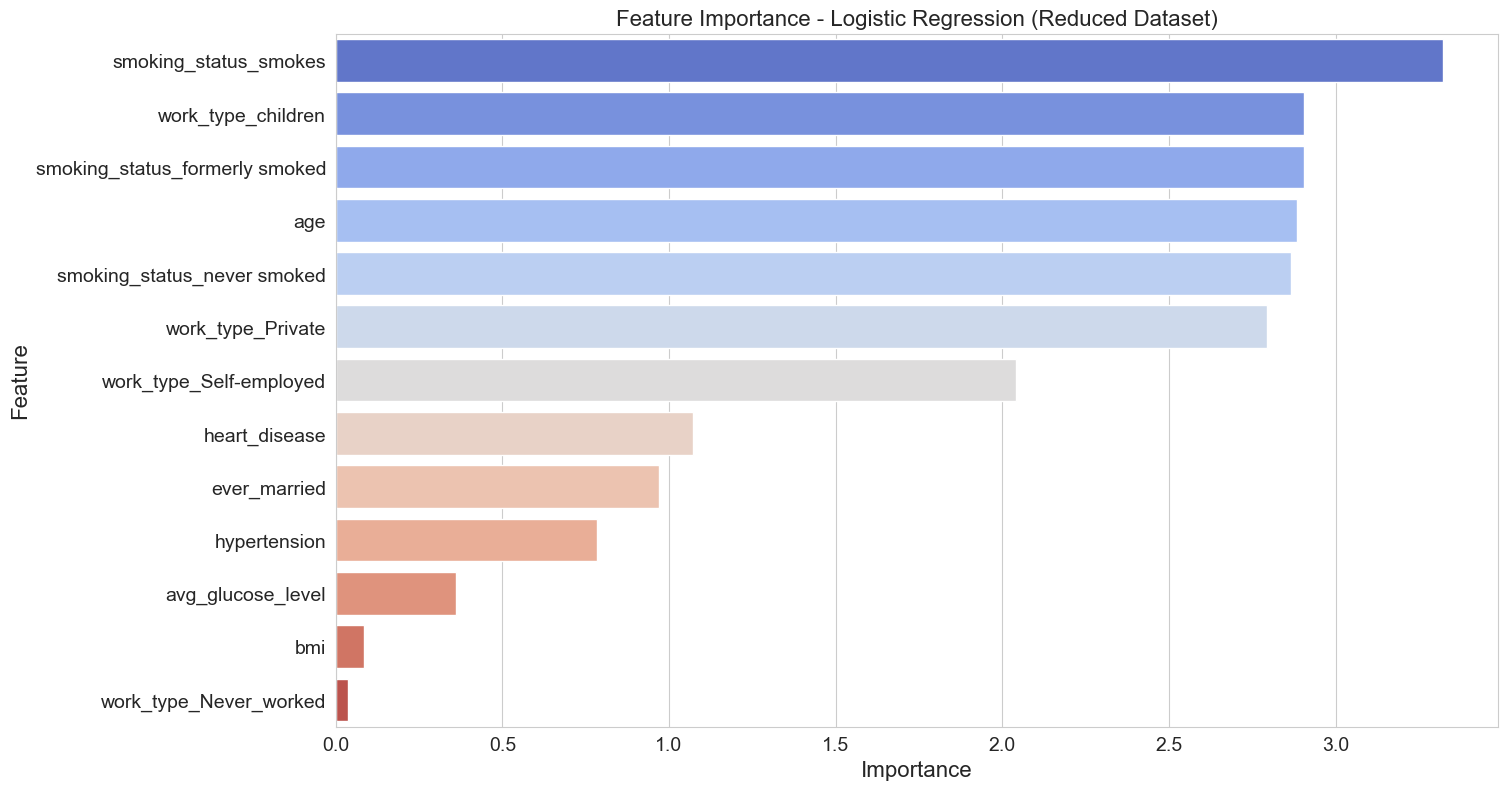

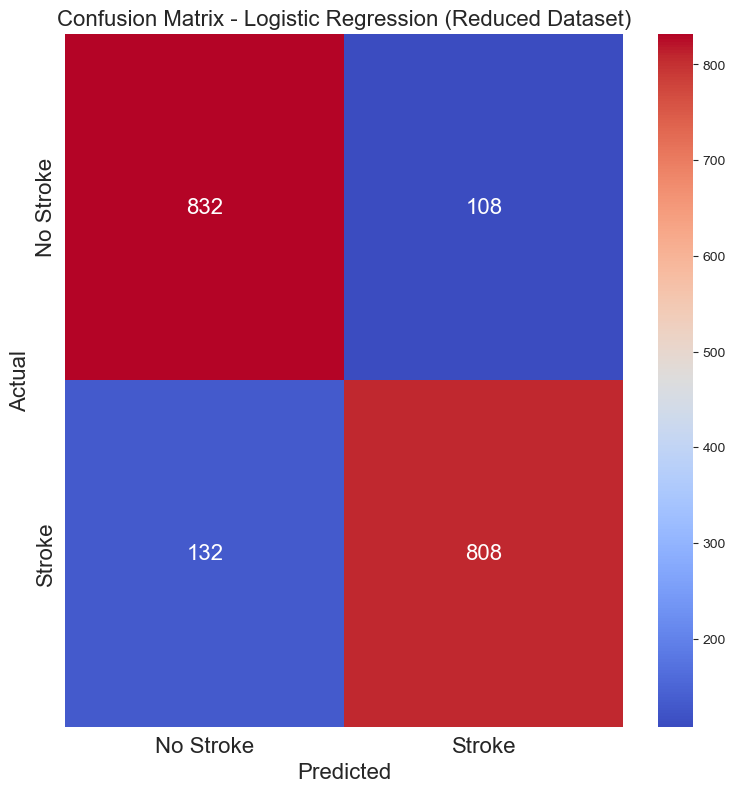

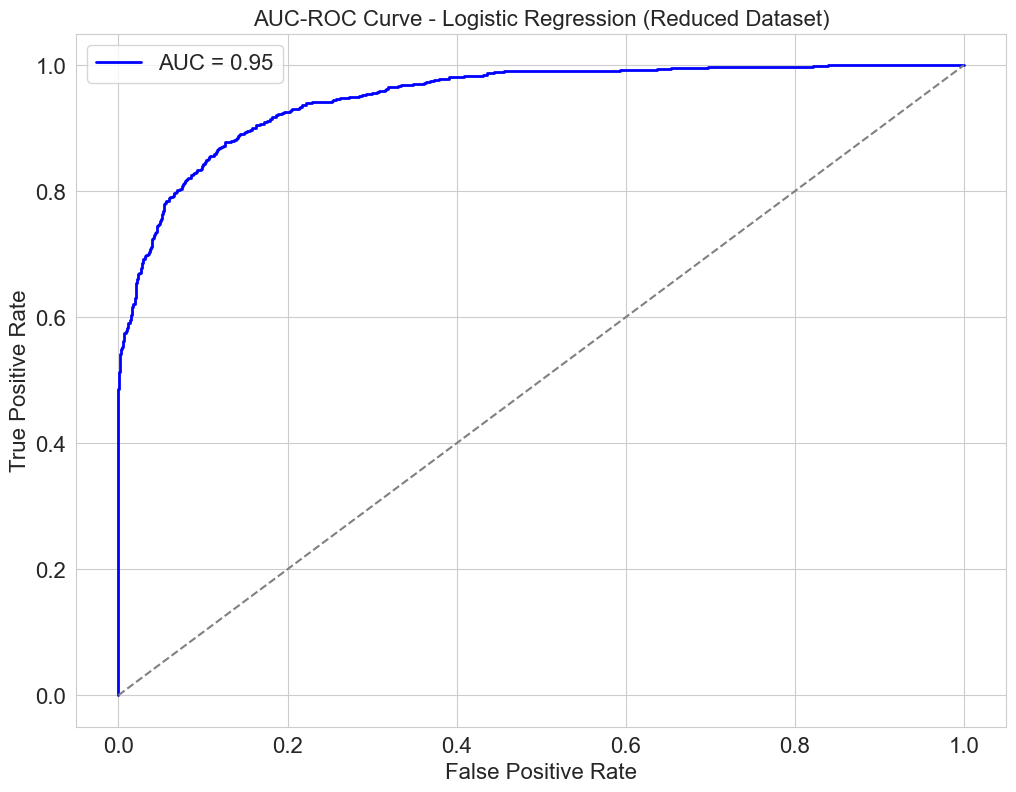

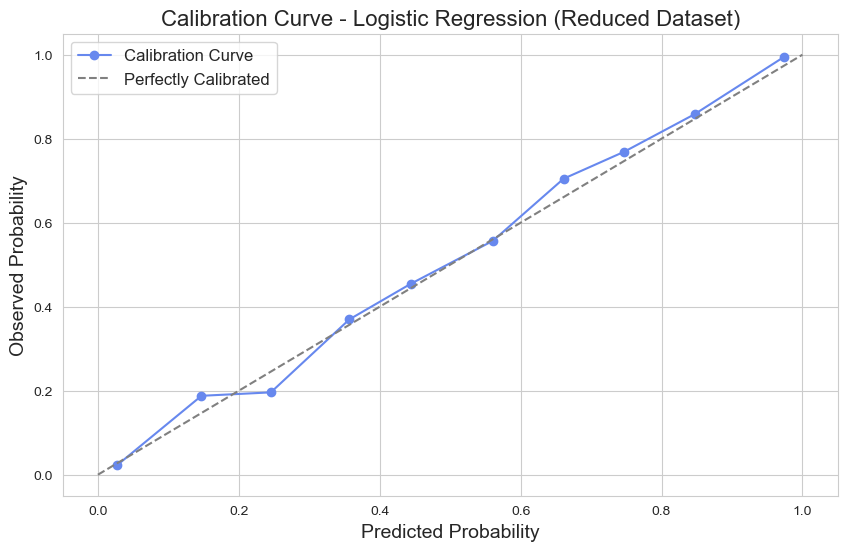


False Negatives Summary:
              age  hypertension  heart_disease  ever_married  \
count  132.000000    132.000000     132.000000    132.000000   
mean    -0.063953      0.075758       0.083333      0.833333   
std      0.326043      0.265618       0.277438      0.374098   
min     -1.400762      0.000000       0.000000      0.000000   
25%     -0.245285      0.000000       0.000000      1.000000   
50%     -0.081326      0.000000       0.000000      1.000000   
75%      0.062667      0.000000       0.000000      1.000000   
max      0.705794      1.000000       1.000000      1.000000   

       avg_glucose_level         bmi  True_Label  Predicted_Probability  \
count         132.000000  132.000000       132.0             132.000000   
mean            0.093887    0.346175         1.0               0.301206   
std             0.665392    0.586256         0.0               0.142950   
min            -0.547106   -0.920591         1.0               0.002017   
25%            -0.3178

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1403070590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")


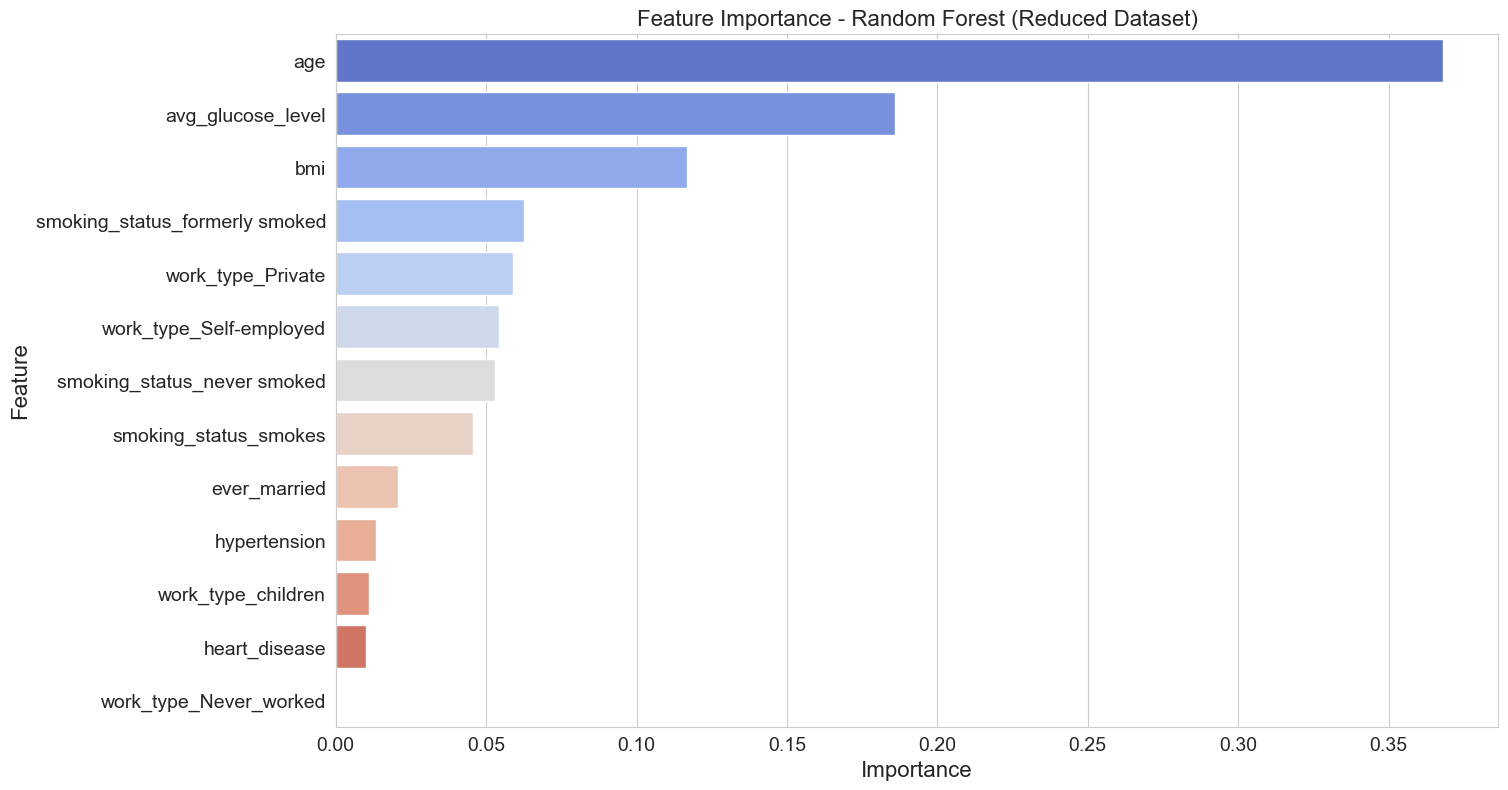

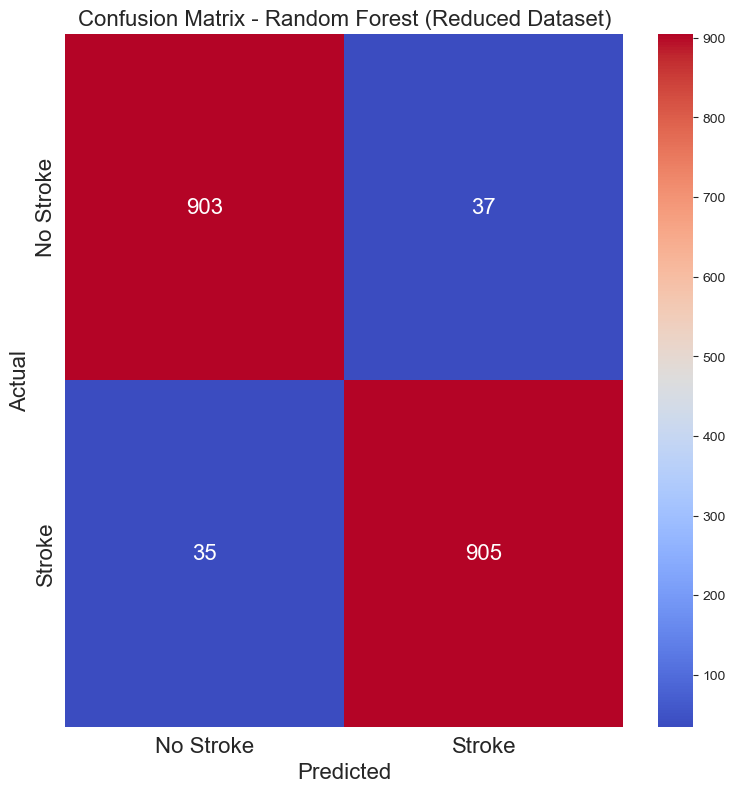

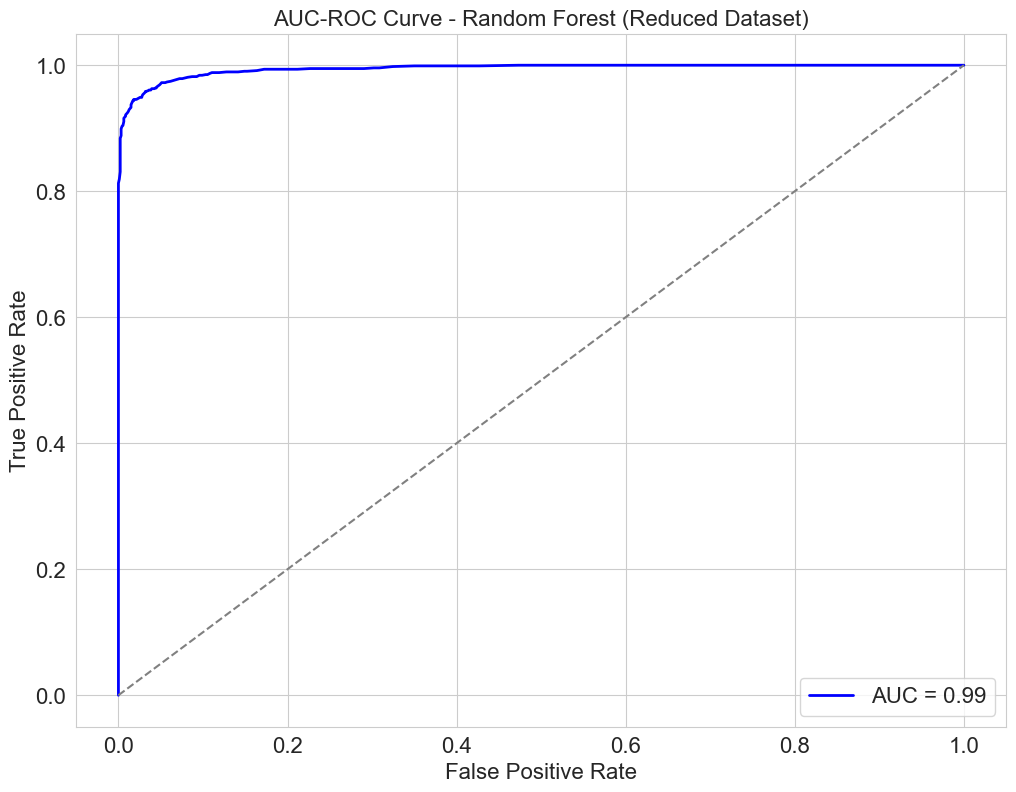

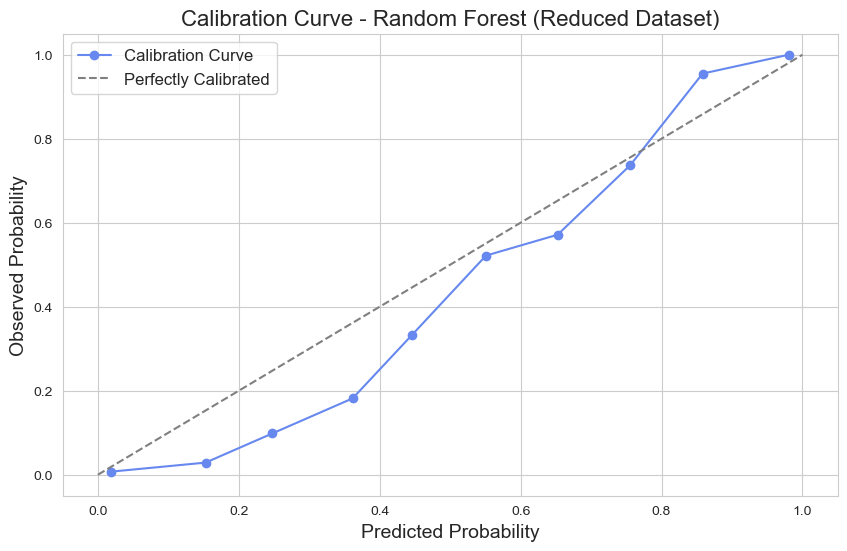


False Negatives Summary:
             age  hypertension  heart_disease  ever_married  \
count  35.000000     35.000000      35.000000     35.000000   
mean   -0.037081      0.057143       0.057143      0.857143   
std     0.497554      0.235504       0.235504      0.355036   
min    -1.400762      0.000000       0.000000      0.000000   
25%    -0.342408      0.000000       0.000000      1.000000   
50%    -0.048036      0.000000       0.000000      1.000000   
75%     0.375584      0.000000       0.000000      1.000000   
max     0.653689      1.000000       1.000000      1.000000   

       avg_glucose_level        bmi  True_Label  Predicted_Probability  \
count          35.000000  35.000000        35.0              35.000000   
mean            0.196180   0.412299         1.0               0.320571   
std             0.728487   0.708972         0.0               0.139092   
min            -0.547106  -0.585461         1.0               0.030000   
25%            -0.314391  -0.090390 

c:\Users\anhph\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:33] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1403070590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")


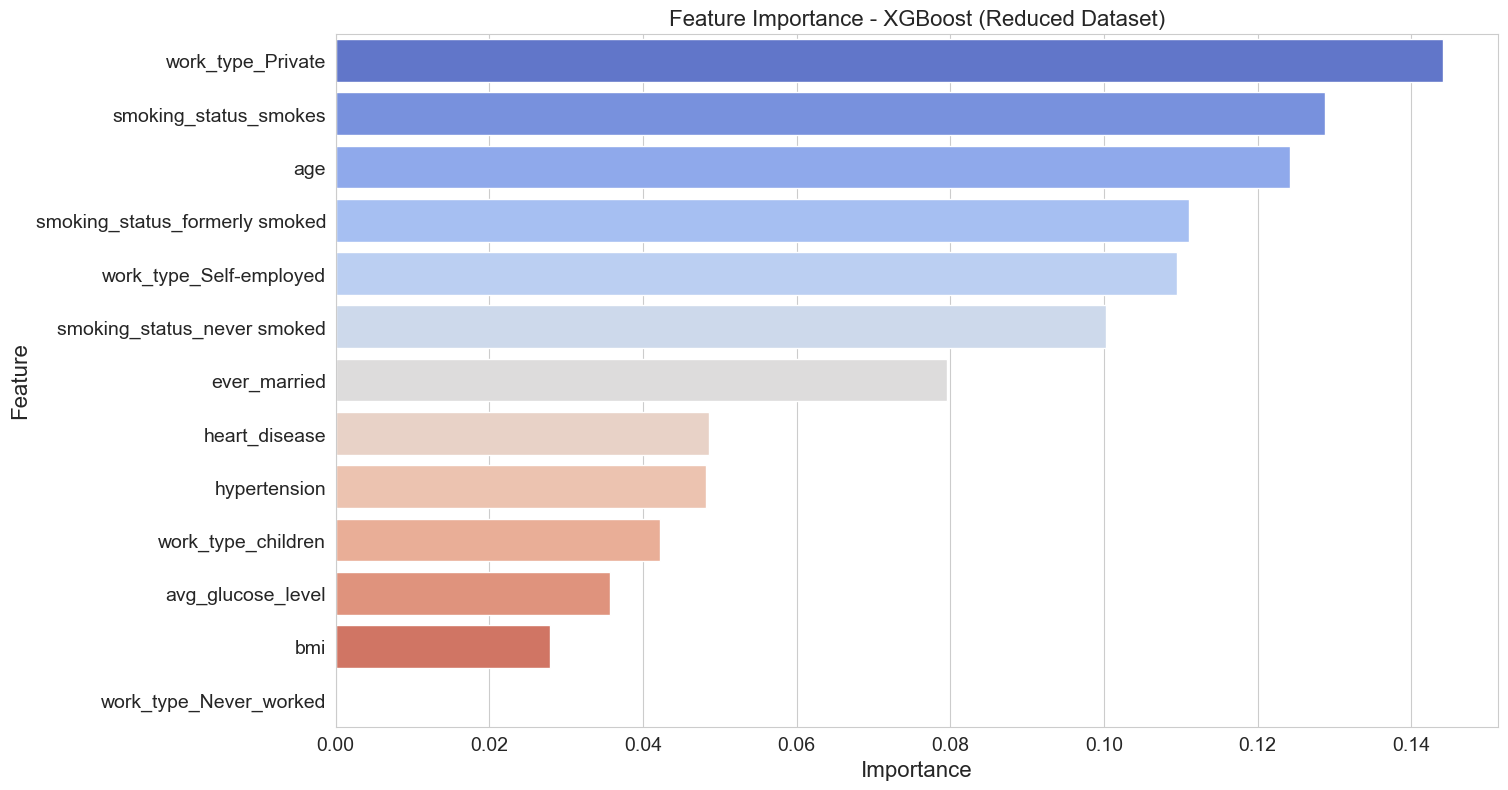

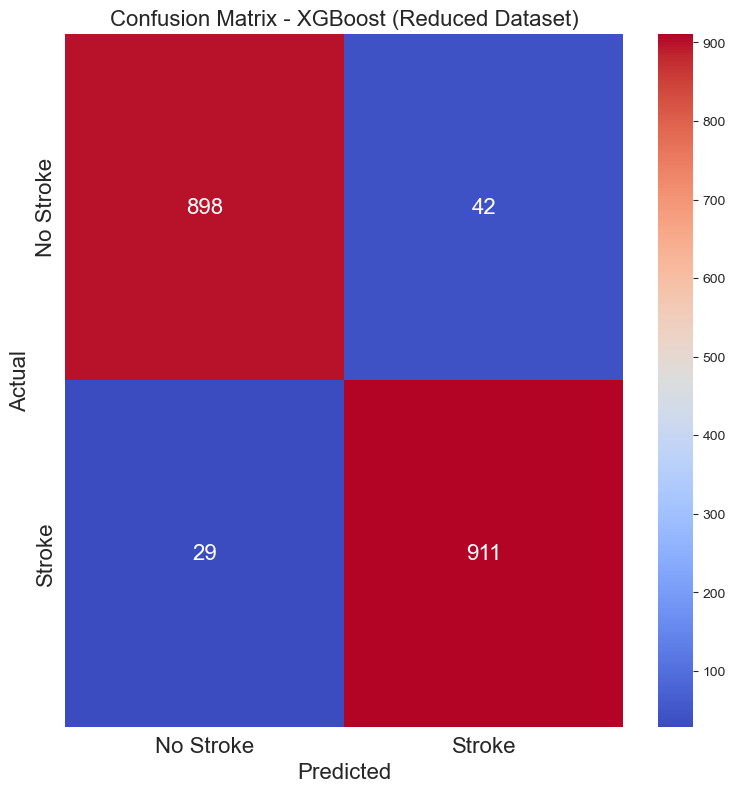

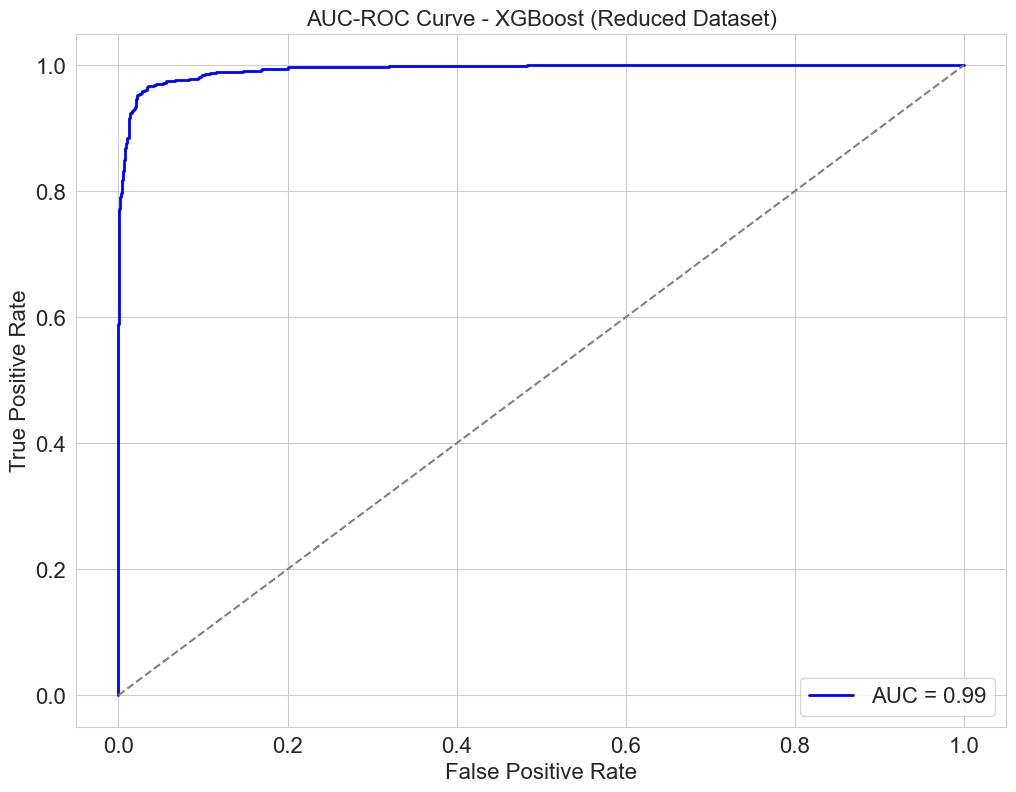

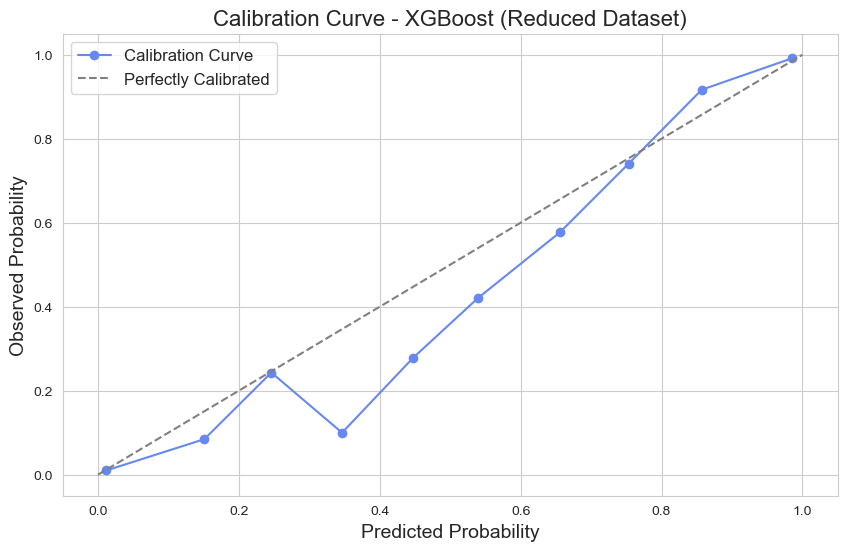


False Negatives Summary:
             age  hypertension  heart_disease  ever_married  \
count  29.000000     29.000000      29.000000     29.000000   
mean   -0.024822      0.034483       0.068966      0.827586   
std     0.537597      0.185695       0.257881      0.384426   
min    -1.400762      0.000000       0.000000      0.000000   
25%    -0.404665      0.000000       0.000000      1.000000   
50%     0.031128      0.000000       0.000000      1.000000   
75%     0.405299      0.000000       0.000000      1.000000   
max     0.653689      1.000000       1.000000      1.000000   

       avg_glucose_level        bmi  True_Label  Predicted_Probability  \
count          29.000000  29.000000        29.0              29.000000   
mean           -0.007069   0.174464         1.0               0.219715   
std             0.559225   0.727918         0.0               0.134757   
min            -0.547106  -0.814555         1.0               0.002976   
25%            -0.309830  -0.302439 

C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\1403070590.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")


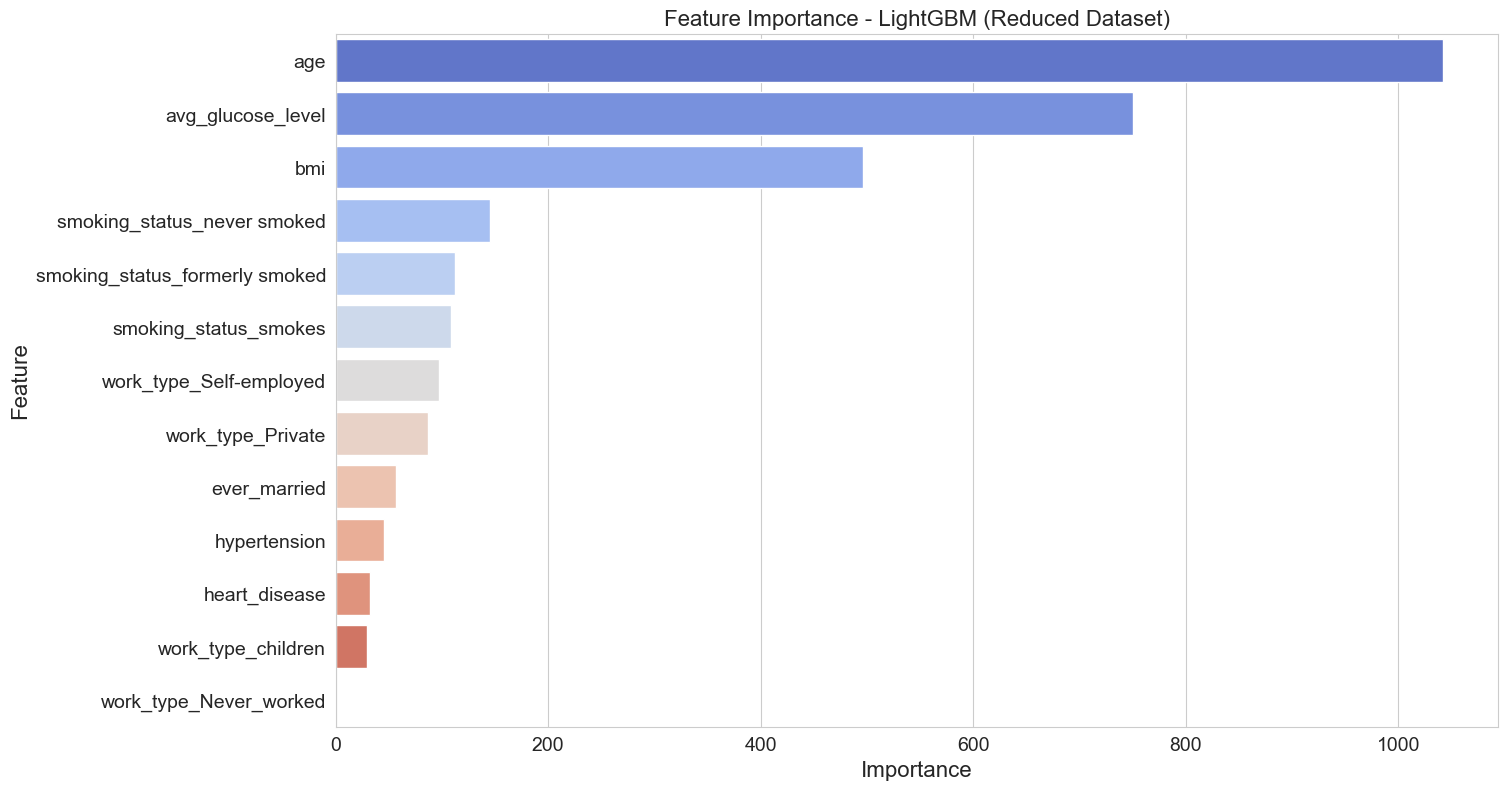

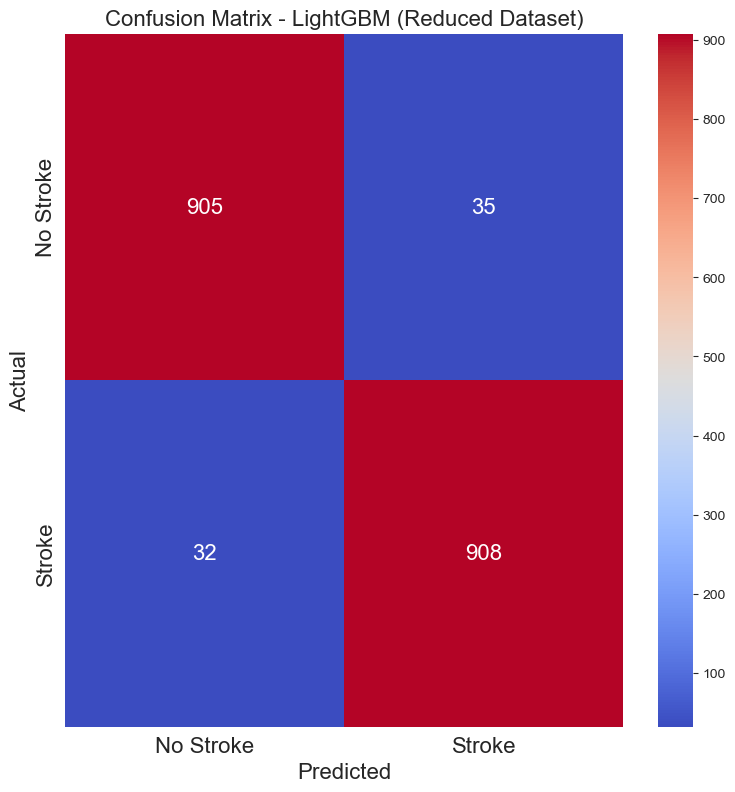

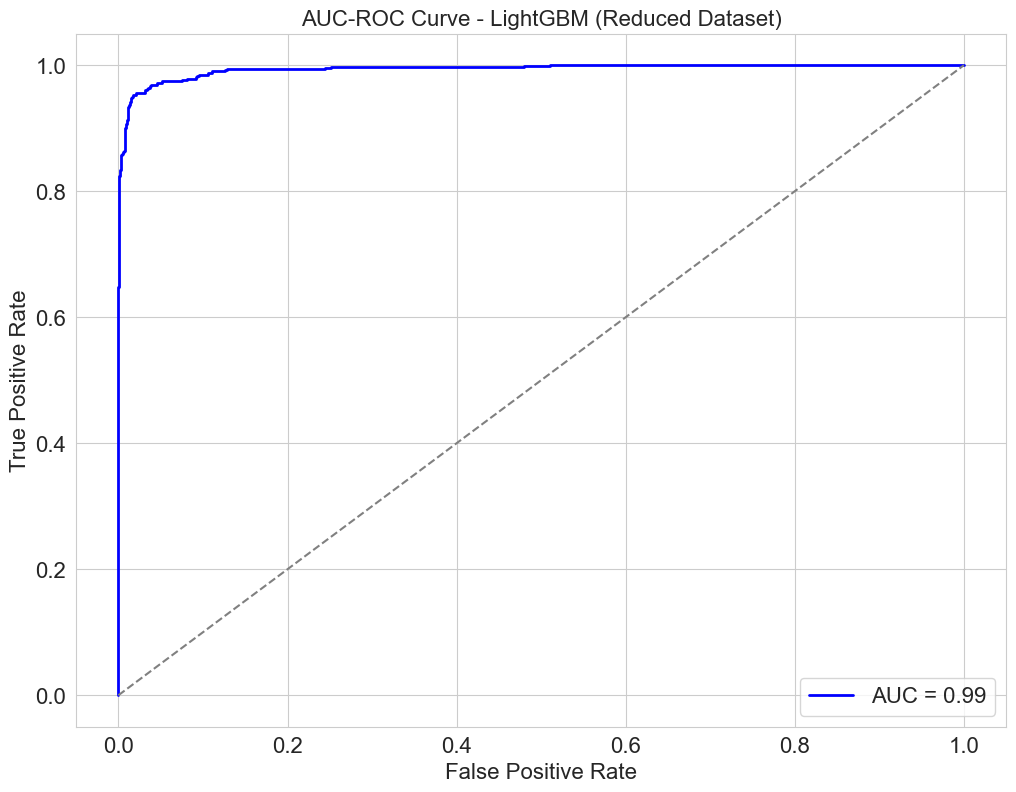

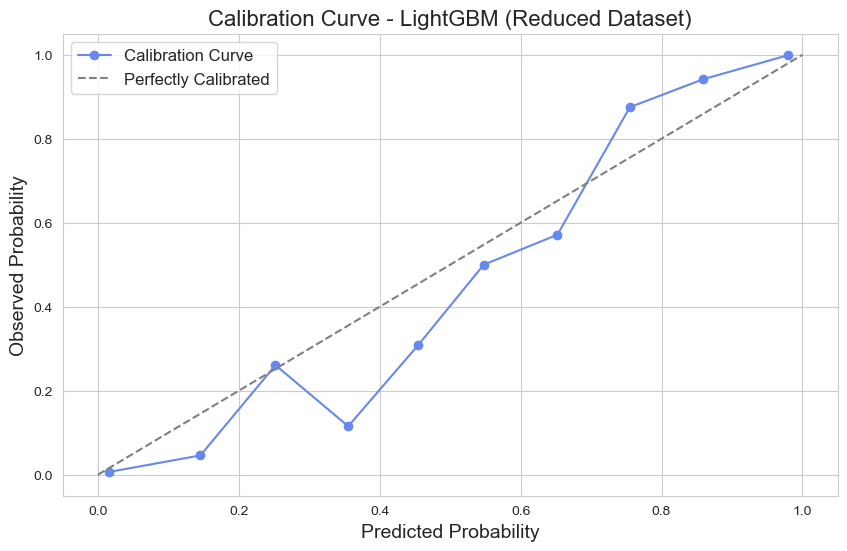


False Negatives Summary:
             age  hypertension  heart_disease  ever_married  \
count  32.000000     32.000000      32.000000     32.000000   
mean   -0.050673      0.093750       0.062500      0.843750   
std     0.526751      0.296145       0.245935      0.368902   
min    -1.400762      0.000000       0.000000      0.000000   
25%    -0.415741      0.000000       0.000000      1.000000   
50%    -0.020106      0.000000       0.000000      1.000000   
75%     0.381319      0.000000       0.000000      1.000000   
max     0.653689      1.000000       1.000000      1.000000   

       avg_glucose_level        bmi  True_Label  Predicted_Probability  \
count          32.000000  32.000000        32.0              32.000000   
mean            0.045903   0.271986         1.0               0.271681   
std             0.603754   0.688281         0.0               0.140666   
min            -0.547106  -0.814555         1.0               0.007834   
25%            -0.341511  -0.111365 

In [47]:
# Store model results
results = []
feature_importance_results = {}

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    for model_name, model in models.items():
        print(f"\n🔹 Training {model_name} on {dataset_name}...")

        # Train the model
        trained_model = train_model(model, X_train, y_train)

        # Evaluate the model
        metrics, y_test, y_test_pred, y_test_prob = evaluate_model(trained_model, X_train, X_test, y_train, y_test, dataset_name, model_name)

        # Store results
        results.append(metrics)

        # Feature Importance Extraction
        if model_name == "Logistic Regression":
            importance = np.abs(trained_model.coef_[0])  # Absolute coefficient values
        else:
            importance = trained_model.feature_importances_  # Tree-based models

        # Save feature importance
        feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
        feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
        feature_importance_results[f"{model_name} ({dataset_name})"] = feature_importance_df

        # 📌 Plot Feature Importance
        plt.figure(figsize=(15, 9))
        sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")
        plt.title(f"Feature Importance - {model_name} ({dataset_name})", fontsize=16)
        plt.xlabel("Importance", fontsize=16)
        plt.ylabel("Feature", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.show()

        # 📌 SHAP Explanations
        # compute_shap_values(model, X_train, X_test, model_name, dataset_name)

        # 📌 Visualization
        plot_confusion_matrix(y_test, y_test_pred, model_name, dataset_name)
        plot_roc_curve(y_test, y_test_prob, model_name, dataset_name)

        # After evaluating a model
        plot_calibration_curve(y_test, y_test_prob, model_name, dataset_name)

        # Copy X_test to preserve the original features
        X_test_with_predictions = X_test.copy()

        # Add predictions and probabilities to the copied test set
        X_test_with_predictions["True_Label"] = y_test
        X_test_with_predictions["Predicted_Probability"] = y_test_prob
        X_test_with_predictions["Predicted_Label"] = (y_test_prob > 0.5).astype(int)

        # Filter for false negatives
        false_negatives = X_test_with_predictions[
            (X_test_with_predictions["True_Label"] == 1) & 
            (X_test_with_predictions["Predicted_Label"] == 0)
        ]

        # Filter for true positives
        true_positives = X_test_with_predictions[
            (X_test_with_predictions["True_Label"] == 1) & 
            (X_test_with_predictions["Predicted_Label"] == 1)
        ]

        # Analyze false negatives
        print("\nFalse Negatives Summary:")
        print(false_negatives.describe())

        # Compare with true positives
        print("\nComparison of False Negatives vs True Positives:")
        print(false_negatives.describe() - true_positives.describe())

# Convert results to a DataFrame
results_df = pd.DataFrame(results)


# Table of Results

In [48]:
results_df

Dataset                Model  Train Accuracy  Test Accuracy  \
0     Full Dataset  Logistic Regression        0.882846       0.893617   
1     Full Dataset        Random Forest        1.000000       0.966489   
2     Full Dataset              XGBoost        0.997739       0.967021   
3     Full Dataset             LightGBM        0.986170       0.963830   
4  Reduced Dataset  Logistic Regression        0.865824       0.872340   
5  Reduced Dataset        Random Forest        1.000000       0.961702   
6  Reduced Dataset              XGBoost        0.995213       0.962234   
7  Reduced Dataset             LightGBM        0.985106       0.964362   

   Precision    Recall  F1 Score   AUC-ROC  
0   0.895299  0.891489  0.893390  0.958240  
1   0.962065  0.971277  0.966649  0.995024  
2   0.962105  0.972340  0.967196  0.994354  
3   0.966809  0.960638  0.963714  0.994834  
4   0.882096  0.859574  0.870690  0.950258  
5   0.960722  0.962766  0.961743  0.994189  
6   0.955929  0.969149  0.962493  0.993486  
7   0.962884  0.965957  0.964418  0.994080

# Additional Analysis

## Subgroup Analysis

Stroke distribution by age group:
age_group
<18      0.001117
18-35    0.001048
36-50    0.018078
51-65    0.051075
66-80    0.138817
80+      0.200000
Name: stroke, dtype: float64


C:\Users\anhph\AppData\Local\Temp\ipykernel_1876\2786675967.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_by_age_group = df.groupby('age_group')['stroke'].mean()


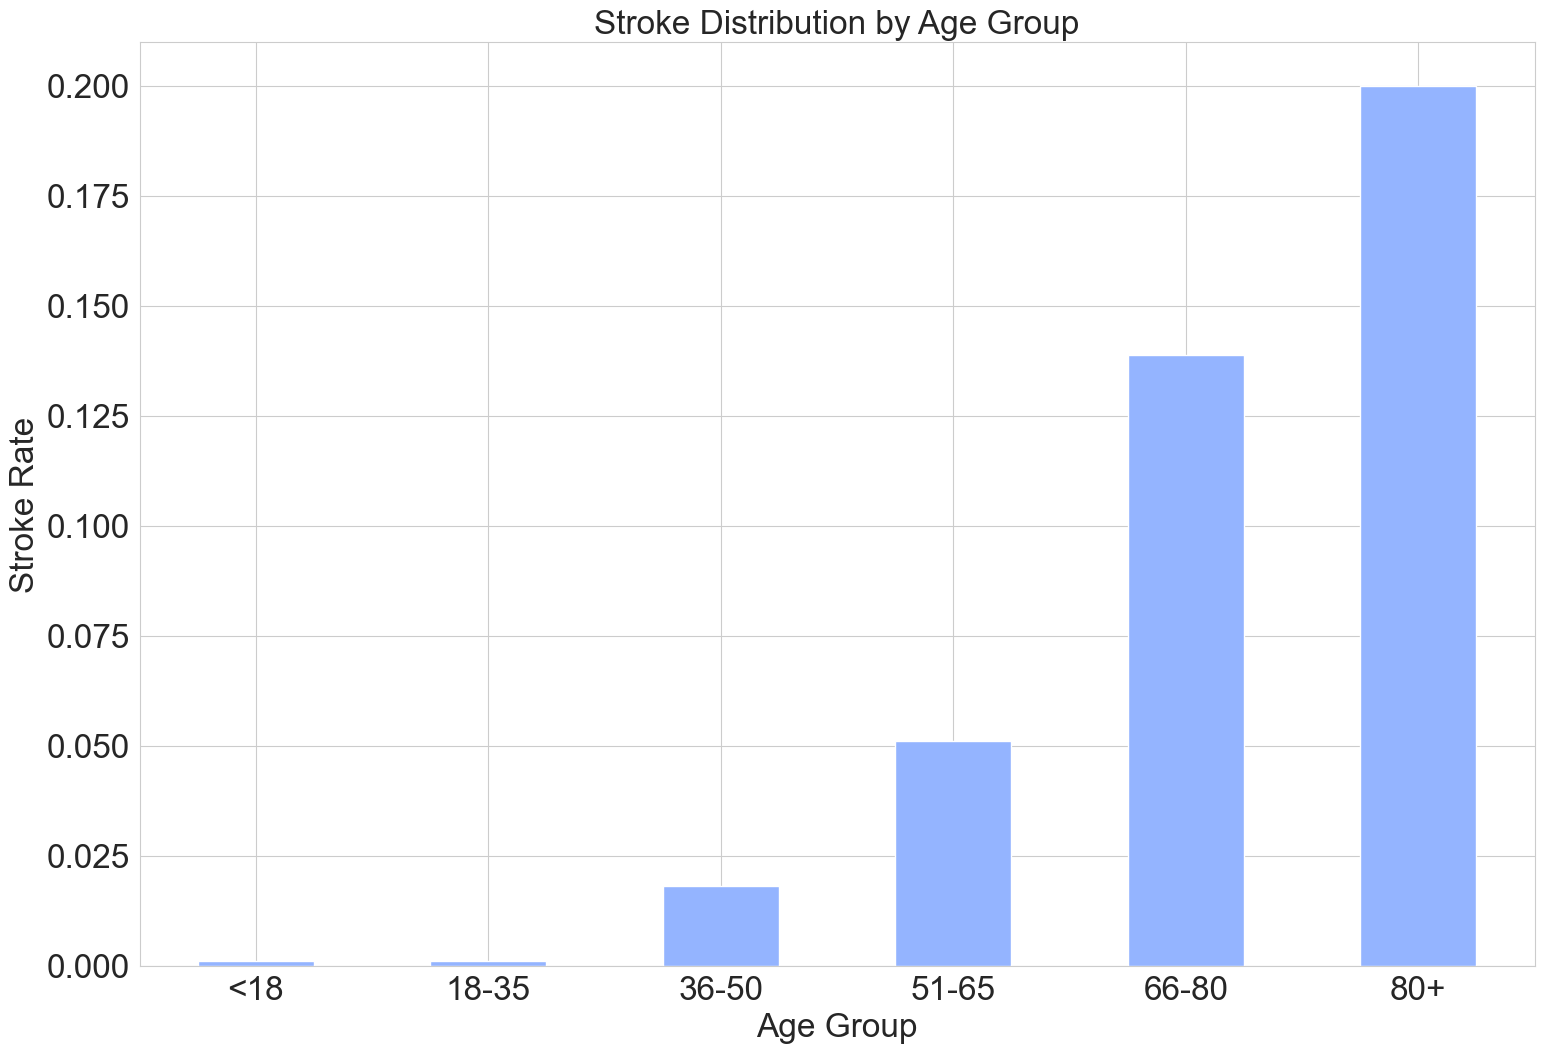

In [49]:
plt.figure(figsize=(18, 12))  # Set larger figure size

# Analyze stroke distribution by age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80, 120], 
                         labels=['<18', '18-35', '36-50', '51-65', '66-80', '80+'])

stroke_by_age_group = df.groupby('age_group')['stroke'].mean()

# Print distribution for reference
print("Stroke distribution by age group:")
print(stroke_by_age_group)

# Plot the bar chart with larger font sizes
stroke_by_age_group.plot(kind='bar', color="#94b4ff")  # Using pastel blue for consistency

# Formatting
plt.title('Stroke Distribution by Age Group', fontsize=24)
plt.xlabel('Age Group', fontsize=24)
plt.ylabel('Stroke Rate', fontsize=24)
plt.xticks(fontsize=24, rotation=0)  # Keep labels horizontal
plt.yticks(fontsize=24)

plt.show()


Stroke distribution by work type:
work_type
Govt_job         0.044444
Never_worked     0.000000
Private          0.045180
Self-employed    0.068387
children         0.001490
Name: stroke, dtype: float64


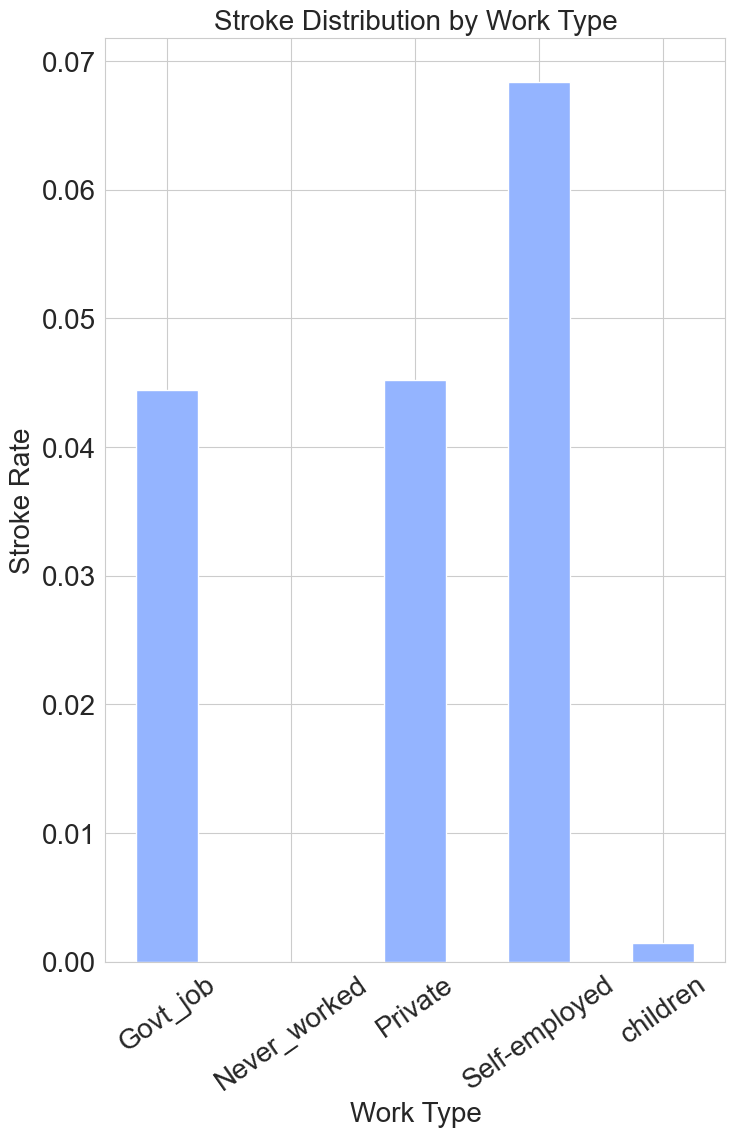

In [50]:
# Set the pastel blue color from your palette
pastel_blue = "#94b4ff"

plt.figure(figsize=(8, 12))  # Updated figsize to 10x12

# Analyze stroke distribution by work type
stroke_by_work_type = df.groupby('work_type')['stroke'].mean()

# Print distribution for reference
print("Stroke distribution by work type:")
print(stroke_by_work_type)

# Plot the bar chart with pastel blue
stroke_by_work_type.plot(kind='bar', color=pastel_blue)

# Formatting
plt.title('Stroke Distribution by Work Type', fontsize=20)
plt.xlabel('Work Type', fontsize=20)
plt.ylabel('Stroke Rate', fontsize=20)
plt.xticks(fontsize=20, rotation=35)  # Keep labels horizontal
plt.yticks(fontsize=20)

plt.show()


Stroke distribution by smoking status:
smoking_status
Unknown            0.019555
formerly smoked    0.068100
never smoked       0.045356
smokes             0.052917
Name: stroke, dtype: float64


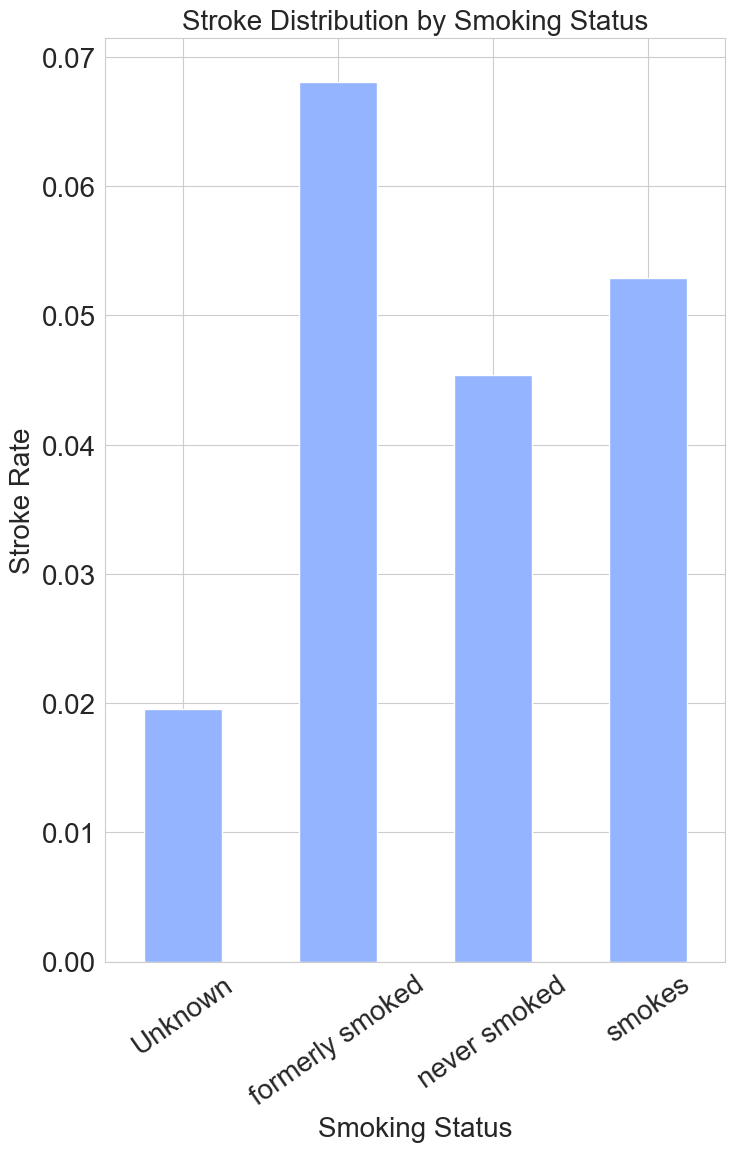

In [51]:
# Set the pastel blue color from your palette
pastel_blue = "#94b4ff"

plt.figure(figsize=(8, 12))

# Analyze stroke distribution by smoking status
stroke_by_smoking_status = df.groupby('smoking_status')['stroke'].mean()

# Print distribution for reference
print("Stroke distribution by smoking status:")
print(stroke_by_smoking_status)

# Plot the bar chart with pastel blue
stroke_by_smoking_status.plot(kind='bar', color=pastel_blue)

# Formatting
plt.title('Stroke Distribution by Smoking Status', fontsize=20)
plt.xlabel('Smoking Status', fontsize=20)
plt.ylabel('Stroke Rate', fontsize=20)
plt.xticks(fontsize=20, rotation=35)  # Adjust label rotation for better readability
plt.yticks(fontsize=20)

plt.show()


## Interaction Effects

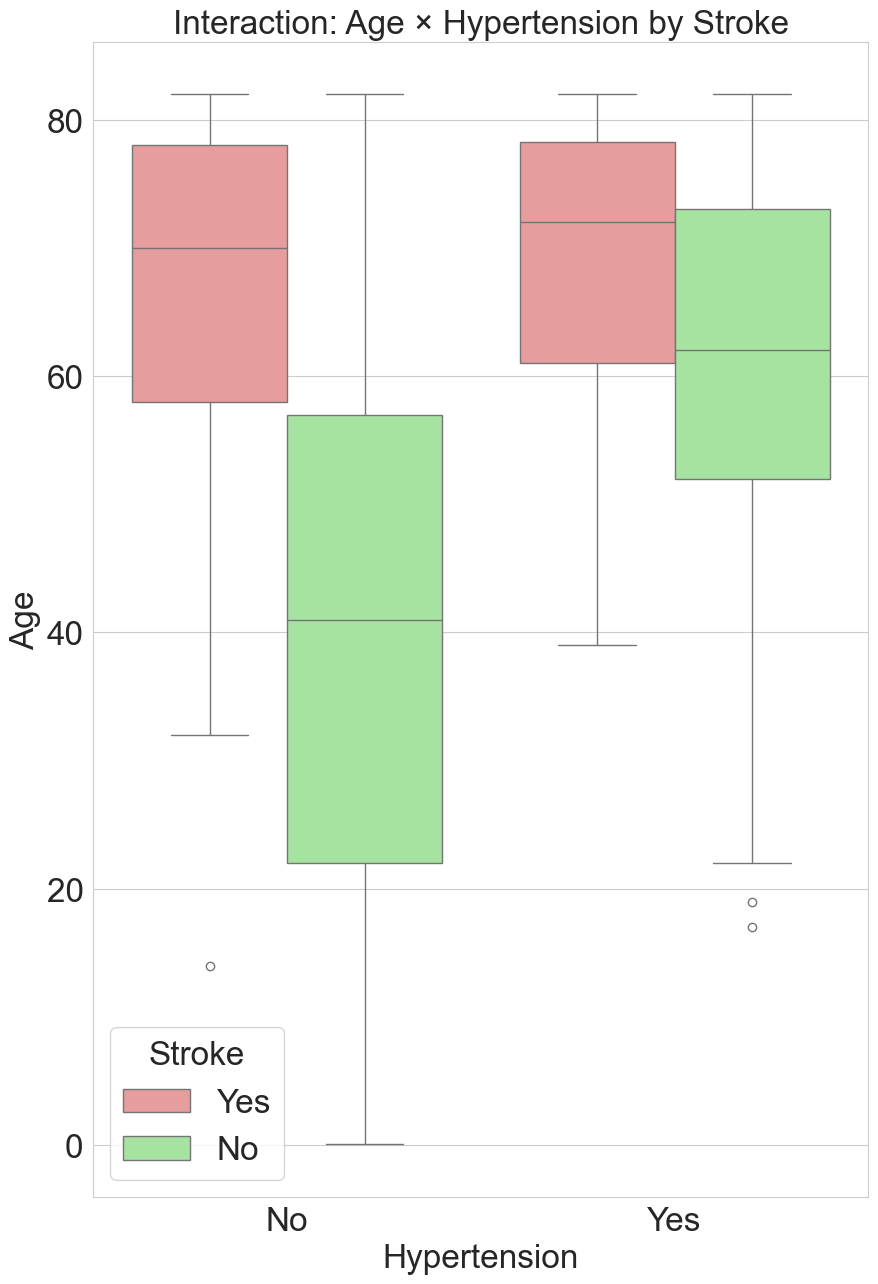

In [52]:
# Define the custom pastel palette
custom_pastel_palette = ["#f29191", "#9ded95"]  # Soft Pink, Pastel Green

# Analyze interaction effects (e.g., Age × Hypertension)
plt.figure(figsize=(10, 15))

# Convert hypertension and stroke columns to string labels
df['hypertension_str'] = df['hypertension'].map({0: 'No', 1: 'Yes'})
df['stroke_str'] = df['stroke'].map({0: 'No', 1: 'Yes'})

# Create the boxplot using the custom pastel palette
sns.boxplot(data=df, x='hypertension_str', y='age', hue='stroke_str', palette=custom_pastel_palette)

# Formatting with increased font sizes
plt.title('Interaction: Age × Hypertension by Stroke', fontsize=24)
plt.xlabel('Hypertension', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adjust legend font size
plt.legend(title='Stroke', title_fontsize=24, fontsize=24)

plt.show()


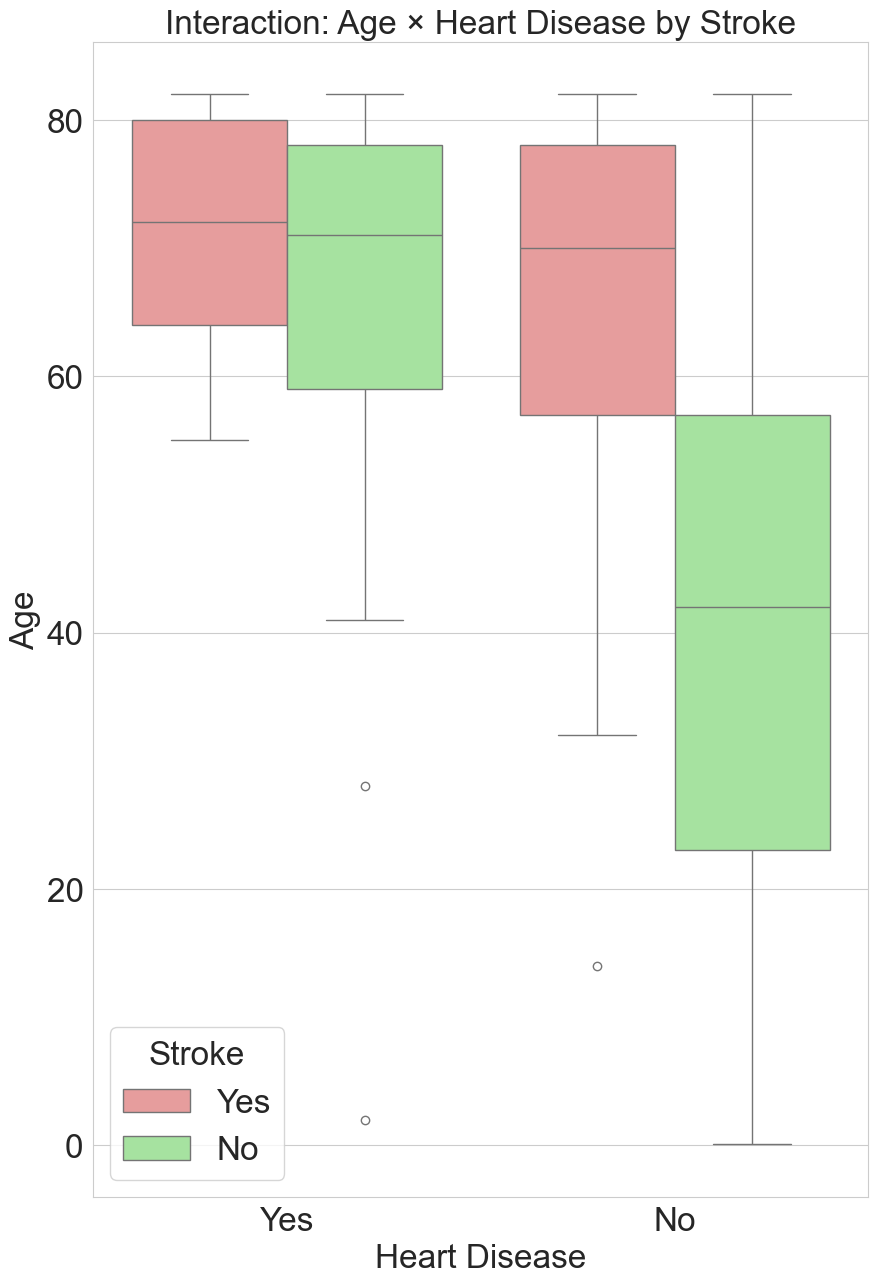

In [53]:
# Define the custom pastel palette
custom_pastel_palette = ["#f29191", "#9ded95"]  # Soft Pink, Pastel Green

# Analyze interaction effects (e.g., Age × Heart Disease)
plt.figure(figsize=(10, 15))

# Convert heart_disease and stroke columns to string labels
df['heart_disease_str'] = df['heart_disease'].map({0: 'No', 1: 'Yes'})
df['stroke_str'] = df['stroke'].map({0: 'No', 1: 'Yes'})

# Create the boxplot using the custom pastel palette
sns.boxplot(data=df, x='heart_disease_str', y='age', hue='stroke_str', palette=custom_pastel_palette)

# Formatting with increased font sizes
plt.title('Interaction: Age × Heart Disease by Stroke', fontsize=24)
plt.xlabel('Heart Disease', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adjust legend font size
plt.legend(title='Stroke', title_fontsize=24, fontsize=24)

plt.show()


## Risk Threshold Analysis

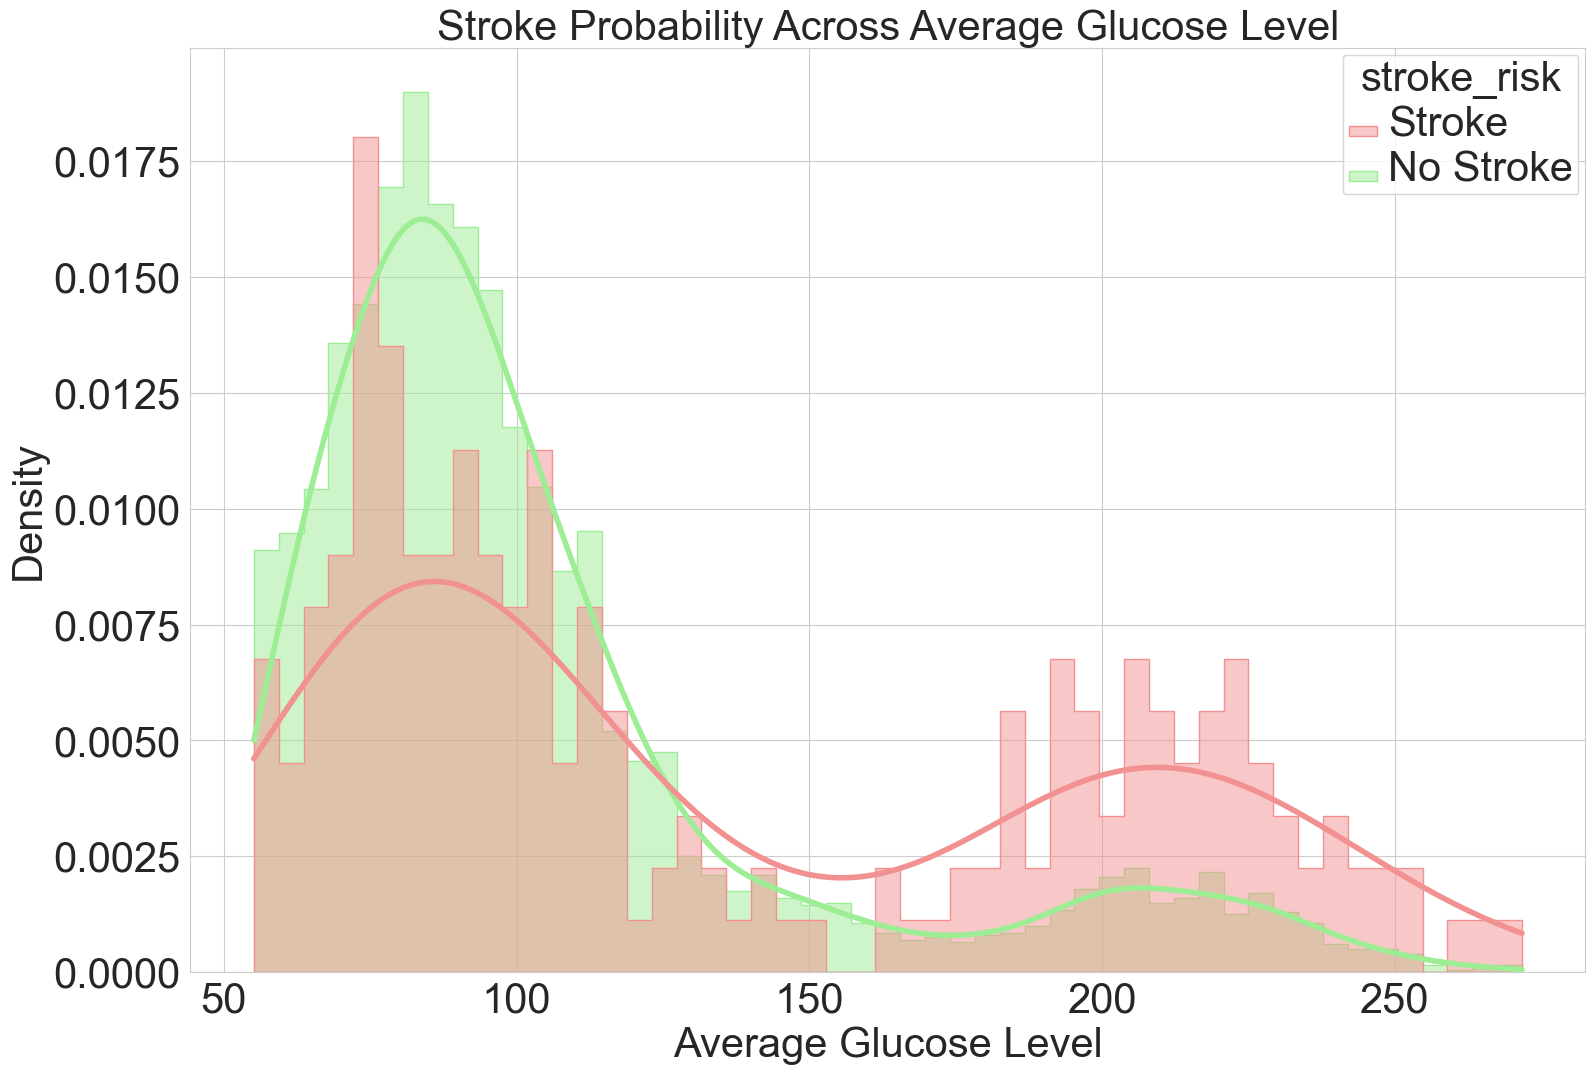

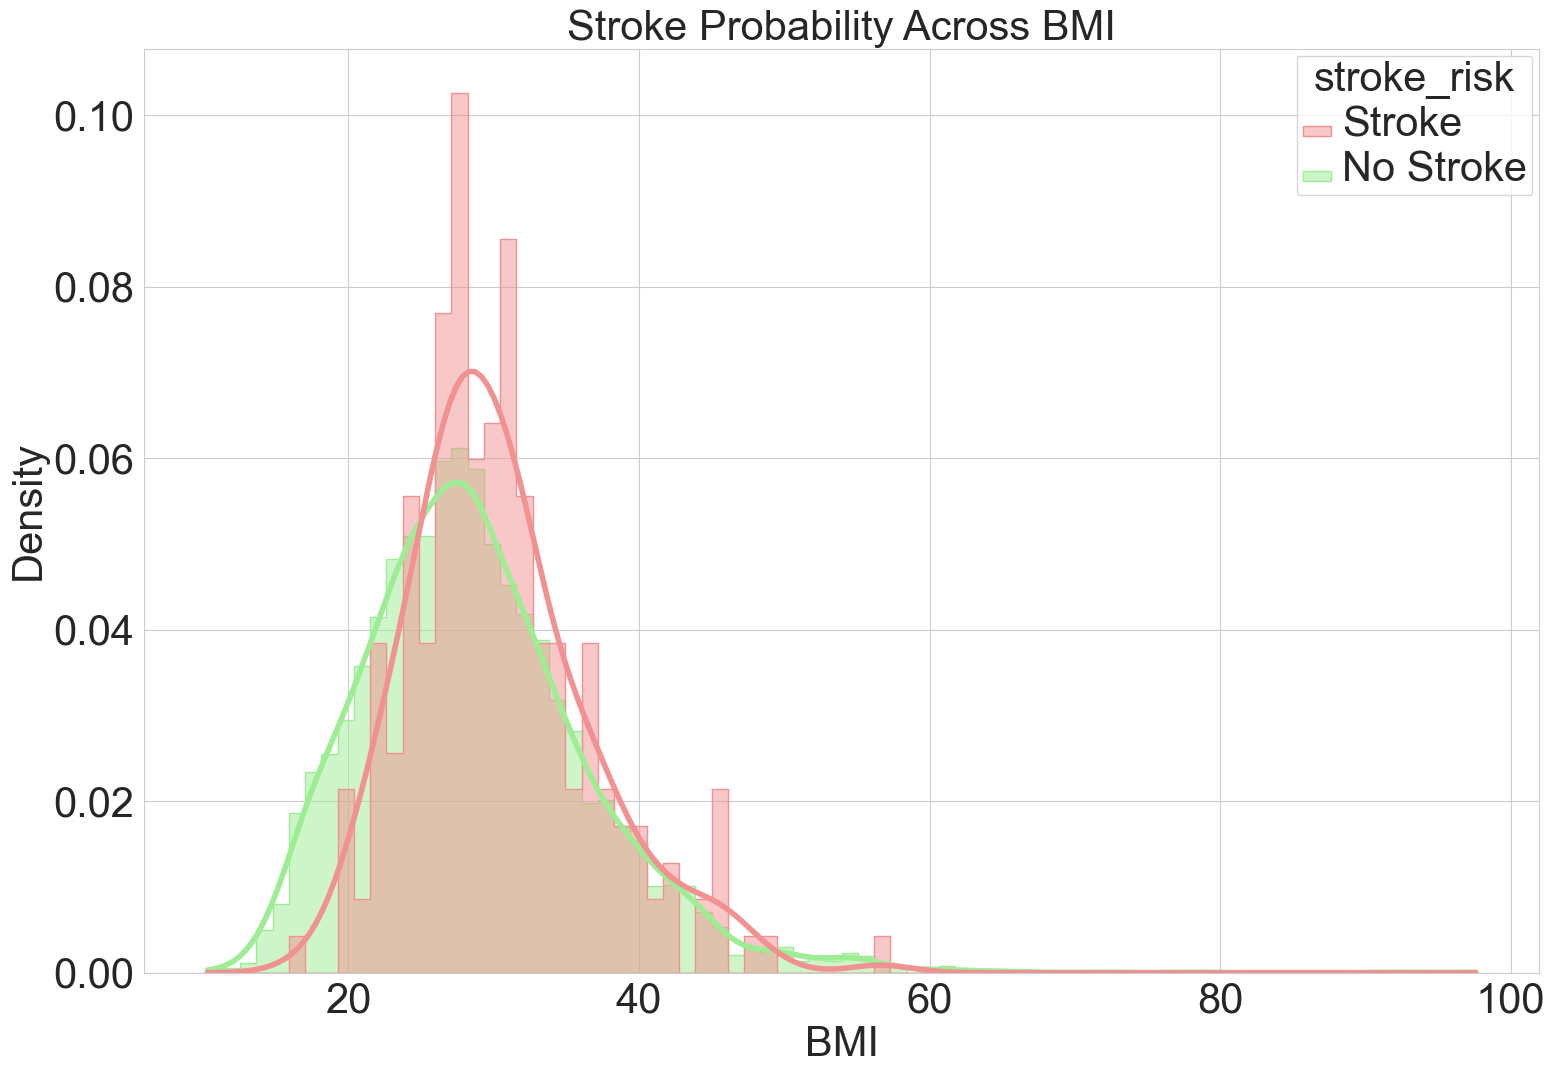

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a mapping from column names to formatted titles
numeric_titles = {
    'avg_glucose_level': 'Average Glucose Level',
    'bmi': 'BMI'
}

# Convert stroke to a categorical variable for proper hue handling
df['stroke_risk'] = df['stroke'].map({0: 'No Stroke', 1: 'Stroke'})  # Rename for clarity

# Define custom colors for "Stroke" and "No Stroke"
custom_palette = {"No Stroke": "#9ded95", "Stroke": "#f29191"}  # Green for No Stroke, Pink for Stroke

# Analyze thresholds for numeric variables
numeric_vars = ['avg_glucose_level', 'bmi']
for var in numeric_vars:
    plt.figure(figsize=(18, 12))

    # Histogram plot with KDE for stroke distribution
    ax = sns.histplot(
        data=df, x=var, hue='stroke_risk', kde=True, element='step', 
        stat='density', common_norm=False, alpha=0.5, palette=custom_palette
    )

    # Adjust KDE line thickness manually
    for line in ax.lines:
        line.set_linewidth(4)  # Make KDE line thicker

    # Custom title based on variable mapping
    plt.title(f'Stroke Probability Across {numeric_titles[var]}', fontsize=30)
    plt.xlabel(numeric_titles[var], fontsize=30)
    plt.ylabel("Density", fontsize=30)

    # Adjust tick label font sizes
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)

    # Increase legend font size
    legend = ax.get_legend()
    if legend:
        plt.setp(legend.get_texts(), fontsize=30)  # Set font size for legend labels
        plt.setp(legend.get_title(), fontsize=30)  # Set font size for legend title

    plt.show()
